In [1]:
import tensorflow as tf

In [4]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
print(node1)
print(node2)

Tensor("Const_3:0", shape=(), dtype=float32)
Tensor("Const_4:0", shape=(), dtype=float32)


In [6]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


In [8]:
node3 = tf.add(node1, node2)
print("node3: ", node3)
print("sess.run(node3): ",sess.run(node3))

node3:  Tensor("Add_1:0", shape=(), dtype=float32)
sess.run(node3):  7.0


In [10]:
tf.add?

In [14]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # shortcut of tf.add(a, b)

print(sess.run(adder_node, {a: 1, b: 3}))
print(sess.run(adder_node, {a: [1, 3], b: [3, 5]}))

4.0
[4. 8.]


In [13]:
print(a, b)

Tensor("Placeholder:0", dtype=float32) Tensor("Placeholder_1:0", dtype=float32)


In [15]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b:4.5}))

22.5


In [16]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

In [17]:
init = tf.global_variables_initializer()
sess.run(init)

In [21]:
print(sess.run(linear_model, {x: [1, 2, 3, 4]}))

[0.         0.3        0.6        0.90000004]


In [24]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

23.66


In [25]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

0.0


In [26]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [30]:
sess.run(init)
for i in range(1000):
    sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})
    
print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


In [32]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

print(sess.run(adder_node, {a: 3, b:4.5}))

7.5


In [34]:
sess.run(squared_deltas, {x: [1, 2, 3, 4], y: [2, 3, 4, 5]})

array([ 4.000025, 16.000023, 36.      , 63.999947], dtype=float32)

## Linear Regression using tensor flow

Formula - W*x + b<br>
find optimal W and b<br>
y = W * x + b<br>

where:<br> <b>y</b>: output / target variable<br>
      <b>x</b>: input variable<br>
      <b>W</b>: coefficient 1<br>
      <b>b</b>: coefficient 2<br>

In [35]:
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)

In [36]:
linear_model = W * x + b

In [38]:
sess = tf.Session()

In [39]:
init = tf.global_variables_initializer()
sess.run(init)

In [40]:
print(sess.run(linear_model, {x: [1, 2, 3, 4]}))

[0.         0.3        0.6        0.90000004]


In [41]:
y = tf.placeholder(tf.float32)

In [43]:
squared_deltas = tf.square(linear_model - y)

In [44]:
loss = tf.reduce_sum(squared_deltas)

In [45]:
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

23.66


In [46]:
optimizer = tf.train.GradientDescentOptimizer?

In [47]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [48]:
sess.run(init)

In [50]:
for i in range(1000):
    sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})

print(sess.run([W, b]))

[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


In [52]:
print(sess.run(W))

[-0.9999969]


In [53]:
print(sess.run(linear_model, {x: [1, 2, 3, 4]}))

[-6.0796738e-06 -1.0000030e+00 -1.9999999e+00 -2.9999967e+00]


In [55]:
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]
curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})

In [56]:
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))


W: [-0.9999969] b: [0.9999908] loss: 5.6999738e-11


In [62]:
import tensorflow as tf

sess = tf.Session()

W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

init = tf.global_variables_initializer()
sess.run(init)

linear_model = W * x + b

print(sess.run(linear_model, {x: x_train}))

squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

for i in range(1000):
    sess.run(train, {x: x_train, y: y_train})
    
print('W: {},   b: {}'.format(sess.run(W), sess.run(b)))

[0.         0.3        0.6        0.90000004]
W: [-0.9999969],   b: [0.9999908]


In [73]:
import numpy as np

features = [tf.contrib.layers.real_valued_column('x', dimension=1)]
estimator = tf.contrib.learn.LinearRegressor(feature_columns=features)

x = np.array([1, 2, 3, 4])
y = np.array([0, -1, -2, -3])
input_fn = tf.estimator.inputs.numpy_input_fn({'x': x}, y, batch_size=4, num_epochs=1000, shuffle=True)

estimator.fit(input_fn=input_fn, steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_evaluation_master': '', '_device_fn': None, '_task_id': 0, '_task_type': None, '_train_distribute': None, '_master': '', '_num_worker_replicas': 0, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9f6a3219e8>, '_tf_random_seed': None, '_environment': 'local', '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_is_chief': True, '_model_dir': '/tmp/tmpbuvzh29d', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_keep_checkpoint_max': 5}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpbuvzh29d/model.ckpt.
INFO:tensorflow:loss = 0.25, step =

LinearRegressor(params={'optimizer': None, 'joint_weights': False, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7f9f6a3216a0>, 'gradient_clip_norm': None, 'feature_columns': [_RealValuedColumn(column_name='x', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)]})

In [64]:
features

[_RealValuedColumn(column_name='x', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)]

In [72]:
tf.estimator.inputs.numpy_input_fn?

In [82]:
estimator.get_variable_names()

['global_step',
 'linear/bias_weight',
 'linear/bias_weight/ear/bias_weight/part_0/Ftrl',
 'linear/bias_weight/ear/bias_weight/part_0/Ftrl_1',
 'linear/x/weight',
 'linear/x/weight/linear/x/weight/part_0/Ftrl',
 'linear/x/weight/linear/x/weight/part_0/Ftrl_1']

In [99]:
estimator.predict(input_fn=input_fn, outputs=[2])

ValueError: Expected to run at least one output from dict_keys(['scores']), provided [2].

### MNIST

In [100]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [103]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [106]:
len(mnist.train.images[0])

784

In [109]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [118]:
x = tf.placeholder(tf.float32, [None, 784])

In [119]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [120]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [121]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [122]:
cross_entropy = tf.reduce_sum(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [123]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [124]:
sess = tf.InteractiveSession()

In [125]:
tf.global_variables_initializer().run()

In [126]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [136]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [137]:
correct_prediction

<tf.Tensor 'Equal_1:0' shape=(?,) dtype=bool>

In [138]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [139]:
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [144]:
print(sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels}))

0.09898182


In [141]:
.098 * 100

9.8

In [158]:
import tensorflow as tf


x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


/home/tasneem/.virtualenvs/ml/lib/python3.5/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0.9182


In [159]:
sess.close()

In [170]:
import tensorflow as tf


x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

/home/tasneem/.virtualenvs/ml/lib/python3.5/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0.9077


In [165]:
sess.close()

In [168]:
tf.InteractiveSession().close()

/home/tasneem/.virtualenvs/ml/lib/python3.5/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [171]:
sess.run?

In [173]:
print(sess.run(b))

[-0.12103604  0.35052457 -0.05219839 -0.15189251  0.16111183  0.39552632
  0.04214187  0.28392056 -0.7521865  -0.15591207]


In [175]:
from matplotlib import pyplot as plt
from random import randint
num = randint(0, mnist.test.images.shape[0])
print(num)
img = mnist.test.images[num]

classification = sess.run(tf.argmax(y, 1), feed_dict={x: [img]})
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print('NN predicted', classification[0])

ImportError: No module named 'matplotlib'

In [184]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [179]:
test_images = mnist.test.images
test_labels = mnist.test.labels

In [185]:
image_seven = test_images[0]
label_seven = test_labels[0]

In [186]:
label_seven

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [187]:
image_seven

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [195]:
from random import randint
num = randint(0, mnist.test.images.shape[0])

In [196]:
num

1655

'/home/tasneem/work/recosense/ml'

In [198]:
!pip install matplotlib

    100% |████████████████████████████████| 12.6MB 2.0MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/30/4e/27c34b62430286c6d59177a0842ed90dc789ce5d1ed740887653b898779a/pytz-2018.5-py2.py3-none-any.whl
    100% |████████████████████████████████| 61kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 952kB 3.7MB/s ta 0:00:01


4019
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


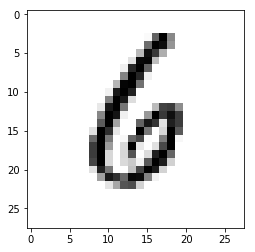

NN predicted 6


In [235]:
from matplotlib import pyplot as plt
from random import randint
num = randint(0, mnist.test.images.shape[0])
print(num)
img = mnist.test.images[num]
print(mnist.test.labels[num])

classification = sess.run(tf.argmax(y, 1), feed_dict={x: [img]})
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print('NN predicted', classification[0])

### Deep MNIST for Experts

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
import tensorflow as tf

In [3]:
sess = tf.InteractiveSession()

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [5]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [6]:
sess.run(tf.global_variables_initializer())

In [7]:
y = tf.matmul(x, W) + b

In [8]:
y

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [9]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [10]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [11]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    train_step.run(feed_dict={x: batch_xs, y_: batch_ys})

In [12]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9199


In [13]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [14]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

y = tf.matmul(x,W) + b

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

0.9195


In [ ]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))



In [2]:
!pip install imageio

    100% |████████████████████████████████| 3.3MB 1.7MB/s ta 0:00:011


In [1]:
import imageio

In [2]:
im = imageio.imread('CNN_Data/test_set/cats/cat.4002.jpg')

In [3]:
im.shape

(499, 375, 3)

In [13]:
x = imageio.imwrite?

In [14]:
x = imageio.imwrite('img.jpg', im)

In [15]:
x

In [8]:
im.reshape((28, 28, 3))

ValueError: cannot reshape array of size 561375 into shape (28,28,3)

In [9]:
import math

In [10]:
math.sqrt(561375)

749.2496246245306

In [4]:
from PIL import Image

In [5]:
import PIL

In [13]:
basewidth = 300
img = Image.open('CNN_Data/test_set/cats/cat.4002.jpg')
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((300, 300), PIL.Image.ANTIALIAS)
img.save('resized_image.jpg')


In [14]:
im = imageio.imread('resized_image.jpg')

In [15]:
im.shape

(300, 300, 3)

In [18]:
import requests


res = requests.get("http://api.nytimes.com/svc/archive/v1/2016/11.json?api-key=1f4f7c1eaf974b4e9390869010fd41f8&offset=1000&limit=1")
res = res.json()

In [29]:
from pprint import pprint

pprint(res['response']['docs'][4000])

{'_id': '5834c80495d0e03926072034',
 'abstract': None,
 'blog': [],
 'byline': {'original': 'By MIKE ISAAC',
            'person': [{'firstname': 'Mike',
                        'lastname': 'ISAAC',
                        'organization': '',
                        'rank': 1,
                        'role': 'reported'}]},
 'document_type': 'article',
 'headline': {'main': 'Facebook Said to Create Censorship Tool to Get Back '
                      'Into China',
              'print_headline': 'For Facebook, Censorship Tool Could Reopen a '
                                'Door to China'},
 'keywords': [{'isMajor': 'N',
               'name': 'organizations',
               'rank': 1,
               'value': 'Facebook Inc'},
              {'isMajor': 'N',
               'name': 'glocations',
               'rank': 2,
               'value': 'China'},
              {'isMajor': 'N',
               'name': 'subject',
               'rank': 3,
               'value': 'Censorship'},
       

In [30]:
import newspaper

In [33]:
x = newspaper.Article('https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html')

In [59]:
x.download()

In [60]:
x.parse()

In [56]:
x.config.MAX_TEXT

100000

In [72]:
len(x.text)

1676

In [71]:
x.build()

In [66]:
import re

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [85]:

html = remove_tags(x.html)

In [86]:
import nltk

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/tasneem/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/tasneem/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/tasneem/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/tasneem/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/tasneem/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/tasneem/nltk_data...
[nltk_data]    |   Package movie_reviews is already

True

In [77]:
x.parse()

In [79]:
x.meta_description

'The social network, blocked in China since 2009, has developed software to keep posts from appearing in users’ news feeds in specific geographic areas, current and former employees said.'

In [80]:
x.authors

[]

In [87]:
from newspaper import fulltext

fulltext(html)

AttributeError: 'NoneType' object has no attribute 'xpath'

In [83]:
x.top_image

'https://static01.nyt.com/images/2016/11/22/business/23FACEBOOK2/22FACEBOOK2-facebookJumbo.jpg'

In [88]:
x = newspaper.build_article('https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html')

In [89]:
x.download()

In [90]:
x.parse()

In [92]:
x.html

'<!DOCTYPE html>\n<html lang="en" itemId="https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html" itemType="http://schema.org/NewsArticle" itemScope="true" class="story" xmlns:og="http://opengraphprotocol.org/schema/">\n  <head>\n    <!––\n         0000000                         000        0000000\n       111111111      11111111100          000      111111111\n       00000        111111111111111111      00000      000000\n       000        1111111111111111111111111100000         000\n       000        1111       1111111111111111100          000\n       000         11       0     1111111100              000\n       000          1      00             1               000\n       000               00      00       1               000\n       000             000    00000       1               000\n    00000            0000  00000000       1                00000\n  11111            000 00    000000      000                 11111\n    00000          0000      00000

In [93]:
x.text

'SAN FRANCISCO — Mark Zuckerberg, Facebook’s chief executive, has cultivated relationships with China’s leaders, including President Xi Jinping. He has paid multiple visits to the country to meet its top internet executives. He has made an effort to learn Mandarin.\n\nInside Facebook, the work to enter China runs far deeper.\n\nThe social network has quietly developed software to suppress posts from appearing in people’s news feeds in specific geographic areas, according to three current and former Facebook employees, who asked for anonymity because the tool is confidential. The feature was created to help Facebook get into China, a market where the social network has been blocked, these people said. Mr. Zuckerberg has supported and defended the effort, the people added.\n\nFacebook has restricted content in other countries before, such as Pakistan, Russia and Turkey, in keeping with the typical practice of American internet companies that generally comply with government requests to b

In [105]:
html = """'<!DOCTYPE html>\n<html lang="en" itemId="https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html" itemType="http://schema.org/NewsArticle" itemScope="true" class="story" xmlns:og="http://opengraphprotocol.org/schema/">\n  <head>\n    <!––\n         0000000                         000        0000000\n       111111111      11111111100          000      111111111\n       00000        111111111111111111      00000      000000\n       000        1111111111111111111111111100000         000\n       000        1111       1111111111111111100          000\n       000         11       0     1111111100              000\n       000          1      00             1               000\n       000               00      00       1               000\n       000             000    00000       1               000\n    00000            0000  00000000       1                00000\n  11111            000 00    000000      000                 11111\n    00000          0000      000000     00000              00000\n       000        10000      000000      000              0000\n       000        00000      000000       1               000\n       000        000000     10000        1     0         000\n       000        1000000 00              1    00         000\n       000         1111111                1 0000          000\n       000          1111111100           000000           000\n       0000          111111111111111110000000            0000\n       111111111        111111111111100000          111111111\n         0000000              00000000              0000000\n  \n      NYTimes.com: All the code that\'s fit to printf()\n      We\'re hiring: https://nytimes.wd5.myworkdayjobs.com/Tech\n   -->\n    <script>\n      window.NYT_ENVIRONMENT = \'prd\';\n      window.NYT_RELEASE = \'4311804b1213bf3e7d15830f88da40ddbf484c90\';\n      window.JKIDD_PATH = \'https://a.nytimes.com/svc/nyt/data-layer\';\n      window.WEDDINGS_PATH = \'https://content.api.nytimes.com\';\n      window.GDPR_PATH = \'https://us-central1-nyt-wfvi-prd.cloudfunctions.net/gdpr-email-form\';\n      window.SENTRY_SAMPLE_RATE = 10;\n    </script>\n    <script>\n    if (document.location.search.indexOf(\'nytapp=true\') > -1) document.documentElement.classList.add(\'NYTApp\');\n    </script>\n    <script>\n100*Math.random()<=window.SENTRY_SAMPLE_RATE?(window.INSTALL_RAVEN=!0,window.nyt_errors={ravenInstalled:!1,list:[],tags:[]},window.onerror=function(n,r,o,w,t){if(!window.nyt_errors.ravenInstalled){const d={err:t,data:{}};window.nyt_errors.list.push(d)}}):window.INSTALL_RAVEN=!1;\n</script>\n    <meta charset="utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1" />\n<link rel="shortcut icon" href="/vi-assets/static-assets/favicon-4bf96cb6a1093748bf5b3c429accb9b4.ico" />\n<link rel="apple-touch-icon" href="/vi-assets/static-assets/apple-touch-icon-319373aaf4524d94d38aa599c56b8655.png" />\n<link rel="apple-touch-icon-precomposed" sizes="144×144" href="/vi-assets/static-assets/ios-ipad-144x144-319373aaf4524d94d38aa599c56b8655.png" />\n<link rel="apple-touch-icon-precomposed" sizes="114×114" href="/vi-assets/static-assets/ios-iphone-114x144-61d373c43aa8365d3940c5f1135f4597.png" />\n<link rel="apple-touch-icon-precomposed" href="/vi-assets/static-assets/ios-default-homescreen-57x57-7cccbfb151c7db793e92ea58c30b9e72.png" />\n<meta property="fb:app_id" content="9869919170" />\n<meta name="twitter:site" value="@nytimes" />\n    <title data-rh="true">Facebook Said to Create Censorship Tool to Get Back Into China - The New York Times</title><meta data-rh="true" itemprop="inLanguage" content="en-US"/><meta data-rh="true" http-equiv="Content-Language" content="en"/><meta data-rh="true" name="robots" content="noarchive"/><meta data-rh="true" name="articleid" itemprop="identifier" content="100000004781274"/><meta data-rh="true" name="description" itemprop="description" content="The social network, blocked in China since 2009, has developed software to keep posts from appearing in users’ news feeds in specific geographic areas, current and former employees said."/><meta data-rh="true" name="image" itemprop="image" content="https://static01.nyt.com/images/2016/11/22/business/23FACEBOOK2/22FACEBOOK2-facebookJumbo.jpg"/><meta data-rh="true" name="byl" content="By Mike Isaac"/><meta data-rh="true" name="thumbnail" itemprop="thumbnailUrl" content="https://static01.nyt.com/images/2016/11/22/business/23FACEBOOK2/22FACEBOOK2-thumbStandard.jpg"/><meta data-rh="true" name="news_keywords" content="Facebook,,China,Censorship,Social Media"/><meta data-rh="true" name="usageTerms" itemprop="usageTerms" content="http://www.nytimes.com/content/help/rights/sale/terms-of-sale.html"/><meta data-rh="true" name="pdate" content="20161122"/><meta data-rh="true" name="utime" content="20171221193538"/><meta data-rh="true" name="ptime" content="20161122173434"/><meta data-rh="true" property="og:url" content="https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html"/><meta data-rh="true" property="og:type" content="article"/><meta data-rh="true" property="og:title" content="Facebook Said to Create Censorship Tool to Get Back Into China"/><meta data-rh="true" property="og:image" content="https://static01.nyt.com/images/2016/11/22/business/23FACEBOOK2/22FACEBOOK2-facebookJumbo.jpg"/><meta data-rh="true" property="og:description" content="The social network, blocked in China since 2009, has developed software to keep posts from appearing in users’ news feeds in specific geographic areas, current and former employees said."/><meta data-rh="true" property="twitter:url" content="https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html"/><meta data-rh="true" property="twitter:title" content="Facebook Said to Create Censorship Tool to Get Back Into China"/><meta data-rh="true" property="twitter:description" content="The social network, blocked in China since 2009, has developed software to keep posts from appearing in users’ news feeds in specific geographic areas, current and former employees said."/><meta data-rh="true" property="twitter:image" content="https://static01.nyt.com/images/2016/11/22/business/23FACEBOOK2/22FACEBOOK2-videoSixteenByNineJumbo1600.jpg"/><meta data-rh="true" property="twitter:image:alt" content="President Xi Jinping of China, center, speaking with Mark Zuckerberg, right, the chief executive of Facebook, and Lu Wei, China’s Internet czar at the time, in 2015 at a gathering at Microsoft’s campus in Redmond, Wash."/><meta data-rh="true" property="twitter:card" content="summary_large_image"/><meta data-rh="true" property="article:section" itemprop="articleSection" content="Technology"/><meta data-rh="true" property="article:author" content="http://www.nytimes.com/by/mike-isaac"/><meta data-rh="true" property="article:tag" content="Facebook Inc"/><meta data-rh="true" property="article:tag" content="Isaac, Mike"/><meta data-rh="true" property="article:tag" content="China"/><meta data-rh="true" property="article:tag" content="Censorship"/><meta data-rh="true" property="article:tag" content="Social Media"/><meta data-rh="true" property="article:published" itemprop="datePublished" content="2016-11-22T22:34:34.000Z"/><meta data-rh="true" property="article:modified" itemprop="dateModified" content="2017-12-22T00:35:38.228Z"/><meta data-rh="true" name="CG" content="technology"/><meta data-rh="true" name="SCG" content=""/><meta data-rh="true" name="CN" content=""/><meta data-rh="true" name="CT" content=""/><meta data-rh="true" name="PT" content="article"/><meta data-rh="true" name="PST" content="News"/><meta data-rh="true" name="genre" itemprop="genre" content="News"/><meta data-rh="true" name="url" itemprop="url" content="https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html"/><meta data-rh="true" name="msapplication-starturl" content="https://www.nytimes.com"/><meta data-rh="true" property="al:android:url" content="nytimes://reader/id/100000004781274"/><meta data-rh="true" property="al:android:package" content="com.nytimes.android"/><meta data-rh="true" property="al:android:app_name" content="NYTimes"/><meta data-rh="true" name="twitter:app:name:googleplay" content="NYTimes"/><meta data-rh="true" name="twitter:app:id:googleplay" content="com.nytimes.android"/><meta data-rh="true" name="twitter:app:url:googleplay" content="nytimes://reader/id/100000004781274"/><meta data-rh="true" property="al:iphone:url" content="nytimes://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html"/><meta data-rh="true" property="al:iphone:app_store_id" content="284862083"/><meta data-rh="true" property="al:iphone:app_name" content="NYTimes"/><meta data-rh="true" property="al:ipad:url" content="nytimes://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html"/><meta data-rh="true" property="al:ipad:app_store_id" content="357066198"/><meta data-rh="true" property="al:ipad:app_name" content="NYTimes"/><link data-rh="true" rel="alternate" hrefLang="en-US" href="https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html"/><link data-rh="true" rel="alternate" hrefLang="zh-CN" href="http://cn.nytimes.com/usa/20161123/facebook-censorship-tool-china/"/><link data-rh="true" rel="canonical" href="https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html"/><link data-rh="true" rel="alternate" href="android-app://com.nytimes.android/nytimes/reader/id/100000004781274"/><link data-rh="true" rel="amphtml" href="https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.amp.html"/><link data-rh="true" rel="alternate" type="application/json+oembed" href="https://www.nytimes.com/svc/oembed/json/?url=https%3A%2F%2Fwww.nytimes.com%2F2016%2F11%2F22%2Ftechnology%2Ffacebook-censorship-tool-china.html" title="Facebook Said to Create Censorship Tool to Get Back Into China"/><script data-rh="true" >\n  var readCookie = function(name) {\n    match = document.cookie.match(new RegExp(name + \'=([^;]+)\'));\n    if (match) return match[1];\n  }\n  // Allows media.net if user is not from EEA\n  if (readCookie(\'nyt-gdpr\') !== \'1\') {\n    // Allows media.net only if prebid testing is not on\n    if (!readCookie(\'ab7\') || readCookie(\'ab7\') !== \'vi-prebid-header=1\') {\n      var mediaScript = document.createElement("script");\n      var cid = \'8CU2553YN\';\n      var domain = \'www.nytimes.com\';\n      if (window.innerWidth < 600) {\n        cid = \'8CULO58R6\';\n      }\n      mediaScript.async = true;\n      mediaScript.src="https://contextual.media.net/bidexchange.js?cid="+cid+"&dn="+domain+"&https=1";\n      document.head.appendChild(mediaScript);\n    }\n  }\n</script><script data-rh="true" >var mediaNetCID = \'8CU2553YN\';\nif (window.innerWidth < 600) {\n  mediaNetCID = \'8CULO58R6\';\n}\nwindow.advBidxc = window.advBidxc || {};window.advBidxc.renderAd = function() {};\nwindow.advBidxc.startTime = new Date().getTime(); window.advBidxc.customerId = {mediaNetCID: mediaNetCID};\nwindow.advBidxc.misc = {"isGptDisabled": 1};</script><script data-rh="true" >\n  \n  var testCookie = function (name) {\n    var match = document.cookie.match(new RegExp(name + \'=([^;]+)\'));\n    if (match) return match[1];\n  }\n\n\n  if (testCookie(\'nyt-gdpr\') !== \'1\') {\n    var gptScript = document.createElement("script");\n    gptScript.async = \'async\';\n    gptScript.src="//www.googletagservices.com/tag/js/gpt.js";\n    document.head.appendChild(gptScript);\n  }</script><script data-rh="true" >\n  var googletag = googletag || {};\n  googletag.cmd = googletag.cmd || [];\n\n  \n  var testCookie = function (name) {\n    var match = document.cookie.match(new RegExp(name + \'=([^;]+)\'));\n    if (match) return match[1];\n  }\n\n\n  if (testCookie(\'nyt-gdpr\') == \'1\') {\n      googletag.cmd.push(function() {\n        googletag.pubads().setRequestNonPersonalizedAds(1);\n      });\n  }</script>\n    <script>\n    var NYTD=NYTD||{};NYTD.Abra=function(t){"use strict";function n(t){var n=i[t];return n&&n[1]||null}function e(t,n){if(t){var e,o,r=n[0],i=n[1],u=0,c=0;if(1!==i.length||4294967296!==i[0])for(e=a(t+" "+r)>>>0,u=0,c=0;o=i[u++];)if(e<(c+=o[0]))return o}}function o(n,e,o,a){s+="subject="+n+"&test="+encodeURIComponent(e)+"&variant="+encodeURIComponent(o||0)+"&url="+encodeURIComponent(t.location.href)+"&instant=1&skipAugment=true\\n",a&&f.push(a),c||(c=t.setTimeout(r,0))}function r(){var n=new t.XMLHttpRequest,e=f;n.withCredentials=!0,n.open("POST",u),n.onreadystatechange=function(){var t,o;if(4==n.readyState)for(t=200==n.status?null:new Error(n.statusText);o=e.shift();)o(t)},n.send(s),s="",f=[],c=null}function a(t){for(var n,e,o,r,a,i,u,c=0,s=0,f=[],l=[n=1732584193,e=4023233417,~n,~e,3285377520],h=[],p=t.length;s<=p;)h[s>>2]|=(s<p?t.charCodeAt(s):128)<<8*(3-s++%4);for(h[u=p+8>>2|15]=p<<3;c<=u;c+=16){for(n=l,s=0;s<80;n=[0|[(i=((t=n[0])<<5|t>>>27)+n[4]+(f[s]=s<16?~~h[c+s]:i<<1|i>>>31)+1518500249)+((e=n[1])&(o=n[2])|~e&(r=n[3])),a=i+(e^o^r)+341275144,i+(e&o|e&r|o&r)+882459459,a+1535694389][0|s++/20],t,e<<30|e>>>2,o,r])i=f[s-3]^f[s-8]^f[s-14]^f[s-16];for(s=5;s;)l[--s]=l[s]+n[s]|0}return l[0]}var i,u,c,s="",f=[];return n.init=function(n,r){var a,c,s,f,l,h=[],p=(t.document.cookie.match(/(^|;) *nyt-a=([^;]*)/)||[])[2],d=(t.document.cookie.match(/(^|;) *ab7=([^;]*)/)||[])[2],m=new RegExp("[?&]abra(=([^&#]*))"),g=m.exec(t.location.search);if(g&&g[2]&&(d=d?g[2]+"&"+d:g[2]),i)throw new Error("can\'t init twice");if(u=r,i={},d)for(d=decodeURIComponent(d).split("&"),a=0;a<d.length;a++)l=d[a].split("="),l[0]in i||(i[l[0]]=[,l[1],1],o("ab-alloc",l[0],l[1]),l[1]&&h.push(l[0]+"="+l[1]));for(a=0;a<n.length;a++)s=n[a],(c=s[0])in i||(f=e(p,s)||[],i[c]=f,f[1]&&h.push(c.replace(/[^\\w-]/g)+"="+(""+f[1]).replace(/[^\\w-]/g)),f[2]&&o("ab-alloc",c,f[1]));h.length&&t.document.documentElement.setAttribute("data-nyt-ab",h.join(" "))},n.reportExposure=function(n,e){var r=i[n];r&&r[2]?o("ab-expose",n,r[1],e):e&&t.setTimeout(function(){e(null)},0)},n}(this);;\n    NYTD.Abra.init([["WP_Platform",[[4294967296,"vi",0]]],["vi-indexHeaderBidder",[[4294967296,"1",1]]],["vi-prebid-header",[[4294967296,null,0]]],["vi-adLibraryService",[[4294967296,"1",1]]],["vi-ads-et",[[21474837,"1",1],[4273492459,null,0]]],["vi-ad-sandbox",[[4294967296,null,0]]],["messaging-optimizely",[[107374183,"0",1],[4187593113,"1",1]]],["PER_Vi_Personalization",[[429496730,"0_control",1],[429496730,"1_personalized_best",1],[3435973836,"2_personalized",1]]],["PER_Vi_Personalization_Ramp",[[4294967296,"0_per_on",0]]],["AD_MEXP-3",[[429496730,"0_control",1],[429496730,"1_adblock10",1],[3435973836,"2_adblock80",1]]],["MKT_newsletter_0518",[[2147483648,"0_Control",1],[2147483648,"1_NL_MC1",1]]],["MKT_dfp_lanes",[[214748365,"1",0],[214748365,"2",0],[214748365,"3",0],[214748365,"4",0],[214748364,"5",0],[214748365,"6",0],[214748365,"7",0],[214748365,"8",0],[214748365,"9",0],[214748364,"10",0],[214748365,"11",0],[214748365,"12",0],[214748365,"13",0],[214748365,"14",0],[214748365,"15",0],[214748364,"16",0],[214748365,"17",0],[214748365,"18",0],[214748365,"19",0],[214748365,"20",0]]],["GDPR_MEXP_8",[[4294967296,"1",0]]],["dfp_hb_in_body",[[4294967296,"0",1]]],["STORY_bn_disco",[[1431655766,"0_control",1],[1431655765,"1_interactive1",1],[1431655765,"2_interactive2",1]]],["STORY_comment_btn",[[1073741824,"0_default",1],[1073741824,"1_bab",1],[2147483648,null,0]]],["STORY_relatedLinks",[[4294967296,"0",0]]],["STORY_EP_Recirc",[[1431655766,"0_control",1],[1431655765,"1_picksAboveMore",1],[1431655765,"2_picksBelowMore",1]]],["MKT_MC6_MEXP_224",[[2147483648,"0_control",1],[2147483648,"1_exposed",1]]],["MKT_wm_offer_fm_dfp_0718",[[2147483648,"0_control",1],[2147483648,"1_freetrial",1]]]],"//et.nytimes.com");\n  </script>\n  <script>\n    \n/* ABRA reporting for Vi rollout. Please don\'t hand-edit this minified snippet. <https://github.com/nytm/vi-rollout-abra-reporting-js> (4cc89e0 @ Tue May 29 17:04:41 EDT 2018) */ function reportViRolloutToABRA(t,e,o){"use strict";var i,a,r,n,_="";if(e&&(/^mobile\\./.test(window.location.hostname)?(i=(document.cookie.match(/(?:^|;) *vi=([^;]*)/)||[,""])[1],a=(document.cookie.match(/(?:^|;) *nyt\\.np\\.vi=([^;]*)/)||[,""])[1],r=/^b1/.test(i)?"WP_ProjectVi&variant=vi":/^z1/.test(i)?"WP_ProjectVi&variant=0":/^a2/.test(i)?"WP_ProjectVi2&variant=hp-st":/^b2/.test(i)?"WP_ProjectVi2&variant=hp":/^c2/.test(i)?"WP_ProjectVi2&variant=st":/^z2/.test(i)?"WP_ProjectVi2&variant=0":/^1\\|/.test(a)?"WP_ProjectVi&variant=vi":/^2\\|/.test(a)?"WP_ProjectVi&variant=0":null):/^www\\./.test(window.location.hostname)&&(i=(document.cookie.match(/(?:^|;) *vi_www_hp=([^;]*)/)||[,""])[1],r=/^a2/.test(i)?"WP_ProjectVi_www_hp&variant=hp-st":/^b2/.test(i)?"WP_ProjectVi_www_hp&variant=hp":/^c2/.test(i)?"WP_ProjectVi_www_hp&variant=st":/^d2/.test(i)?"WP_ProjectVi_www_hp&variant=hp-2":/^e2/.test(i)?"WP_ProjectVi_www_hp&variant=hp-serv":/^f2/.test(i)?"WP_ProjectVi_www_hp&variant=hp-orig":/^g2/.test(i)?"WP_ProjectVi_www_hp&variant=hp-rm_gpt_media_dfp":/^h2/.test(i)?"WP_ProjectVi_www_hp&variant=hp-rm_media_dfp":/^i2/.test(i)?"WP_ProjectVi_www_hp&variant=hp-orig_dfp":/^y2/.test(i)?"WP_ProjectVi_www_hp&variant=0-2":/^z2/.test(i)?"WP_ProjectVi_www_hp&variant=0":null),r&&(_+="subject=ab-alloc&test="+r+"&url="+encodeURIComponent(window.location.href)+"&instant=1&skipAugment=true\\n")),o&&(/^mobile\\./.test(window.location.hostname)?(i=(document.cookie.match(/(?:^|;) *vistorymobile=([^;]*)/)||[,""])[1],n=/^a/.test(i)?"WP_ProjectVi_Story_Mobile&variant=st":/^b/.test(i)?"WP_ProjectVi_Story_Mobile&variant=sth":/^c/.test(i)?"WP_ProjectVi_Story_Mobile&variant=mw":/^z/.test(i)?"WP_ProjectVi_Story_Mobile&variant=mwh":null):/^www\\./.test(window.location.hostname)&&(i=(document.cookie.match(/(?:^|;) *vistory=([^;]*)/)||[,""])[1],n=/^a/.test(i)?"WP_ProjectVi_story_desktop&variant=sd":/^b/.test(i)?"WP_ProjectVi_story_desktop&variant=sdh":/^c/.test(i)?"WP_ProjectVi_story_desktop&variant=nyt5":/^z/.test(i)?"WP_ProjectVi_story_desktop&variant=nyt5h":null),n&&(_+="subject=ab-alloc&test="+n+"&url="+encodeURIComponent(window.location.href)+"&instant=1&skipAugment=true\\n")),_){var s=new XMLHttpRequest;s.withCredentials=!0,s.open("POST",t),s.send(_)}}\n\n    reportViRolloutToABRA("//et.nytimes.com",true,true);\n  </script>\n    <link rel="stylesheet" href="/vi-assets/static-assets/global-056783652904d5f6bb81036368f3e6cb.css" />\n    <style>.css-1dv1kvn{border:0;-webkit-clip:rect(0 0 0 0);clip:rect(0 0 0 0);height:1px;margin:-1px;overflow:hidden;padding:0;position:absolute;width:1px;}.css-6n7j50{display:inline;}.css-1kj7lfb{display:none;}@media (min-width:1024px){.css-1kj7lfb{display:inline-block;margin-right:7px;}}.css-10m9xeu{display:block;width:16px;height:16px;}.css-1hyfx7x{display:none;}.css-1h74mhy{color:#326891;}.css-1gz70xg{border-left:1px solid #ccc;color:#326891;height:12px;margin-left:8px;padding-left:8px;}.css-9e9ivx{display:none;font-size:10px;margin-left:auto;text-transform:uppercase;}.hasLinks .css-9e9ivx{display:block;}@media (min-width:740px){.hasLinks .css-9e9ivx{margin:none;position:absolute;right:20px;}}@media (min-width:1024px){.hasLinks .css-9e9ivx{display:none;}}.css-nuvmzp{font-size:14.25px;font-family:nyt-franklin,helvetica,arial,sans-serif;font-weight:700;text-transform:uppercase;-webkit-letter-spacing:0.7px;-moz-letter-spacing:0.7px;-ms-letter-spacing:0.7px;letter-spacing:0.7px;line-height:19px;}.css-nuvmzp:hover{-webkit-text-decoration:underline;text-decoration:underline;}.css-vz7hjd{border:0;-webkit-clip:rect(0 0 0 0);clip:rect(0 0 0 0);height:1px;margin:-1px;overflow:hidden;padding:0;position:absolute;width:1px;}.css-1fe7a5q{display:inline-block;height:16px;vertical-align:sub;width:16px;}.css-1rn5q1r{border:0;-webkit-clip:rect(0 0 0 0);clip:rect(0 0 0 0);height:1px;margin:-1px;overflow:hidden;padding:0;position:absolute;width:1px;border-radius:3px;cursor:pointer;font-family:nyt-franklin,helvetica,arial,sans-serif;-webkit-transition:ease 0.6s;transition:ease 0.6s;background-color:transparent;color:#000;font-size:11px;font-weight:700;-webkit-letter-spacing:0.02em;-moz-letter-spacing:0.02em;-ms-letter-spacing:0.02em;letter-spacing:0.02em;padding:7px 9px 9px;background:#fff;display:inline-block;left:44px;text-transform:uppercase;-webkit-transition:none;transition:none;}.css-1rn5q1r:active,.css-1rn5q1r:focus{-webkit-clip:auto;clip:auto;overflow:visible;width:auto;height:auto;}.css-1rn5q1r::-moz-focus-inner{padding:0;border:0;}.css-1rn5q1r:-moz-focusring{outline:1px dotted;}.css-1rn5q1r:disabled,.css-1rn5q1r.disabled{opacity:0.5;cursor:default;}.css-1rn5q1r:active,.css-1rn5q1r.active{background-color:#f7f7f7;}@media (min-width:740px){.css-1rn5q1r:hover{background-color:#f7f7f7;}}.css-1rn5q1r:focus{margin-top:3px;padding:8px 8px 6px;}@media (min-width:1024px){.css-1rn5q1r{left:112px;}}.css-10488qs{display:none;}@media (min-width:1024px){.css-10488qs{display:inline-block;position:relative;}}.css-1iruc8t{list-style:none;margin:0;padding:0;}.css-1ropbjl::before{background-color:$white;border-bottom:1px solid #e2e2e2;border-top:2px solid #e2e2e2;content:\'\';display:block;height:1px;margin-top:0;}@media (min-width:1150px){.css-1ropbjl{margin:0 auto;max-width:1200px;padding:0 3% 9px;}}.NYTApp .css-1ropbjl{display:none;}@media print{.css-1ropbjl{display:none;}}.css-uw59u{padding:0 20px;}@media (min-width:740px){.css-uw59u{padding:0 3%;}}@media (min-width:1150px){.css-uw59u{padding:0;}}.css-jxzr5i{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-flex-flow:row;-ms-flex-flow:row;flex-flow:row;}.css-oylsik{display:block;height:44px;vertical-align:middle;width:184px;}.css-1otr2jl{margin:18px 0 0 auto;}.css-1c8n994{color:#6288a5;font-family:nyt-franklin;font-size:11px;font-style:normal;font-weight:400;line-height:11px;-webkit-text-decoration:none;text-decoration:none;}.css-qtw155{display:block;}@media (min-width:1150px){.css-qtw155{display:none;}}.css-v0l3hm{display:none;}@media (min-width:1150px){.css-v0l3hm{display:block;}}.css-g4gku8{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;margin-top:10px;min-width:600px;}.css-1rr4qq7{-webkit-flex:1;-ms-flex:1;flex:1;}.css-6xhk3s{border-left:1px solid #e2e2e2;-webkit-flex:1;-ms-flex:1;flex:1;padding-left:15px;}.css-rxqrcl{color:#333;font-size:13px;font-weight:700;font-family:nyt-franklin;height:25px;line-height:15px;margin:0;text-transform:uppercase;width:150px;}.css-tj0ten{margin-bottom:5px;white-space:nowrap;}.css-tj0ten:last-child{margin-bottom:10px;}.css-ist4u3.desktop{display:none;}@media (min-width:740px){.css-ist4u3.desktop{display:block;}.css-ist4u3.smartphone{display:none;}}.css-1gprdgz{list-style:none;margin:0;padding:0;-webkit-columns:2;columns:2;padding:0 0 15px;}.css-10t7hia{height:34px;line-height:34px;list-style-type:none;}.css-10t7hia.desktop{display:none;}@media (min-width:740px){.css-10t7hia.desktop{display:block;}.css-10t7hia.smartphone{display:none;}}.css-mzqdl{color:#333;display:block;font-family:nyt-franklin;font-size:15px;font-weight:500;height:34px;line-height:34px;-webkit-text-decoration:none;text-decoration:none;text-transform:capitalize;}.css-kwpx34{color:#000;display:inline-block;font-family:nyt-franklin;-webkit-text-decoration:none;text-decoration:none;text-transform:capitalize;width:150px;font-size:14px;font-weight:500;height:23px;line-height:16px;}.css-kwpx34:hover{cursor:pointer;-webkit-text-decoration:underline;text-decoration:underline;}body.dark .css-kwpx34{color:#fff;}.css-1k2cjfc{color:#000;display:inline-block;font-family:nyt-franklin;-webkit-text-decoration:none;text-decoration:none;text-transform:capitalize;width:150px;font-size:16px;font-weight:700;height:25px;line-height:15px;padding-bottom:0;}.css-1k2cjfc:hover{cursor:pointer;-webkit-text-decoration:underline;text-decoration:underline;}body.dark .css-1k2cjfc{color:#fff;}.css-1vhk1ks{color:#000;display:inline-block;font-family:nyt-franklin;-webkit-text-decoration:none;text-decoration:none;text-transform:capitalize;width:150px;font-size:11px;font-weight:500;height:23px;line-height:21px;}.css-1vhk1ks:hover{cursor:pointer;-webkit-text-decoration:underline;text-decoration:underline;}body.dark .css-1vhk1ks{color:#fff;}.css-6td9kr{list-style:none;margin:0;padding:0;border-top:1px solid #e2e2e2;margin-top:2px;padding-top:10px;}.css-1s4oqjt{display:inline-block;height:13px;margin-right:7px;vertical-align:middle;width:13px;}.css-gcg2nv{display:inline-block;height:13px;margin-right:7px;vertical-align:middle;width:10px;}.css-8q877r{display:inline-block;height:13px;margin-right:7px;vertical-align:middle;width:14px;}.css-15uy5yv{border-top:1px solid #ebebeb;padding-top:9px;}.css-1p8nkc0{color:#999;font-family:nyt-franklin,helvetica,arial,sans-serif;padding:10px 0;-webkit-text-decoration:none;text-decoration:none;white-space:nowrap;}.css-1p8nkc0:hover{-webkit-text-decoration:underline;text-decoration:underline;}.css-1g7m0tk{color:#326891;}.css-1g7m0tk:visited{color:#326891;}.css-1j0ipd9 .etcg8100 + .ejekc6u0{margin-top:0;}.css-1j0ipd9 .eqpy7av0 + .e1nilb050{margin-top:-0.3em;}.css-1j0ipd9 .etcg8100 + .eqpy7av0{margin-top:0;}.css-1j0ipd9 .eqpy7av0 + figure{margin-top:1.2rem;}.css-1j0ipd9 .e1nilb050 + figure{margin-top:1.2rem;}.css-1j0ipd9 .relatedcoverage + .recirculation{margin-top:20px;}.css-1j0ipd9 .wrap + .recirculation{margin-top:20px;}.css-hn080{color:#999;font-family:nyt-franklin,helvetica,arial,sans-serif;font-size:17px;margin-bottom:5px;}@media print{.css-hn080{display:none;}}.css-y8aj3r{padding:0;}.css-ohqqbz{color:#999;display:inline;margin-right:16px;padding:10px 0;width:100%;}.css-ohqqbz a{-webkit-text-decoration:none;text-decoration:none;}@media (max-width:659px){.css-ohqqbz:nth-of-type(1),.css-ohqqbz:nth-of-type(2),.css-ohqqbz:nth-of-type(3){display:none;}}.css-ohqqbz:last-of-type{margin-right:0;}.css-1hc8e7p{font-family:nyt-imperial,georgia,\'times new roman\',times,serif;font-style:italic;font-size:1rem;line-height:1.47rem;width:calc(100% - 40px);max-width:600px;margin:0 auto 1em;margin-top:1rem;}@media (min-width:740px){.css-1hc8e7p{line-height:1.6rem;}}@media (min-width:1440px){.css-1hc8e7p{width:630px;max-width:630px;}}@media print{.css-1hc8e7p{margin-left:0;margin-right:0;width:100%;max-width:100%;}}.css-acwcvw{margin-bottom:1rem;}.css-k8fkhk{font-family:nyt-franklin,helvetica,arial,sans-serif;font-size:0.86rem;line-height:1.1625rem;color:#333;margin:2rem auto 1rem;width:calc(100% - 40px);max-width:600px;}.css-k8fkhk p{margin-bottom:1rem;}.css-k8fkhk a{-webkit-text-decoration:underline;text-decoration:underline;-webkit-text-decoration-color:#ccc;text-decoration-color:#ccc;}.css-k8fkhk a:hover,.css-k8fkhk a:focus{color:#666;-webkit-text-decoration:none;text-decoration:none;}.css-k8fkhk em{font-style:italic;}.css-k8fkhk strong{font-weight:bold;}@media (min-width:600px){.css-k8fkhk a{-webkit-text-decoration:none;text-decoration:none;border-bottom:1px solid #ccc;}.css-k8fkhk a:hover,.css-k8fkhk a:focus{color:#666;border-bottom:1px solid #fff;}}@media (min-width:1440px){.css-k8fkhk{width:630px;max-width:630px;}}@media print{.css-k8fkhk{margin-left:0;margin-right:0;width:100%;max-width:100%;}}.css-3glrhn{font-family:nyt-franklin,helvetica,arial,sans-serif;font-size:0.64rem;line-height:0.9rem;width:calc(100% - 40px);max-width:600px;margin:0 auto 1em;color:#999;}.css-3glrhn a{color:#999;-webkit-text-decoration:none;text-decoration:none;}.css-3glrhn a:hover{-webkit-text-decoration:underline;text-decoration:underline;}@media (min-width:1440px){.css-3glrhn{width:630px;max-width:630px;}}@media print{.css-3glrhn{margin-left:0;margin-right:0;width:100%;max-width:100%;}}@media print{.css-3glrhn span{display:none;}}.css-1ysmpdz{-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-pack:justify;-webkit-justify-content:space-between;-ms-flex-pack:justify;justify-content:space-between;margin-left:auto;margin-right:auto;margin-bottom:15px;max-width:600px;padding-top:15px;width:calc(100% - 40px);}@media (min-width:740px){.css-1ysmpdz{margin-bottom:20px;padding-top:35px;}}@media (min-width:1024px){.css-1ysmpdz{margin-left:calc((100% - 600px) / 2);margin-right:0;width:600px;}}@media (min-width:1440px){.css-1ysmpdz{margin-left:calc((100% - 630px) / 2);max-width:630px;width:630px;}}@media print{.css-1ysmpdz{display:none;}}.css-zjzyr8{width:100%;background-color:#f7f7f5;}.css-1baulvz{display:inline-block;}.css-lyagax{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-pack:justify;-webkit-justify-content:space-between;-ms-flex-pack:justify;justify-content:space-between;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;margin:0;}.css-lyagax li{list-style:none;}.css-1ekxhvv{font-family:nyt-franklin,helvetica,arial,sans-serif;font-size:0.75rem;line-height:0.8125rem;display:block;width:100%;margin-top:5px;}@media (min-width:600px){.css-1ekxhvv{display:inline-block;width:auto;margin-top:0;}}@media print{.css-1ekxhvv{display:none;}}.css-talm6s{display:inline-block;color:#326891;}@media (min-width:600px){.css-talm6s{margin-top:0;}}.css-talm6s:hover{color:#6288a5;}.css-talm6s:visited{color:#326891;}.css-talm6s::after{color:#e2e2e2;content:\'•\';margin-left:6px;margin-right:7px;font-size:8px;}.css-talm6s:last-child::after{content:none;}.css-pplcdj{font-family:$font-serif-base;color:#666;}.css-pplcdj a{color:$link-color;-webkit-text-decoration:none;text-decoration:none;}.css-pplcdj a:hover,.css-pplcdj a:focus{-webkit-text-decoration:underline;text-decoration:underline;}.css-14jsv4e{display:none;}@media (min-width:1024px){.css-14jsv4e{display:block;margin-right:0;margin-left:auto;width:130px;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;}}@media (min-width:1440px){.css-14jsv4e{width:160px;}}@media print{.css-14jsv4e{display:none;}}.css-1m50asq{width:100%;vertical-align:top;}.css-1iizzt3 time{color:#999;font-family:nyt-imperial,georgia,\'times new roman\',times,serif;font-size:0.64rem;line-height:0.75rem;-webkit-letter-spacing:0.01em;-moz-letter-spacing:0.01em;-ms-letter-spacing:0.01em;letter-spacing:0.01em;}@media print{.css-1iizzt3{display:none;}}.css-cch8ym{display:inline-block;}.css-cch8ym > *{display:inline;margin-right:0;}@-webkit-keyframes animation-1b9egsl{0%{-webkit-transform:rotate(20deg);-ms-transform:rotate(20deg);transform:rotate(20deg);}100%{-webkit-transform:rotate(380deg);-ms-transform:rotate(380deg);transform:rotate(380deg);}}@keyframes animation-1b9egsl{0%{-webkit-transform:rotate(20deg);-ms-transform:rotate(20deg);transform:rotate(20deg);}100%{-webkit-transform:rotate(380deg);-ms-transform:rotate(380deg);transform:rotate(380deg);}}@-webkit-keyframes animation-vl5ijw{0%{-webkit-transform:scale(0.9,0.9);-ms-transform:scale(0.9,0.9);transform:scale(0.9,0.9);opacity:0.8;}50%{-webkit-transform:scale(1,1);-ms-transform:scale(1,1);transform:scale(1,1);opacity:1;}100%{-webkit-transform:scale(0.9,0.9);-ms-transform:scale(0.9,0.9);transform:scale(0.9,0.9);opacity:0.8;}}@keyframes animation-vl5ijw{0%{-webkit-transform:scale(0.9,0.9);-ms-transform:scale(0.9,0.9);transform:scale(0.9,0.9);opacity:0.8;}50%{-webkit-transform:scale(1,1);-ms-transform:scale(1,1);transform:scale(1,1);opacity:1;}100%{-webkit-transform:scale(0.9,0.9);-ms-transform:scale(0.9,0.9);transform:scale(0.9,0.9);opacity:0.8;}}.css-iioom4{width:40px;height:40px;top:calc(50% - 20px);left:calc(50% - 20px);position:absolute;-webkit-transform:translate(-40%,-45%);-ms-transform:translate(-40%,-45%);transform:translate(-40%,-45%);border-radius:50%;border:2px solid rgba(255,255,255,1);-webkit-animation:animation-vl5ijw 4000ms ease-out infinite;animation:animation-vl5ijw 4000ms ease-out infinite;}@media (min-width:600px){.css-iioom4{width:60px;height:60px;top:calc(50% - 30px);left:calc(50% - 30px);}}.css-1494nln > div{width:40px;height:40px;position:absolute;top:-2px;left:-2px;right:0;bottom:0;border-radius:50%;border:2px solid #ccc;border-color:#ccc transparent transparent;-webkit-animation:animation-1b9egsl 1500ms cubic-bezier(0.77,0.1,0.45,0.8) infinite;animation:animation-1b9egsl 1500ms cubic-bezier(0.77,0.1,0.45,0.8) infinite;}@media (min-width:600px){.css-1494nln > div{width:60px;height:60px;}}.css-1494nln > div:nth-child(2){-webkit-animation-delay:80ms;animation-delay:80ms;}.css-1r9a6mz{position:absolute;top:0;width:100%;}.css-18sbwfn{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;margin-bottom:1rem;}@media (min-width:1024px){.css-18sbwfn{height:100%;width:945px;margin-left:auto;margin-right:auto;}}@media (min-width:1440px){.css-18sbwfn{width:1200px;margin-left:auto;margin-right:auto;}}@media print{.css-18sbwfn{margin-left:0;margin-right:0;width:100%;max-width:100%;}}@media print{.css-18sbwfn{margin-bottom:1em;display:block;}}.css-1h6whtw{margin-left:auto;margin-right:auto;width:100%;}@media (min-width:1024px){.css-1h6whtw{margin-left:calc((100% - 600px) / 2);margin-right:0;width:600px;}}@media (min-width:1440px){.css-1h6whtw{max-width:630px;width:630px;margin-left:calc((100% - 630px) / 2);}}@media print{.css-1h6whtw{margin-left:0;margin-right:0;width:100%;max-width:100%;}}@-webkit-keyframes animation-f8wsfj{0%{opacity:1;}50%{opacity:0;}100%{opacity:0;}}@keyframes animation-f8wsfj{0%{opacity:1;}50%{opacity:0;}100%{opacity:0;}}@-webkit-keyframes animation-mhvv8m{0%{opacity:0;}50%{opacity:0;}100%{opacity:1;}}@keyframes animation-mhvv8m{0%{opacity:0;}50%{opacity:0;}100%{opacity:1;}}.css-xxlmxt{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;-webkit-box-pack:justify;-webkit-justify-content:space-between;-ms-flex-pack:justify;justify-content:space-between;height:100%;max-width:1200px;margin:auto;padding:0 20px;-webkit-font-smoothing:antialiased !important;}.css-xxlmxt strong{font-weight:700;}.css-zh9j4b{width:100%;font-family:nyt-franklin;text-align:left;}.css-zh9j4b span{display:inline;}@media (min-width:1024px){.css-zh9j4b{text-align:center;padding-left:190px;}}.css-12lb1tb{font-size:15px;line-height:17px;opacity:1;}.css-12lb1tb span::after{content:\'  \';white-space:pre-line;}.css-ocwxco{position:relative;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;-webkit-box-pack:end;-webkit-justify-content:flex-end;-ms-flex-pack:end;justify-content:flex-end;border-left:1px solid #dcdcdc;margin:0 0 0 30px;}@media (min-width:740px){.css-ocwxco{min-width:160px;border:none;}}.css-fiulnn{width:15px;height:15px;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-pack:center;-webkit-justify-content:center;-ms-flex-pack:center;justify-content:center;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;margin:0 0 1px 20px;background-color:unset;}@media (min-width:740px){.css-fiulnn{margin-left:10px;}}.css-11mc8y7{-webkit-transition:-webkit-transform 500ms ease;-webkit-transition:transform 500ms ease;transition:transform 500ms ease;}.css-1g2vdoh{display:none;position:absolute;top:50%;-webkit-transform:translateY(-50%);-ms-transform:translateY(-50%);transform:translateY(-50%);right:32px;}@media (min-width:740px){.css-1g2vdoh{display:block;}}.css-x1m1tm{font-size:12px;line-height:14px;text-transform:uppercase;font-weight:700;font-family:nyt-franklin;-webkit-letter-spacing:0.24px;-moz-letter-spacing:0.24px;-ms-letter-spacing:0.24px;letter-spacing:0.24px;margin-top:2px;}.css-x1m1tm.css-1ntclto{-webkit-animation:animation-f8wsfj 400ms;animation:animation-f8wsfj 400ms;}.css-x1m1tm.css-1kj3duy{-webkit-animation:animation-mhvv8m 400ms;animation:animation-mhvv8m 400ms;}.css-v89234{overflow:hidden;height:100%;}.css-fyuj2v{color:#666;font-family:nyt-imperial,georgia,\'times new roman\',times,serif;}.css-ymj87{color:#999;font-family:nyt-imperial,georgia,\'times new roman\',times,serif;}.css-10698na{text-align:center;}@media (min-width:740px){.css-10698na{padding-top:0;}}@media (min-width:1024px){}@media print{.css-10698na a[href]::after{content:\'\';}.css-10698na svg{fill:black;}}.css-nhjhh0{display:block;width:189px;height:26px;margin:5px auto 0;}@media (min-width:740px){.css-nhjhh0{width:225px;height:31px;margin:4px auto 0;}}@media (min-width:1024px){.css-nhjhh0{width:195px;height:26px;margin:6px auto 0;}}.css-pqwbx7{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;margin-bottom:10px;width:100%;}.css-1cbhw1y{display:inline-block;font-size:0.75rem;line-height:1rem;margin:0;font-family:nyt-franklin,helvetica,arial,sans-serif;font-weight:700;color:#000;}.css-pnci9c{font-family:nyt-franklin,helvetica,arial,sans-serif;font-weight:500;color:#666;font-size:0.75rem;line-height:1rem;margin-bottom:1rem;margin-bottom:0;margin-top:7px;}.css-1fz2hy2{display:inline-block;height:15px;vertical-align:middle;width:15px;background-color:#eee;border:1px #eee solid;border-radius:150px;padding:5px 6px;}.css-1fz2hy2.facebook{background-image:url(/vi-assets/static-assets/icon-fb-circle-2ec7780140bd9e8e8398bbcdf5661569.svg);}.css-1fz2hy2.twitter{background-image:url(/vi-assets/static-assets/icon-twitter-circle-fc7c2748f5613c68963a0df203bffc05.svg);}.css-1fz2hy2.email{background-image:url(/vi-assets/static-assets/icon-share-email-circle-a2acce7e23b21d47bb606b628a6c7e34.svg);}.css-1fz2hy2.link{background-image:url(/vi-assets/static-assets/icon-share-permalink-circle-3ff3876a106221ee493d9542c0895863.svg);}.css-1fz2hy2.linkedin{background-image:url(/vi-assets/static-assets/icon-share-linkedin-circle-4d7bcf236c5f3a086738746f41f46f7b.svg);}.css-1fz2hy2.whatsapp{background-image:url(/vi-assets/static-assets/icon-whatsapp-video-a9503bf2b3c73111106c496d3ebc8c67.svg);}.css-1fz2hy2.googleplus{background-image:url(/vi-assets/static-assets/icon-share-googleplus-circle-90a5a13cae4f6c9598c0e5de2639d421.svg);}.css-1fz2hy2.reddit{background-image:url(/vi-assets/static-assets/icon-share-reddit-f882338200fd1971b767627fa5f60124.svg);}.css-1fz2hy2:hover{background-color:#fff;border:1px solid #ccc;}@media (max-width:600px){.css-1fz2hy2{background-color:#fff;border:1px solid #666;}}.css-k3ynqa{display:inline-block;height:15px;vertical-align:middle;width:15px;bottom:5px;position:relative;right:4px;background-color:#eee;border:1px #eee solid;border-radius:150px;padding:5px 6px;}.css-k3ynqa.facebook{background-image:url(/vi-assets/static-assets/icon-fb-circle-2ec7780140bd9e8e8398bbcdf5661569.svg);}.css-k3ynqa.twitter{background-image:url(/vi-assets/static-assets/icon-twitter-circle-fc7c2748f5613c68963a0df203bffc05.svg);}.css-k3ynqa.email{background-image:url(/vi-assets/static-assets/icon-share-email-circle-a2acce7e23b21d47bb606b628a6c7e34.svg);}.css-k3ynqa.link{background-image:url(/vi-assets/static-assets/icon-share-permalink-circle-3ff3876a106221ee493d9542c0895863.svg);}.css-k3ynqa.linkedin{background-image:url(/vi-assets/static-assets/icon-share-linkedin-circle-4d7bcf236c5f3a086738746f41f46f7b.svg);}.css-k3ynqa.whatsapp{background-image:url(/vi-assets/static-assets/icon-whatsapp-video-a9503bf2b3c73111106c496d3ebc8c67.svg);}.css-k3ynqa.googleplus{background-image:url(/vi-assets/static-assets/icon-share-googleplus-circle-90a5a13cae4f6c9598c0e5de2639d421.svg);}.css-k3ynqa.reddit{background-image:url(/vi-assets/static-assets/icon-share-reddit-f882338200fd1971b767627fa5f60124.svg);}.css-k3ynqa:hover{background-color:#fff;border:1px solid #ccc;}@media (max-width:600px){.css-k3ynqa{background-color:#fff;border:1px solid #666;}}.css-14hhomi{background:transparent;display:inline-block;height:18px;width:20px;}.css-14hhomi.hidden{opacity:0;visibility:hidden;}.css-14hhomi.hidden:focus{opacity:1;}.css-1i0edl6{font-family:nyt-imperial,georgia,\'times new roman\',times,serif;font-size:1rem;line-height:1.47rem;margin-bottom:1rem;margin-left:20px;margin-right:20px;width:calc(100% - 40px);max-width:600px;}.css-1i0edl6 .css-1g7m0tk{-webkit-text-decoration:underline;text-decoration:underline;}.css-1i0edl6 .css-1g7m0tk:hover,.css-1i0edl6 .css-1g7m0tk:focus{-webkit-text-decoration:none;text-decoration:none;}@media (min-width:600px){.css-1i0edl6{line-height:1.6rem;}}.css-1i0edl6:first-child{margin-top:0;}.css-1i0edl6:last-child{margin-bottom:0;}@media (min-width:600px){.css-1i0edl6{margin-left:auto;margin-right:auto;}}@media (min-width:1024px){.css-1i0edl6{margin-left:0;margin-right:0;width:100%;max-width:100%;}}@media print{.css-1i0edl6{margin-left:0;margin-right:0;width:100%;max-width:100%;}}.css-1ly73wi{position:absolute;width:1px;height:1px;margin:-1px;padding:0;border:0;-webkit-clip:rect(0 0 0 0);clip:rect(0 0 0 0);overflow:hidden;}.css-1v07nl7{font-family:nyt-imperial,georgia,\'times new roman\',times,serif;color:#666;font-size:0.75rem;line-height:1rem;margin-right:7px;color:#666;}@media (min-width:1440px){.css-1v07nl7{font-size:0.8175rem;line-height:1rem;}}.css-vg01wm{font-family:nyt-imperial,georgia,\'times new roman\',times,serif;color:#999;font-size:0.64rem;line-height:1rem;display:inline-block;-webkit-letter-spacing:0.01em;-moz-letter-spacing:0.01em;-ms-letter-spacing:0.01em;letter-spacing:0.01em;}.css-1y7ysfx{color:#999;font-family:nyt-franklin,helvetica,arial,sans-serif;font-size:17px;margin-bottom:5px;width:calc(100% - 40px);max-width:600px;margin:1.5rem auto 2rem;}@media print{.css-1y7ysfx{display:none;}}@media (min-width:1440px){.css-1y7ysfx{width:630px;max-width:630px;}}@media (max-width:600px){.css-1y7ysfx .facebook,.css-1y7ysfx .twitter,.css-1y7ysfx .email{display:inline-block;}}.css-1ahraz5{color:#999;display:inline;margin-right:16px;padding:10px 0;width:100%;}.css-1ahraz5 a{-webkit-text-decoration:none;text-decoration:none;}@media (max-width:659px){.css-1ahraz5:nth-of-type(1),.css-1ahraz5:nth-of-type(2),.css-1ahraz5:nth-of-type(3){display:none;}}.css-1ahraz5:last-of-type{margin-right:0;}.css-1ahraz5:nth-of-type(1),.css-1ahraz5:nth-of-type(2),.css-1ahraz5:nth-of-type(3){display:inline;}.css-a7r3oz{font-family:nyt-franklin,helvetica,arial,sans-serif;font-weight:500;font-size:0.75rem;line-height:1.3125rem;-webkit-letter-spacing:0.05em;-moz-letter-spacing:0.05em;-ms-letter-spacing:0.05em;letter-spacing:0.05em;text-transform:uppercase;font-family:nyt-franklin,helvetica,arial,sans-serif;font-weight:500;font-size:0.6875rem;line-height:0.85rem;}.css-a7r3oz .css-1g7m0tk{-webkit-text-decoration:underline;text-decoration:underline;-webkit-text-decoration-color:#ccc;text-decoration-color:#ccc;color:#000;}.css-a7r3oz .css-1g7m0tk:hover,.css-a7r3oz .css-1g7m0tk:focus{-webkit-text-decoration:underline;text-decoration:underline;-webkit-text-decoration-color:#ccc;text-decoration-color:#ccc;color:#000;}.css-a7r3oz .css-1g7m0tk:visited{color:#000;}@media (min-width:600px){.css-a7r3oz .css-1g7m0tk{-webkit-text-decoration:none;text-decoration:none;border-bottom:2px solid #ccc;}.css-a7r3oz .css-1g7m0tk:hover,.css-a7r3oz .css-1g7m0tk:focus{border-bottom:2px solid #000;-webkit-text-decoration:none;text-decoration:none;}}@media (min-width:600px){.css-a7r3oz{font-size:0.6875rem;line-height:0.85rem;width:375px;margin-left:95px;}}.css-1aoxaax{font-size:1.35rem;line-height:1.6rem;font-family:nyt-cheltenham,georgia,\'times new roman\',times,serif;font-weight:400;color:#121212;font-weight:600;font-weight:600;font-family:nyt-cheltenham,georgia,\'times new roman\',times,serif;font-weight:500;font-size:1.125rem;line-height:1.375rem;}.css-1aoxaax .css-1g7m0tk{border-bottom:1px solid #6288a5;-webkit-text-decoration:none;text-decoration:none;}.css-1aoxaax .css-1g7m0tk:hover,.css-1aoxaax .css-1g7m0tk:focus{border-bottom:1px solid #b3c4ca;-webkit-text-decoration:none;text-decoration:none;}@media (min-width:600px){.css-1aoxaax{font-size:1.57rem;line-height:1.875rem;}}@media (min-width:600px){.css-1aoxaax{font-size:1rem;line-height:1.22rem;width:375px;margin-right:10px;}}.css-1jew1ly{font-family:nyt-franklin,helvetica,arial,sans-serif;font-weight:500;color:#666;font-size:0.75rem;line-height:1rem;margin-bottom:1rem;color:#999;font-size:0.6875rem;line-height:1.125rem;margin-top:5px;display:block;}@media (min-width:600px){.css-1jew1ly{margin-top:0;font-size:0.625rem;line-height:1.125rem;width:95px;}}.css-mn5hq9{cursor:pointer;margin:0;border-top:1px solid #ebebeb;color:#333;font-family:nyt-franklin;font-size:13px;font-weight:700;height:44px;-webkit-letter-spacing:0.04rem;-moz-letter-spacing:0.04rem;-ms-letter-spacing:0.04rem;letter-spacing:0.04rem;line-height:44px;text-transform:uppercase;}.accordionExpanded .css-mn5hq9{color:#b3b3b3;}.css-1mahq3m{font-size:11px;text-align:center;}@media (min-width:740px){.css-1mahq3m{padding:0 3% 9px;}}@media (min-width:1150px){.css-1mahq3m{margin:0 auto;max-width:1200px;}}.NYTApp .css-1mahq3m{display:none;}@media print{.css-1mahq3m{display:none;}}.css-1ho5u4o{list-style:none;margin:0 0 15px;padding:0;}@media (min-width:600px){.css-1ho5u4o{display:inline-block;}}.css-13o0c9t{list-style:none;line-height:8px;margin:0 0 35px;padding:0;}@media (min-width:600px){.css-13o0c9t{display:inline-block;}}.css-1yo489b{display:inline-block;line-height:20px;padding:0 10px;}.css-1yo489b:first-child{border-left:none;}.css-1yo489b.desktop{display:none;}@media (min-width:740px){.css-1yo489b.smartphone{display:none;}.css-1yo489b.desktop{display:inline-block;}}.css-mlcs8h{position:fixed;height:220px;z-index:1000000101;bottom:-221px;width:100%;border-top:1px solid #333;-webkit-transition:-webkit-transform 200ms ease-out;-webkit-transition:transform 200ms ease-out;transition:transform 200ms ease-out;background-color:#fff;will-change:transform;}@media (min-height:450px) and (max-width:600px){.css-mlcs8h{height:220px;bottom:-221px;-webkit-transition:-webkit-transform 200ms ease-in;-webkit-transition:transform 200ms ease-in;transition:transform 200ms ease-in;}}@media (min-width:600px){.css-mlcs8h{height:220px;bottom:-221px;-webkit-transition:-webkit-transform 200ms ease-in;-webkit-transition:transform 200ms ease-in;transition:transform 200ms ease-in;}}@media (min-width:1024px){.css-mlcs8h{height:205px;}}@media print{.css-mlcs8h{display:none;}}.css-mlcs8h.shown{-webkit-transform:translateY(-56px);-ms-transform:translateY(-56px);transform:translateY(-56px);}@media (min-width:600px){.css-mlcs8h.shown{-webkit-transition:-webkit-transform 200ms ease-out 300ms;-webkit-transition:transform 200ms ease-out 300ms;transition:transform 200ms ease-out 300ms;}}.css-mlcs8h.expanded{-webkit-transform:translateY( -219px );-ms-transform:translateY( -219px );transform:translateY( -219px );}@media (min-height:450px) and (max-width:600px){.css-mlcs8h.expanded{-webkit-transform:translateY( -219px );-ms-transform:translateY( -219px );transform:translateY( -219px );}}@media (min-width:600px){.css-mlcs8h.expanded{-webkit-transition:-webkit-transform 200ms ease-out 300ms;-webkit-transition:transform 200ms ease-out 300ms;transition:transform 200ms ease-out 300ms;-webkit-transform:translateY( -220px );-ms-transform:translateY( -220px );transform:translateY( -220px );}}.css-1ft1ynw{font-size:15px;line-height:17px;opacity:1;display:none;}.css-1ft1ynw span::after{content:\'  \';white-space:pre-line;}.css-1jp8k9w{font-size:12px;line-height:14px;text-transform:uppercase;font-weight:700;font-family:nyt-franklin;-webkit-letter-spacing:0.24px;-moz-letter-spacing:0.24px;-ms-letter-spacing:0.24px;letter-spacing:0.24px;margin-top:2px;opacity:0;-webkit-animation:animation-f8wsfj 0.5s;animation:animation-f8wsfj 0.5s;display:none;}.css-1jp8k9w.css-1ntclto{-webkit-animation:animation-f8wsfj 400ms;animation:animation-f8wsfj 400ms;}.css-1jp8k9w.css-1kj3duy{-webkit-animation:animation-mhvv8m 400ms;animation:animation-mhvv8m 400ms;}.css-1u889ti{font-size:12px;line-height:14px;text-transform:uppercase;font-weight:700;font-family:nyt-franklin;-webkit-letter-spacing:0.24px;-moz-letter-spacing:0.24px;-ms-letter-spacing:0.24px;letter-spacing:0.24px;margin-top:2px;display:none;}.css-1u889ti.css-1ntclto{-webkit-animation:animation-f8wsfj 400ms;animation:animation-f8wsfj 400ms;}.css-1u889ti.css-1kj3duy{-webkit-animation:animation-mhvv8m 400ms;animation:animation-mhvv8m 400ms;}.css-3y79bk{height:55px;width:100%;background-color:#fff;font-family:nyt-franklin;border-radius:0;cursor:pointer;}@media (min-width:1024px){.css-3y79bk{height:40px;}}.css-70rfte{position:absolute;height:55px;top:0;bottom:0;right:0;left:0;margin:0 70px 0 20px;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-flex-direction:column;-ms-flex-direction:column;flex-direction:column;-webkit-box-pack:center;-webkit-justify-content:center;-ms-flex-pack:center;justify-content:center;}@media (min-width:1024px){.css-70rfte{height:40px;margin:0;}}@media (min-width:1150px){.css-70rfte{margin:0;}}.css-9ghvn0{position:relative;bottom:0;width:100%;height:165px;z-index:1000000101;opacity:1;background-color:#fff;padding:5px 20px 20px;box-sizing:border-box;overflow:hidden;-webkit-font-smoothing:antialiased;}@media (min-height:450px) and (max-width:600px){.css-9ghvn0{height:165px;}}@media (min-width:600px){.css-9ghvn0{height:165px;}}@media print{.css-1kz2g4o{margin-bottom:15px;}}@media (min-width:1024px){.css-1bymuyk{position:relative;border-bottom:1px solid #e2e2e2;}}.css-1waixk9{background:#fff;border-bottom:1px solid #e2e2e2;height:36px;padding:8px 15px 3px;position:relative;}@media (min-width:740px){.css-1waixk9{background:#fff;padding:10px 15px 6px;}}@media (min-width:1024px){.css-1waixk9{background:transparent;border-bottom:0;padding:4px 15px 2px;}}@media print{.css-1waixk9{background:transparent;}}@media (min-width:740px){}@media (min-width:1024px){.css-1waixk9{margin:0 auto;max-width:1605px;}}.css-1f7ibof{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-pack:space-around;-webkit-justify-content:space-around;-ms-flex-pack:space-around;justify-content:space-around;left:10px;position:absolute;}@media (min-width:1024px){}@media print{.css-1f7ibof{display:none;}}.css-l2ztic{border-radius:3px;cursor:pointer;font-family:nyt-franklin,helvetica,arial,sans-serif;-webkit-transition:ease 0.6s;transition:ease 0.6s;background-color:transparent;color:#000;font-size:11px;font-weight:700;-webkit-letter-spacing:0.02em;-moz-letter-spacing:0.02em;-ms-letter-spacing:0.02em;letter-spacing:0.02em;padding:7px 9px 9px;border:0;padding:8px 9px;text-transform:uppercase;}.css-l2ztic.hidden{opacity:0;visibility:hidden;}.css-l2ztic.hidden:focus{opacity:1;}.css-l2ztic::-moz-focus-inner{padding:0;border:0;}.css-l2ztic:-moz-focusring{outline:1px dotted;}.css-l2ztic:disabled,.css-l2ztic.disabled{opacity:0.5;cursor:default;}.css-l2ztic:active,.css-l2ztic.active{background-color:#f7f7f7;}@media (min-width:740px){.css-l2ztic:hover{background-color:#f7f7f7;}}@media (min-width:1024px){.css-l2ztic{display:none;}}.css-19lv58h{border-radius:3px;cursor:pointer;font-family:nyt-franklin,helvetica,arial,sans-serif;-webkit-transition:ease 0.6s;transition:ease 0.6s;-webkit-appearance:button;-moz-appearance:button;appearance:button;background-color:#fff;border:1px solid #ebebeb;color:#333;display:inline-block;font-size:11px;font-weight:500;-webkit-letter-spacing:0.02em;-moz-letter-spacing:0.02em;-ms-letter-spacing:0.02em;letter-spacing:0.02em;line-height:13px;margin:0;padding:8px 9px;text-transform:uppercase;vertical-align:middle;display:none;}.css-19lv58h::-moz-focus-inner{padding:0;border:0;}.css-19lv58h:-moz-focusring{outline:1px dotted;}.css-19lv58h:disabled,.css-19lv58h.disabled{opacity:0.5;cursor:default;}.css-19lv58h:active,.css-19lv58h.active{background-color:#f7f7f7;}@media (min-width:740px){.css-19lv58h:hover{background-color:#f7f7f7;}}@media (min-width:1024px){.css-19lv58h{border:0;display:inline-block;margin-right:8px;}}.css-mgtjo2{border-radius:3px;cursor:pointer;font-family:nyt-franklin,helvetica,arial,sans-serif;-webkit-transition:ease 0.6s;transition:ease 0.6s;background-color:transparent;color:#000;font-size:11px;font-weight:700;-webkit-letter-spacing:0.02em;-moz-letter-spacing:0.02em;-ms-letter-spacing:0.02em;letter-spacing:0.02em;padding:7px 9px 9px;border:0;}.css-mgtjo2::-moz-focus-inner{padding:0;border:0;}.css-mgtjo2:-moz-focusring{outline:1px dotted;}.css-mgtjo2:disabled,.css-mgtjo2.disabled{opacity:0.5;cursor:default;}.css-mgtjo2:active,.css-mgtjo2.active{background-color:#f7f7f7;}@media (min-width:740px){.css-mgtjo2:hover{background-color:#f7f7f7;}}.css-mgtjo2.activeSearchButton{background-color:#f7f7f7;}@media (min-width:1024px){.css-mgtjo2{padding:8px 9px 9px;}}.css-o2c64h{display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;-webkit-box-pack:space-around;-webkit-justify-content:space-around;-ms-flex-pack:space-around;justify-content:space-around;position:absolute;right:10px;top:9px;}@media (min-width:1024px){.css-o2c64h{top:4px;}}@media print{.css-o2c64h{display:none;}}.css-mwh6ll{border-radius:3px;cursor:pointer;font-family:nyt-franklin,helvetica,arial,sans-serif;-webkit-transition:ease 0.6s;transition:ease 0.6s;background-color:#6288a5;border:1px solid #326891;color:#fff;font-size:11px;font-weight:700;-webkit-letter-spacing:0.05em;-moz-letter-spacing:0.05em;-ms-letter-spacing:0.05em;letter-spacing:0.05em;line-height:11px;padding:8px 9px 6px;text-transform:uppercase;}.css-mwh6ll::-moz-focus-inner{padding:0;border:0;}.css-mwh6ll:-moz-focusring{outline:1px dotted;}.css-mwh6ll:disabled,.css-mwh6ll.disabled{opacity:0.5;cursor:default;}@media (min-width:740px){.css-mwh6ll:hover{background-color:#326891;}}@media (min-width:1024px){.css-mwh6ll{padding:11px 12px 8px;}}.css-1i8g3m4{border-radius:3px;cursor:pointer;font-family:nyt-franklin,helvetica,arial,sans-serif;-webkit-transition:ease 0.6s;transition:ease 0.6s;background-color:transparent;color:#000;font-size:11px;font-weight:700;-webkit-letter-spacing:0.02em;-moz-letter-spacing:0.02em;-ms-letter-spacing:0.02em;letter-spacing:0.02em;padding:7px 9px 9px;border:0;display:block;}.css-1i8g3m4.hidden{opacity:0;visibility:hidden;}.css-1i8g3m4.hidden:focus{opacity:1;}.css-1i8g3m4::-moz-focus-inner{padding:0;border:0;}.css-1i8g3m4:-moz-focusring{outline:1px dotted;}.css-1i8g3m4:disabled,.css-1i8g3m4.disabled{opacity:0.5;cursor:default;}.css-1i8g3m4:active,.css-1i8g3m4.active{background-color:#f7f7f7;}@media (min-width:740px){.css-1i8g3m4:hover{background-color:#f7f7f7;}}@media (min-width:740px){.css-1i8g3m4{border:none;line-height:13px;padding:9px 9px 12px;}}@media (min-width:1024px){.css-1i8g3m4{display:none;}}@media (min-width:1150px){}.css-7ne3o6{-webkit-align-items:center;-webkit-box-align:center;-ms-flex-align:center;align-items:center;display:-webkit-box;display:-webkit-flex;display:-ms-flexbox;display:flex;font-family:nyt-franklin,helvetica,arial,sans-serif;font-size:11px;-webkit-box-pack:space-around;-webkit-justify-content:space-around;-ms-flex-pack:space-around;justify-content:space-around;padding:13px 20px 10px;}@media (min-width:1024px){.css-7ne3o6{-webkit-box-pack:justify;-webkit-justify-content:space-between;-ms-flex-pack:justify;justify-content:space-between;border:none;padding:0;height:0;-webkit-transform:translateY(42px);-ms-transform:translateY(42px);transform:translateY(42px);}}.css-7ne3o6.hasLinks .e448j0e0{margin:-1px 0 1px;}@media print{.css-7ne3o6{display:none;}}.css-i40rcp{color:#121212;font-size:12px;font-family:nyt-cheltenham-small;display:none;}.css-526k6r{color:#121212;font-size:12px;font-family:nyt-franklin,helvetica,arial,sans-serif;font-weight:500;display:none;}@media (min-width:740px){.css-526k6r{margin:0;position:absolute;left:20px;}}@media (min-width:1024px){.css-526k6r{position:relative;left:inherit;}}.css-30n6iy{width:100%;width:calc(100% - 40px);max-width:600px;margin-left:20px;margin-right:20px;}@media (min-width:600px){.css-30n6iy{margin-left:auto;margin-right:auto;}}@media (min-width:1024px){.css-30n6iy{width:600px;}}@media (min-width:1440px){.css-30n6iy{width:630px;max-width:630px;}}@media print{.css-30n6iy{margin-left:0;margin-right:0;width:100%;max-width:100%;}}.css-1wtlzrm{font-family:nyt-imperial,georgia,\'times new roman\',times,serif;color:#666;margin:10px 20px 0 20px;text-align:left;}.css-1wtlzrm a{color:#326891;-webkit-text-decoration:none;text-decoration:none;}.css-1wtlzrm a:hover,.css-1wtlzrm a:focus{-webkit-text-decoration:underline;text-decoration:underline;}@media (min-width:600px){.css-1wtlzrm{margin-left:0;margin-right:20px;}}@media (min-width:1440px){.css-1wtlzrm{max-width:px;}}.css-1wr3we4{display:none;}@media (min-width:1024px){.css-1wr3we4{display:block;position:absolute;left:105px;line-height:19px;top:10px;}}.css-17mw4cr{position:relative;height:0;padding-bottom:56.25%;}.css-14yyojz{z-index:10000;position:relative;width:100%;height:0;background:#f3f3f3;padding-bottom:56.25%;}@media (min-width:600px){.css-14yyojz{background:#f7f7f7;}}.css-u8sqr{font-family:nyt-franklin,helvetica,arial,sans-serif;font-weight:500;color:#666;font-size:0.75rem;line-height:1rem;margin-bottom:1rem;}.css-1io1gfx{color:#999;font-family:nyt-imperial,georgia,\'times new roman\',times,serif;line-height:0.64rem;}.css-1io1gfx::before{color:#e2e2e2;content:\'•\';font-size:8px;margin-left:10px;margin-right:10px;}.css-1s28epf{display:inline;color:#000;}.css-1s28epf span{-webkit-text-decoration:underline;text-decoration:underline;-webkit-text-decoration-color:#ccc;text-decoration-color:#ccc;}.css-1s28epf span:hover,.css-1s28epf span:focus{-webkit-text-decoration-color:#000;text-decoration-color:#000;}.css-sb57iz .etcg8100{margin-top:30px;margin-bottom:10px;font-weight:700;line-height:0.75rem;color:#121212;}@media print{.css-sb57iz .etcg8100{margin-left:0;margin-right:0;width:100%;max-width:100%;}}.css-sb57iz .ejekc6u0{margin-bottom:1rem;}.css-sb57iz .ewc5vgb0{color:#333;}.css-sb57iz .eqgapgq0{width:auto;margin-bottom:0;margin-left:0;display:inline-block;}.css-sb57iz .e345g290{margin-bottom:20px;color:#121212;}@media print{.css-sb57iz .e345g290{margin-left:0;margin-right:0;width:100%;max-width:100%;}}.css-ifnb0o{font-family:nyt-cheltenham,georgia,\'times new roman\',times,serif;color:#121212;font-weight:700;font-style:italic;font-size:1.71rem;line-height:2rem;font-weight:700;font-style:italic;font-size:1.71rem;line-height:2rem;margin:0 20px 1rem;position:relative;width:calc(100% - 40px);max-width:600px;margin-left:20px;margin-right:20px;}@media (min-width:740px){.css-ifnb0o{font-size:2rem;line-height:2.25rem;}}@media (min-width:740px){.css-ifnb0o{font-size:2rem;line-height:2.25rem;}}@media (min-width:600px){.css-ifnb0o{margin-left:auto;margin-right:auto;}}@media print{.css-ifnb0o{margin-left:0;margin-right:0;width:100%;max-width:100%;}}@media (min-width:600px){.css-ifnb0o{margin-left:auto;margin-right:auto;}}@media (min-width:1024px){.css-ifnb0o{width:600px;}}@media (min-width:1440px){.css-ifnb0o{width:630px;max-width:630px;}}@media print{.css-ifnb0o{margin-left:0;margin-right:0;width:100%;max-width:100%;}}.css-l1fb44{width:100%;max-width:600px;margin:37px auto;}@media (min-width:600px){.css-l1fb44{width:calc(100% - 40px);}}@media (min-width:740px){.css-l1fb44{width:auto;max-width:630px;}}@media (min-width:1440px){.css-l1fb44{max-width:720px;}}.css-l1fb44 strong{font-weight:700;}.css-l1fb44 em{font-style:italic;}@media (min-width:600px){.css-l1fb44{margin:43px auto;}}@-webkit-keyframes animation-g7rb99{0%{-webkit-transform:scale(1) rotate(0);-ms-transform:scale(1) rotate(0);transform:scale(1) rotate(0);}100%{-webkit-transform:scale(1.05) rotate(-90deg);-ms-transform:scale(1.05) rotate(-90deg);transform:scale(1.05) rotate(-90deg);}}@keyframes animation-g7rb99{0%{-webkit-transform:scale(1) rotate(0);-ms-transform:scale(1) rotate(0);transform:scale(1) rotate(0);}100%{-webkit-transform:scale(1.05) rotate(-90deg);-ms-transform:scale(1.05) rotate(-90deg);transform:scale(1.05) rotate(-90deg);}}.css-zswjxk{margin-top:20px !important;margin-bottom:32px;}.css-zswjxk time{color:#999;font-family:nyt-imperial,georgia,\'times new roman\',times,serif;font-size:0.64rem;line-height:0.75rem;-webkit-letter-spacing:0.01em;-moz-letter-spacing:0.01em;-ms-letter-spacing:0.01em;letter-spacing:0.01em;}@media print{.css-zswjxk{display:none;}}@media (min-width:740px){.css-zswjxk{margin-top:25px !important;}}body{overflow-x:hidden;}</style>\n    <link rel="stylesheet" href="/vi-assets/static-assets/main-a7f5cdc25c571df4fda3e40f7477af19.css">\n    <script>window.__emotion = ["1dv1kvn","6n7j50","1kj7lfb","10m9xeu","1hyfx7x","1h74mhy","1gz70xg","9e9ivx","nuvmzp","vz7hjd","1fe7a5q","1rn5q1r","10488qs","1iruc8t","1ropbjl","uw59u","jxzr5i","oylsik","1otr2jl","1c8n994","qtw155","v0l3hm","g4gku8","1rr4qq7","6xhk3s","rxqrcl","tj0ten","ist4u3","1gprdgz","10t7hia","mzqdl","kwpx34","1k2cjfc","1vhk1ks","6td9kr","1s4oqjt","gcg2nv","8q877r","15uy5yv","1p8nkc0","1g7m0tk","1j0ipd9","hn080","y8aj3r","ohqqbz","1hc8e7p","acwcvw","k8fkhk","3glrhn","1ysmpdz","zjzyr8","1baulvz","lyagax","1ekxhvv","talm6s","pplcdj","14jsv4e","1m50asq","1iizzt3","cch8ym","1b9egsl","vl5ijw","iioom4","1494nln","1r9a6mz","18sbwfn","1h6whtw","f8wsfj","mhvv8m","xxlmxt","zh9j4b","12lb1tb","ocwxco","fiulnn","11mc8y7","1g2vdoh","x1m1tm","v89234","fyuj2v","ymj87","10698na","nhjhh0","pqwbx7","1cbhw1y","pnci9c","1fz2hy2","k3ynqa","14hhomi","1i0edl6","1xdhyk6","1ly73wi","1v07nl7","vg01wm","1y7ysfx","1ahraz5","a7r3oz","1aoxaax","1jew1ly","mn5hq9","1mahq3m","1ho5u4o","13o0c9t","1yo489b","mlcs8h","1ft1ynw","1jp8k9w","1u889ti","3y79bk","70rfte","9ghvn0","1kz2g4o","1bymuyk","1waixk9","1f7ibof","l2ztic","19lv58h","mgtjo2","o2c64h","mwh6ll","1i8g3m4","7ne3o6","i40rcp","526k6r","30n6iy","1wtlzrm","1wr3we4","17mw4cr","14yyojz","u8sqr","1io1gfx","1s28epf","sb57iz","ifnb0o","l1fb44","g7rb99","zswjxk","to3u6"]</script>\n    <script>\n      \n(function (w, d, fontManifest, needed, rest) {\n  var supportsWoff2 = function() {\n    if (!(\'FontFace\' in w)) return false;\n    var f = new FontFace(\'t\', \'url("data:application/font-woff2;base64,d09GMgABAAAAAADcAAoAAAAAAggAAACWAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAABk4ALAoUNAE2AiQDCAsGAAQgBSAHIBtvAcieB3aD8wURQ+TZazbRE9HvF5vde4KCYGhiCgq/NKPF0i6UIsZynbP+Xi9Ng+XLbNlmNz/xIBBqq61FIQRJhC/+QA/08PJQJ3sK5TZFMlWzC/iK5GUN40psgqvxwBjBOg6JUSJ7ewyKE2AAaXZrfUB4v+hze37ugJ9d+DeYqiDwVgCawviwVFGnuttkLqIMGivmDg") format("woff2")\', {});\n    f.load()[\'catch\'](function() {});\n    return f.status == \'loading\' || f.status == \'loaded\';\n  }\n\n  var addFontFace = function(fontFace) {\n    var style = d.createElement(\'style\');\n    style.appendChild(d.createTextNode(fontFace));\n    d.querySelector(\'head\').appendChild(style);\n  };\n\n  var fetchFontFace = function(url, format, hash, hashName, fontName) {\n    var xhr = new XMLHttpRequest();\n    xhr.open(\'GET\', url, true);\n    xhr.onreadystatechange = function() {\n      if (xhr.readyState === 4 && xhr.status === 200) {\n        addFontFace(xhr.responseText);\n        try {\n          localStorage.setItem(\'nyt-fontFormat\', format);\n          localStorage.setItem(hashName, hash);\n        } catch(e) { return; }\n        localStorage.setItem(fontName, xhr.responseText);\n      }\n      return true;\n    };\n    xhr.send(null);\n  };\n\n  var loadFonts = function(bundles, now) {\n    var fontFormat;\n    try {\n      fontFormat = localStorage.getItem(\'nyt-fontFormat\');\n    } catch(e) {}\n    if (!fontFormat) fontFormat = supportsWoff2() ? \'woff2\' : \'woff\';\n\n    for (var i = 0; i < bundles.length; i++) {\n      var bundle = bundles[i];\n      var ext = bundle !== \'shared\' ? \'-\' + bundle : \'\';\n      var hashName = \'nyt-fontHash\' + ext;\n      var fontName = \'nyt-fontFace\' + ext;\n      var font = fontManifest[bundle][fontFormat];\n      var oldHash = localStorage.getItem(hashName);\n      var fontFace = localStorage.getItem(fontName);\n      if (oldHash === font.hash && fontFace) {\n        addFontFace(fontFace);\n      } else {\n        var load = function(url, format, hash, hashName, fontName) {\n          return function() {\n            fetchFontFace(url, format, hash, hashName, fontName);\n          }\n        }(font.url, fontFormat, font.hash, hashName, fontName);\n        if (now) load();\n        else document.addEventListener(\'DOMContentLoaded\', load);\n      }\n    }\n  };\n  loadFonts(needed);\n  window.addEventListener(\'load\', function() { loadFonts(rest, true); });\n})(window, document, {"shared":{"woff":{"hash":"28c46939de084f6421d4451916ebd854","url":"/vi-assets/static-assets/shared-woff.fonts-28c46939de084f6421d4451916ebd854.css"},"woff2":{"hash":"e16d506f6787f01da791109e4e744e0f","url":"/vi-assets/static-assets/shared-woff2.fonts-e16d506f6787f01da791109e4e744e0f.css"}},"story":{"woff":{"hash":"d5c4f7d33f59d401af5121eb86eade0d","url":"/vi-assets/static-assets/story-woff.fonts-d5c4f7d33f59d401af5121eb86eade0d.css"},"woff2":{"hash":"8cda51537d027e0df92bea96a094bfe3","url":"/vi-assets/static-assets/story-woff2.fonts-8cda51537d027e0df92bea96a094bfe3.css"}},"opinion":{"woff":{"hash":"dfc5106c9c0aaa76688687e664474b04","url":"/vi-assets/static-assets/opinion-woff.fonts-dfc5106c9c0aaa76688687e664474b04.css"},"woff2":{"hash":"e2b27ff317927dfd77bdd429409627e0","url":"/vi-assets/static-assets/opinion-woff2.fonts-e2b27ff317927dfd77bdd429409627e0.css"}},"tmag":{"woff":{"hash":"4634f3c7ddebb9113b69d4578d9a0ba0","url":"/vi-assets/static-assets/tmag-woff.fonts-4634f3c7ddebb9113b69d4578d9a0ba0.css"},"woff2":{"hash":"8622c93c260fa93b229b7249df708fb1","url":"/vi-assets/static-assets/tmag-woff2.fonts-8622c93c260fa93b229b7249df708fb1.css"}},"mag":{"woff":{"hash":"109e6d301ed49c8078086b5892696adf","url":"/vi-assets/static-assets/mag-woff.fonts-109e6d301ed49c8078086b5892696adf.css"},"woff2":{"hash":"fb42c728dc70cc4ef6010a60cb10b0bd","url":"/vi-assets/static-assets/mag-woff2.fonts-fb42c728dc70cc4ef6010a60cb10b0bd.css"}},"well":{"woff":{"hash":"f0e613b89006e99b4622d88aa5563a81","url":"/vi-assets/static-assets/well-woff.fonts-f0e613b89006e99b4622d88aa5563a81.css"},"woff2":{"hash":"77806b85de524283fe742b916c9d0ee4","url":"/vi-assets/static-assets/well-woff2.fonts-77806b85de524283fe742b916c9d0ee4.css"}}}, ["shared","story"], ["opinion","tmag","mag","well"]);\n\n      // TODO: wrap in IIFE, minify and inline at build time\n      // try/catch so that this won\'t break the following code on localhost\n      try { d.domain = \'nytimes.com\'; } catch(e) {}\n      (function() {\n  var thisHour = (new Date()).getHours();\n  var styles = \'[data-timezone][data-timezone~="\' + thisHour +\'"] { display: block }\';\n  var s = document.createElement(\'style\');\n  s.innerHTML = styles;\n  document.head.appendChild(s);\n})();\n      \n    !function(){if(\'PerformanceLongTaskTiming\' in window){var g=window.__tti={e:[]};\n    g.o=new PerformanceObserver(function(l){g.e=g.e.concat(l.getEntries())});\n    g.o.observe({entryTypes:[\'longtask\']})}}();\n\n      \n\ntry {\n  var observer = new window.PerformanceObserver(function (list) {\n    var entries = list.getEntries();\n    for (var i = 0; i < entries.length; i += 1) {\n      var entry = entries[i];\n      var performance = {};\n     \n      performance[entry.name] = Math.round(entry.startTime + entry.duration);\n      (window.dataLayer = window.dataLayer || []).push({\n        event: "performance",\n        pageview: {\n          performance: performance\n        }\n      });\n    }\n  });\n  observer.observe({ entryTypes: ["paint"] });\n} catch (e) {}\n    </script>\n    <style>[data-timezone] { display: none }</style>\n  </head>\n  <body>\n    <div id="app"><div class="css-v89234 e1dd99ql0" data-reactroot=""><div><div><div><div><div class="css-1kz2g4o eid77k0"><header class="css-1bymuyk eid77k1"><section class="css-1waixk9 eid77k2"><div class="css-1f7ibof em5m38e0"><div class="css-6n7j50"><button aria-haspopup="true" aria-expanded="false" aria-label="Sections Navigation &amp; Search" class="em5m38e1 css-l2ztic" data-testid="nav-button"><svg class="css-1fe7a5q" viewBox="0 0 16 16"><rect x="1" y="3" fill="#333333" width="14" height="2"></rect><rect x="1" y="7" fill="#333333" width="14" height="2"></rect><rect x="1" y="11" fill="#333333" width="14" height="2"></rect></svg></button></div><button id="desktop-sections-button" aria-label="Sections Navigation" class="css-19lv58h em5m38e2"><span class="css-vz7hjd">Sections</span><svg class="css-1fe7a5q" viewBox="0 0 16 16"><rect x="1" y="3" fill="#333333" width="14" height="2"></rect><rect x="1" y="7" fill="#333333" width="14" height="2"></rect><rect x="1" y="11" fill="#333333" width="14" height="2"></rect></svg></button><div class="css-10488qs"><button class="css-mgtjo2 e1f9nlu40"><span class="css-vz7hjd">SEARCH</span><svg class="css-1fe7a5q" viewBox="0 0 16 16"><path fill="#333" d="M11.3,9.2C11.7,8.4,12,7.5,12,6.5C12,3.5,9.5,1,6.5,1S1,3.5,1,6.5S3.5,12,6.5,12c1,0,1.9-0.3,2.7-0.7l3.3,3.3c0.3,0.3,0.7,0.4,1.1,0.4s0.8-0.1,1.1-0.4c0.6-0.6,0.6-1.5,0-2.1L11.3,9.2zM6.5,10.3c-2.1,0-3.8-1.7-3.8-3.8c0-2.1,1.7-3.8,3.8-3.8c2.1,0,3.8,1.7,3.8,3.8C10.3,8.6,8.6,10.3,6.5,10.3z"></path></svg></button></div><a class="css-1rn5q1r" href="#site-content">Skip to content</a><a class="css-1rn5q1r" href="#site-index">Skip to site index</a></div><div class="css-1wr3we4 e1lbd6ne0"><a href="https://www.nytimes.com/section/technology" class="css-nuvmzp">Technology</a></div><div class="css-10698na e1ibjbtf0"><a aria-label="New York Times Logo. Click to visit the homepage" class="css-nhjhh0 e1ibjbtf1" href="/"><svg class="" viewBox="0 0 184 25" fill="#000"><path d="M13.8 2.9c0-2-1.9-2.5-3.4-2.5v.3c.9 0 1.6.3 1.6 1 0 .4-.3 1-1.2 1-.7 0-2.2-.4-3.3-.8C6.2 1.4 5 1 4 1 2 1 .6 2.5.6 4.2c0 1.5 1.1 2 1.5 2.2l.1-.2c-.2-.2-.5-.4-.5-1 0-.4.4-1.1 1.4-1.1.9 0 2.1.4 3.7.9 1.4.4 2.9.7 3.7.8v3.1L9 10.2v.1l1.5 1.3v4.3c-.8.5-1.7.6-2.5.6-1.5 0-2.8-.4-3.9-1.6l4.1-2V6l-5 2.2C3.6 6.9 4.7 6 5.8 5.4l-.1-.3c-3 .8-5.7 3.6-5.7 7 0 4 3.3 7 7 7 4 0 6.6-3.2 6.6-6.5h-.2c-.6 1.3-1.5 2.5-2.6 3.1v-4.1l1.6-1.3v-.1l-1.6-1.3V5.8c1.5 0 3-1 3-2.9zm-8.7 11l-1.2.6c-.7-.9-1.1-2.1-1.1-3.8 0-.7 0-1.5.2-2.1l2.1-.9v6.2zm10.6 2.3l-1.3 1 .2.2.6-.5 2.2 2 3-2-.1-.2-.8.5-1-1V9.4l.8-.6 1.7 1.4v6.1c0 3.8-.8 4.4-2.5 5v.3c2.8.1 5.4-.8 5.4-5.7V9.3l.9-.7-.2-.2-.8.6-2.5-2.1L18.5 9V.8h-.2l-3.5 2.4v.2c.4.2 1 .4 1 1.5l-.1 11.3zM34 15.1L31.5 17 29 15v-1.2l4.7-3.2v-.1l-2.4-3.6-5.2 2.8v6.6l-1 .8.2.2.9-.7 3.4 2.5 4.5-3.6-.1-.4zm-5-1.7V8.5l.2-.1 2.2 3.5-2.4 1.5zM53.1 2c0-.3-.1-.6-.2-.9h-.2c-.3.8-.7 1.2-1.7 1.2-.9 0-1.5-.5-1.9-.9l-2.9 3.3.2.2 1-.9c.6.5 1.1.9 2.5 1v8.3L44 3.2c-.5-.8-1.2-1.9-2.6-1.9-1.6 0-3 1.4-2.8 3.6h.3c.1-.6.4-1.3 1.1-1.3.5 0 1 .5 1.3 1v3.3c-1.8 0-3 .8-3 2.3 0 .8.4 2 1.6 2.3v-.2c-.2-.2-.3-.4-.3-.7 0-.5.4-.9 1.1-.9h.5v4.2c-2.1 0-3.8 1.2-3.8 3.2 0 1.9 1.6 2.8 3.4 2.7v-.2c-1.1-.1-1.6-.6-1.6-1.3 0-.9.6-1.3 1.4-1.3.8 0 1.5.5 2 1.1l2.9-3.2-.2-.2-.7.8c-1.1-1-1.7-1.3-3-1.5V5l8 14h.6V5c1.5-.1 2.9-1.3 2.9-3zm7.3 13.1L57.9 17l-2.5-2v-1.2l4.7-3.2v-.1l-2.4-3.6-5.2 2.8v6.6l-1 .8.2.2.9-.7 3.4 2.5 4.5-3.6-.1-.4zm-5-1.7V8.5l.2-.1 2.2 3.5-2.4 1.5zM76.7 8l-.7.5-1.9-1.6-2.2 2 .9.9v7.5l-2.4-1.5V9.6l.8-.5-2.3-2.2-2.2 2 .9.9V17l-.3.2-2.1-1.5v-6c0-1.4-.7-1.8-1.5-2.3-.7-.5-1.1-.8-1.1-1.5 0-.6.6-.9.9-1.1v-.2c-.8 0-2.9.8-2.9 2.7 0 1 .5 1.4 1 1.9s1 .9 1 1.8v5.8l-1.1.8.2.2 1-.8 2.3 2 2.5-1.7 2.8 1.7 5.3-3.1V9.2l1.3-1-.2-.2zm18.6-5.5l-1 .9-2.2-2-3.3 2.4V1.6h-.3l.1 16.2c-.3 0-1.2-.2-1.9-.4l-.2-13.5c0-1-.7-2.4-2.5-2.4s-3 1.4-3 2.8h.3c.1-.6.4-1.1 1-1.1s1.1.4 1.1 1.7v3.9c-1.8.1-2.9 1.1-2.9 2.4 0 .8.4 2 1.6 2V13c-.4-.2-.5-.5-.5-.7 0-.6.5-.8 1.3-.8h.4v6.2c-1.5.5-2.1 1.6-2.1 2.8 0 1.7 1.3 2.9 3.3 2.9 1.4 0 2.6-.2 3.8-.5 1-.2 2.3-.5 2.9-.5.8 0 1.1.4 1.1.9 0 .7-.3 1-.7 1.1v.2c1.6-.3 2.6-1.3 2.6-2.8s-1.5-2.4-3.1-2.4c-.8 0-2.5.3-3.7.5-1.4.3-2.8.5-3.2.5-.7 0-1.5-.3-1.5-1.3 0-.8.7-1.5 2.4-1.5.9 0 2 .1 3.1.4 1.2.3 2.3.6 3.3.6 1.5 0 2.8-.5 2.8-2.6V3.7l1.2-1-.2-.2zm-4.1 6.1c-.3.3-.7.6-1.2.6s-1-.3-1.2-.6V4.2l1-.7 1.4 1.3v3.8zm0 3c-.2-.2-.7-.5-1.2-.5s-1 .3-1.2.5V9c.2.2.7.5 1.2.5s1-.3 1.2-.5v2.6zm0 4.7c0 .8-.5 1.6-1.6 1.6h-.8V12c.2-.2.7-.5 1.2-.5s.9.3 1.2.5v4.3zm13.7-7.1l-3.2-2.3-4.9 2.8v6.5l-1 .8.1.2.8-.6 3.2 2.4 5-3V9.2zm-5.4 6.3V8.3l2.5 1.8v7.1l-2.5-1.7zm14.9-8.4h-.2c-.3.2-.6.4-.9.4-.4 0-.9-.2-1.1-.5h-.2l-1.7 1.9-1.7-1.9-3 2 .1.2.8-.5 1 1.1v6.3l-1.3 1 .2.2.6-.5 2.4 2 3.1-2.1-.1-.2-.9.5-1.2-1V9c.5.5 1.1 1 1.8 1 1.4.1 2.2-1.3 2.3-2.9zm12 9.6L123 19l-4.6-7 3.3-5.1h.2c.4.4 1 .8 1.7.8s1.2-.4 1.5-.8h.2c-.1 2-1.5 3.2-2.5 3.2s-1.5-.5-2.1-.8l-.3.5 5 7.4 1-.6v.1zm-11-.5l-1.3 1 .2.2.6-.5 2.2 2 3-2-.2-.2-.8.5-1-1V.8h-.1l-3.6 2.4v.2c.4.2 1 .3 1 1.5v11.3zM143 2.9c0-2-1.9-2.5-3.4-2.5v.3c.9 0 1.6.3 1.6 1 0 .4-.3 1-1.2 1-.7 0-2.2-.4-3.3-.8-1.3-.4-2.5-.8-3.5-.8-2 0-3.4 1.5-3.4 3.2 0 1.5 1.1 2 1.5 2.2l.1-.2c-.3-.2-.6-.4-.6-1 0-.4.4-1.1 1.4-1.1.9 0 2.1.4 3.7.9 1.4.4 2.9.7 3.7.8V9l-1.5 1.3v.1l1.5 1.3V16c-.8.5-1.7.6-2.5.6-1.5 0-2.8-.4-3.9-1.6l4.1-2V6l-5 2.2c.5-1.3 1.6-2.2 2.6-2.9l-.1-.2c-3 .8-5.7 3.5-5.7 6.9 0 4 3.3 7 7 7 4 0 6.6-3.2 6.6-6.5h-.2c-.6 1.3-1.5 2.5-2.6 3.1v-4.1l1.6-1.3v-.1L140 8.8v-3c1.5 0 3-1 3-2.9zm-8.7 11l-1.2.6c-.7-.9-1.1-2.1-1.1-3.8 0-.7.1-1.5.3-2.1l2.1-.9-.1 6.2zm12.2-12h-.1l-2 1.7v.1l1.7 1.9h.2l2-1.7v-.1l-1.8-1.9zm3 14.8l-.8.5-1-1V9.3l1-.7-.2-.2-.7.6-1.8-2.1-2.9 2 .2.3.7-.5.9 1.1v6.5l-1.3 1 .1.2.7-.5 2.2 2 3-2-.1-.3zm16.7-.1l-.7.5-1.1-1V9.3l1-.8-.2-.2-.8.7-2.3-2.1-3 2.1-2.3-2.1L154 9l-1.8-2.1-2.9 2 .1.3.7-.5 1 1.1v6.5l-.8.8 2.3 1.9 2.2-2-.9-.9V9.3l.9-.6 1.5 1.4v6l-.8.8 2.3 1.9 2.2-2-.9-.9V9.3l.8-.5 1.6 1.4v6l-.7.7 2.3 2.1 3.1-2.1v-.3zm8.7-1.5l-2.5 1.9-2.5-2v-1.2l4.7-3.2v-.1l-2.4-3.6-5.2 2.8v6.8l3.5 2.5 4.5-3.6-.1-.3zm-5-1.7V8.5l.2-.1 2.2 3.5-2.4 1.5zm14.1-.9l-1.9-1.5c1.3-1.1 1.8-2.6 1.8-3.6v-.6h-.2c-.2.5-.6 1-1.4 1-.8 0-1.3-.4-1.8-1L176 9.3v3.6l1.7 1.3c-1.7 1.5-2 2.5-2 3.3 0 1 .5 1.7 1.3 2l.1-.2c-.2-.2-.4-.3-.4-.8 0-.3.4-.8 1.2-.8 1 0 1.6.7 1.9 1l4.3-2.6v-3.6h-.1zm-1.1-3c-.7 1.2-2.2 2.4-3.1 3l-1.1-.9V8.1c.4 1 1.5 1.8 2.6 1.8.7 0 1.1-.1 1.6-.4zm-1.7 8c-.5-1.1-1.7-1.9-2.9-1.9-.3 0-1.1 0-1.9.5.5-.8 1.8-2.2 3.5-3.2l1.2 1 .1 3.6z"></path></svg></a></div><div class="css-o2c64h e1uwo0ec1"><a href="https://www.nytimes.com/subscription/multiproduct/lp8HYKU.html?campaignId=6W74R" class="css-1kj7lfb"><button class="css-mwh6ll e1uwo0ec0">Subscribe</button></a><a href="https://myaccount.nytimes.com/auth/login" class="css-1kj7lfb"><button class="css-mwh6ll e1uwo0ec0">Log In</button></a><div class="css-6n7j50"><button aria-haspopup="true" aria-expanded="false" aria-label="User Settings" class="e1uwo0ec4 css-1i8g3m4" data-testid="user-settings-button"><svg class="css-10m9xeu" viewBox="0 0 16 16" fill="#333"><path d="M8,10c-2.5,0-7,1.1-7,3.5V16h14v-2.5C15,11.1,10.5,10,8,10z"></path><circle cx="8" cy="4" r="4"></circle></svg></button></div></div></section><section class="hasLinks css-7ne3o6 e448j0e2"><div class="css-i40rcp e448j0e0"></div><div class="css-526k6r e448j0e1"></div><div class="css-9e9ivx"><a href="https://www.nytimes.com/subscription/multiproduct/lp8HYKU.html?campaignId=6W74R" class="css-1h74mhy">Subscribe</a><a href="https://myaccount.nytimes.com/auth/login" class="css-1gz70xg">Log In</a></div></section></header></div></div><main id="site-content"><article id="story" class="Story-story--2QyGh css-1j0ipd9"><div id="top-wrapper" class="ResponsiveAd-topAd--3uZAv"><div id="top-slug" class="ResponsiveAd-hide--3eu5-"><p>Advertisement</p></div><div class="ad top-wrapper" style="text-align:center;height:100%;display:block;min-height:250px"><div id="top"></div></div></div><div class="css-1ysmpdz"></div><header class="css-sb57iz e345g291"><div id="sponsor-wrapper" class="ResponsiveAd-emptyAd--3yMTH"><div id="sponsor-slug" class="ResponsiveAd-sponsoredByAdSlug--11gFU"><p>Supported by</p></div><div class="ad sponsor-wrapper" style="text-align:center;height:100%;display:block"><div id="sponsor"></div></div></div><h1 class="css-ifnb0o ejekc6u0" itemProp="headline"><span>Facebook Said to Create Censorship Tool to Get Back Into China</span></h1><figure class="ResponsiveMedia-media--32g1o ResponsiveMedia-sizeMedium--3hVlk css-zswjxk" aria-label="media" role="group" itemscope="" itemProp="associatedMedia" itemType="http://schema.org/VideoObject"><div class="ResponsiveMedia-container--G2JS6"><span class="css-1dv1kvn">Video</span><div class="css-17mw4cr etkm6pg0"><div class="css-14yyojz etkm6pg1"><div class="css-iioom4"><div class="css-1494nln"><div></div><div></div></div></div></div><div class="css-1r9a6mz"></div></div></div><figcaption class="css-pplcdj ResponsiveMedia-caption--1dUVu" itemProp="caption description name"><span class="ResponsiveMedia-captionText--2WFdF css-fyuj2v emkp2hg0">Mike Isaac, a reporter for The New York Times, weighs in on Facebook’s new censorship software, which was created to help it get back into China.</span><span class="css-cch8ym"><span class="css-1dv1kvn">Published On</span><span class="ResponsiveMedia-credit--3F-q_ css-ymj87 emkp2hg1"><time class="css-u8sqr eqgapgq0" dateTime="2016-11-23">Nov. 23, 2016</time></span></span></figcaption></figure><div class="css-30n6iy e345g290"><div class="css-acwcvw"><div class="css-pqwbx7 e1hs04dy0"><div class="css-1baulvz"><p class="css-1cbhw1y e1x1pwtg1" itemProp="author creator" itemscope="" itemType="http://schema.org/Person">By<!-- --> <a href="http://www.nytimes.com/by/mike-isaac" class="css-1s28epf e1x1pwtg0"><span class="css-1baulvz" itemProp="name">Mike Isaac</span></a></p></div></div><ul class="css-lyagax"><li><time class="css-pnci9c eqgapgq0" dateTime="2016-11-22">Nov. 22, 2016</time></li><li class="css-6n7j50"><div role="toolbar" aria-label="Social Media Share buttons, Save button, and Comments Panel with current comment count" class="css-hn080" data-testid="share-tools"><ul class="css-y8aj3r"><li class="css-ohqqbz"><a href="https://www.facebook.com/dialog/feed?app_id=9869919170&amp;link=https%3A%2F%2Fwww.nytimes.com%2F2016%2F11%2F22%2Ftechnology%2Ffacebook-censorship-tool-china.html&amp;smid=fb-share&amp;name=Facebook%20Said%20to%20Create%20Censorship%20Tool%20to%20Get%20Back%20Into%20China&amp;redirect_uri=https%3A%2F%2Fwww.facebook.com%2F" target="_blank" rel="noopener noreferrer" aria-label="Share on Facebook"><svg class="css-1fz2hy2" viewBox="0 0 7 15" width="7" height="15" xmlns="http://www.w3.org/2000/svg"><path fill-rule="evenodd" clip-rule="evenodd" d="M4.775 14.163V7.08h1.923l.255-2.441H4.775l.004-1.222c0-.636.06-.977.958-.977H6.94V0H5.016c-2.31 0-3.123 1.184-3.123 3.175V4.64H.453v2.44h1.44v7.083h2.882z" fill="#000"></path></svg></a></li><li class="css-ohqqbz"><a href="https://twitter.com/intent/tweet?url=https%3A%2F%2Fnyti.ms%2F2gjjsFG&amp;text=Facebook%20Said%20to%20Create%20Censorship%20Tool%20to%20Get%20Back%20Into%20China" target="_blank" rel="noopener noreferrer" aria-label="Share on Twitter"><svg viewBox="0 0 13 10" class="css-1fz2hy2" width="13" height="10" xmlns="http://www.w3.org/2000/svg"><path fill-rule="evenodd" clip-rule="evenodd" d="M5.987 2.772l.025.425-.429-.052c-1.562-.2-2.927-.876-4.086-2.011L.93.571.784.987c-.309.927-.111 1.906.533 2.565.343.364.266.416-.327.2-.206-.07-.386-.122-.403-.096-.06.06.146.85.309 1.161.223.434.678.858 1.176 1.11l.42.199-.497.009c-.481 0-.498.008-.447.19.172.564.85 1.162 1.606 1.422l.532.182-.464.277a4.833 4.833 0 0 1-2.3.641c-.387.009-.704.044-.704.07 0 .086 1.047.572 1.657.762 1.828.564 4 .32 5.631-.641 1.159-.685 2.318-2.045 2.859-3.363.292-.702.583-1.984.583-2.6 0-.398.026-.45.507-.927.283-.277.55-.58.6-.667.087-.165.078-.165-.36-.018-.73.26-.832.226-.472-.164.266-.278.584-.78.584-.928 0-.026-.129.018-.275.096a4.79 4.79 0 0 1-.755.294l-.464.148-.42-.286C9.66.467 9.335.293 9.163.24 8.725.12 8.055.137 7.66.276c-1.074.39-1.752 1.395-1.674 2.496z" fill="#000"></path></svg></a></li><li class="css-ohqqbz"><a href="mailto:?subject=NYTimes.com%3A%20Facebook%20Said%20to%20Create%20Censorship%20Tool%20to%20Get%20Back%20Into%20China&amp;body=From%20The%20New%20York%20Times%3A%0A%0AFacebook%20Said%20to%20Create%20Censorship%20Tool%20to%20Get%20Back%20Into%20China%0A%0AThe%20social%20network%2C%20blocked%20in%20China%20since%202009%2C%20has%20developed%20software%20to%20keep%20posts%20from%20appearing%20in%20users%E2%80%99%20news%20feeds%20in%20specific%20geographic%20areas%2C%20current%20and%20former%20employees%20said.%0A%0Ahttps%3A%2F%2Fwww.nytimes.com%2F2016%2F11%2F22%2Ftechnology%2Ffacebook-censorship-tool-china.html" target="_blank" rel="noopener noreferrer" aria-label="Email"><svg viewBox="0 0 15 9" class="css-1fz2hy2" width="15" height="9" xmlns="http://www.w3.org/2000/svg"><path fill-rule="evenodd" clip-rule="evenodd" d="M.906 8.418V0L5.64 4.76.906 8.419zm13 0L9.174 4.761 13.906 0v8.418zM7.407 6.539l-1.13-1.137L.907 9h13l-5.37-3.598-1.13 1.137zM1.297 0h12.22l-6.11 5.095L1.297 0z" fill="#000"></path></svg></a></li><li class="css-ohqqbz"><div class="css-6n7j50"><button aria-haspopup="true" aria-expanded="false" aria-label="More sharing options" class="css-14hhomi" data-testid=""><svg class="css-k3ynqa" viewBox="0 0 16 13" width="16" height="13" xmlns="http://www.w3.org/2000/svg"><path fill-rule="evenodd" clip-rule="evenodd" d="M15.406 5.359L8.978 0v3.215C3.82 3.215.406 8.107.406 12.66 1.653 9.133 4.29 7.517 8.978 7.517v3.2l6.428-5.358z" fill="#000"></path></svg></button></div></li><li class="css-ohqqbz"></li></ul></div></li></ul></div><div class="css-1ekxhvv"><a class="css-talm6s" href="http://cn.nytimes.com/usa/20161123/facebook-censorship-tool-china/" data-version="zh-CN" title="Read in Chinese">查看简体中文版</a></div></div></header><div class="css-18sbwfn StoryBodyCompanionColumn"><div class="css-1h6whtw"><p class="css-1i0edl6 e2kc3sl0">SAN FRANCISCO — Mark Zuckerberg, Facebook’s chief executive, has <a class="css-1g7m0tk" href="http://www.nytimes.com/interactive/projects/cp/reporters-notebook/xi-jinping-visit/a-chat-in-chinese-with-mark-zuckerberg-as-tech-giants-jostle-for-facetime" title="">cultivated relationships with China’s leaders</a>, including President Xi Jinping. He has <a class="css-1g7m0tk" href="http://www.nytimes.com/2016/03/19/world/asia/mark-zuckerberg-jogging-beijing-smog.html" title="">paid multiple visits</a> to the country to meet its top internet executives. He has made an effort to <a class="css-1g7m0tk" href="http://bits.blogs.nytimes.com/2014/10/23/zuckerberg-speaking-chinese-shows-up-at-beijing-forum/" title="">learn Mandarin</a>.</p><p class="css-1i0edl6 e2kc3sl0">Inside Facebook, the work to enter China runs far deeper.</p><p class="css-1i0edl6 e2kc3sl0">The social network has quietly developed software to suppress posts from appearing in people’s news feeds in specific geographic areas, according to three current and former Facebook employees, who asked for anonymity because the tool is confidential. The feature was created to help Facebook get into China, a market where the social network has been blocked, these people said. Mr. Zuckerberg has supported and defended the effort, the people added.</p><p class="css-1i0edl6 e2kc3sl0">Facebook has restricted content in other countries before, such as Pakistan, Russia and Turkey, in keeping with the typical practice of American internet companies that generally comply with government requests to block certain content after it is posted. Facebook blocked <a class="css-1g7m0tk" href="https://govtrequests.facebook.com/" title="" rel="noopener noreferrer" target="_blank">roughly 55,000 pieces of content </a>in about 20 countries between July 2015 and December 2015, for example. But the new feature takes that a step further by preventing content from appearing in feeds in China in the first place.</p><p class="css-1i0edl6 e2kc3sl0">Facebook does not intend to suppress the posts itself. Instead, it would offer the software to enable a third party — in this case, most likely a partner Chinese company — to monitor popular stories and topics that bubble up as users share them across the social network, the people said. Facebook’s partner would then have full control to decide whether those posts should show up in users’ feeds.The current and former Facebook employees caution that the software is one of many ideas the company has discussed with respect to entering China and, like many experiments inside Facebook, it may never see the light of day. The feature, whose code is visible to engineers inside the company, has so far gone unused, and there is no indication that Facebook has offered it to the authorities in China.But the project illustrates the extent to which Facebook may be willing to compromise one of its core mission statements, “to make the world more open and connected,” to gain access to a market of 1.4 billion Chinese people. Even as Facebook faces pressure to <a class="css-1g7m0tk" href="http://www.nytimes.com/2016/07/28/technology/facebook-earnings-mobile-ad-revenue.html" title="">continue growing</a> — Mr. Zuckerberg has often asked where the company’s next billion users will come from — China has been cordoned off to the social network since 2009 because of the government’s strict rules around censorship of user content.</p><p class="css-1i0edl6 e2kc3sl0">The suppression software has been contentious within Facebook, which is separately grappling with what should or should not be shown to its users after the American presidential election’s unexpected outcome <a class="css-1g7m0tk" href="http://www.nytimes.com/2016/11/14/technology/facebook-is-said-to-question-its-influence-in-election.html" title="">spurred questions over fake news on the social network</a>. Several employees who were working on the project have left Facebook after expressing misgivings about it, according to the current and former employees.</p><p class="css-1i0edl6 e2kc3sl0">A Facebook spokeswoman said in a statement, “We have long said that we are interested in China, and are spending time understanding and learning more about the country.” She added that the company had made no decisions on its approach into ChinaFacebook’s tricky position underscores the difficulties that many American internet companies have had gaining access to China. For years, companies like Google and Twitter have been blocked there for refusing to yield to the government’s demands around censorship. In 2010, Google said it was <a class="css-1g7m0tk" href="http://www.nytimes.com/2010/03/23/technology/23google.html" title="">directing users of its search engine in China to its service in Hong Kong</a>, because of censorship and intrusion from hackers. Other companies, like the professional social networking service LinkedIn, agreed to censor some content on their platforms in China.</p><p class="css-1i0edl6 e2kc3sl0">The current climate for internet companies in China may not help Facebook. In August, the ride-hailing giant Uber gave up an expensive battle to crack the Chinese market, <a class="css-1g7m0tk" href="http://www.nytimes.com/2016/08/02/business/dealbook/china-uber-didi-chuxing.html?_r=0" title="">selling its Chinese business to an incumbent rival</a>, Didi Chuxing. More broadly, China has streamlined and tightened its controls over the internet under President Xi, targeting influential social media celebrities and adding new reviews to popular online video sites.</p><p class="css-1i0edl6 e2kc3sl0">Still, some officials responsible for China’s tech policy have been willing to entertain the idea of Facebook’s operating in the country. It would legitimize China’s strict style of internet governance, and if done according to official standards, would enable easy tracking of political opinions deemed problematic. Even so, resistance remains at the top levels of Chinese leadership.</p><p class="css-1i0edl6 e2kc3sl0">Some analysts have said Facebook’s best option is to follow a model laid out by other internet companies and cooperate with a local company or investor. Finding a partner — and potentially allowing it to own a majority stake in Facebook’s China operation — would take the burden of censorship and surveillance off the Silicon Valley company. It would also let Facebook rely on a local company’s government connections and experience to deal with the difficult task of communicating with Beijing.Facebook and Chinese officials have had intermittent talks in the last few years about the social network’s entering the market, according to employees who were involved in the discussions, though the two sides have been unable to reach a compromise.</p><p class="css-1i0edl6 e2kc3sl0">Facebook currently sells advertising for some Chinese businesses from its Hong Kong office. Among its customers are state-media sites that act as the propaganda arm of the Chinese government, and that operate official accounts where they post articles. Chinese citizens who wish to gain access to Facebook must tunnel in using a technology known as a virtual private network, or VPN.It’s unclear when the suppression tool originated, but the project picked up momentum in the last year, as engineers were plucked from other parts of Facebook to work on the effort, the current and former employees said. The project was led by Vaughan Smith, a vice president for mobile, corporate and business development at Facebook, they said. Like Mr. Zuckerberg, Mr. Smith speaks a smattering of Mandarin.</p><p class="css-1i0edl6 e2kc3sl0">Unveiling a new censorship tool in China could lead to more demands to suppress content from other countries. The fake-news problem, which has <a class="css-1g7m0tk" href="http://www.nytimes.com/2016/11/18/technology/fake-news-on-facebook-in-foreign-elections-thats-not-new.html" title="">hit countries across the globe</a>, has already led some governments to use the issue as an excuse to target sites of political rivals, or shut down social media sites altogether.</p><p class="css-1i0edl6 e2kc3sl0">Over the summer, several Facebook employees who were working on the suppression tool left the company, the current and former employees said. Internally, so many employees asked about the project and its ambitions on an internal forum that, in July, it became a topic at one of Facebook’s weekly Friday afternoon question-and-answer sessions.</p><p class="css-1i0edl6 e2kc3sl0">Mr. Zuckerberg was at the event and answered a question from the audience about the tool. He told the gathering that Facebook’s China plans were nascent. But he also struck a pragmatic tone about the future, according to employees who attended the session.</p><p class="css-1i0edl6 e2kc3sl0">“It’s better for Facebook to be a part of enabling conversation, even if it’s not yet the full conversation,” Mr. Zuckerberg said, according to employees.</p></div><aside class="css-14jsv4e"><span></span></aside></div><div class="bottom-of-article"><div class="css-1hc8e7p"></div><div class="css-k8fkhk"><p>Paul Mozur contributed reporting from Hong Kong.</p> </div><div class="css-3glrhn">A version of this article appears in print on <!-- -->, on Page <!-- -->A<!-- -->1<!-- --> of the New York edition<!-- --> with the headline: <!-- -->For Facebook, Censorship Tool Could Reopen a Door to China<span>. <a href="http://www.nytreprints.com/">Order Reprints</a> | <a href="http://www.nytimes.com/pages/todayspaper/index.html">Today’s Paper</a> | <a href="https://www.nytimes.com/subscriptions/Multiproduct/lp8HYKU.html?campaignId=48JQY">Subscribe</a></span></div><div role="toolbar" aria-label="Social Media Share buttons, Save button, and Comments Panel with current comment count" class="css-1y7ysfx" data-testid="share-tools"><ul class="css-y8aj3r"><li class="css-1ahraz5"><a href="https://www.facebook.com/dialog/feed?app_id=9869919170&amp;link=https%3A%2F%2Fwww.nytimes.com%2F2016%2F11%2F22%2Ftechnology%2Ffacebook-censorship-tool-china.html&amp;smid=fb-share&amp;name=Facebook%20Said%20to%20Create%20Censorship%20Tool%20to%20Get%20Back%20Into%20China&amp;redirect_uri=https%3A%2F%2Fwww.facebook.com%2F" target="_blank" rel="noopener noreferrer" aria-label="Share on Facebook"><svg class="css-1fz2hy2" viewBox="0 0 7 15" width="7" height="15" xmlns="http://www.w3.org/2000/svg"><path fill-rule="evenodd" clip-rule="evenodd" d="M4.775 14.163V7.08h1.923l.255-2.441H4.775l.004-1.222c0-.636.06-.977.958-.977H6.94V0H5.016c-2.31 0-3.123 1.184-3.123 3.175V4.64H.453v2.44h1.44v7.083h2.882z" fill="#000"></path></svg></a></li><li class="css-1ahraz5"><a href="https://twitter.com/intent/tweet?url=https%3A%2F%2Fnyti.ms%2F2gjjsFG&amp;text=Facebook%20Said%20to%20Create%20Censorship%20Tool%20to%20Get%20Back%20Into%20China" target="_blank" rel="noopener noreferrer" aria-label="Share on Twitter"><svg viewBox="0 0 13 10" class="css-1fz2hy2" width="13" height="10" xmlns="http://www.w3.org/2000/svg"><path fill-rule="evenodd" clip-rule="evenodd" d="M5.987 2.772l.025.425-.429-.052c-1.562-.2-2.927-.876-4.086-2.011L.93.571.784.987c-.309.927-.111 1.906.533 2.565.343.364.266.416-.327.2-.206-.07-.386-.122-.403-.096-.06.06.146.85.309 1.161.223.434.678.858 1.176 1.11l.42.199-.497.009c-.481 0-.498.008-.447.19.172.564.85 1.162 1.606 1.422l.532.182-.464.277a4.833 4.833 0 0 1-2.3.641c-.387.009-.704.044-.704.07 0 .086 1.047.572 1.657.762 1.828.564 4 .32 5.631-.641 1.159-.685 2.318-2.045 2.859-3.363.292-.702.583-1.984.583-2.6 0-.398.026-.45.507-.927.283-.277.55-.58.6-.667.087-.165.078-.165-.36-.018-.73.26-.832.226-.472-.164.266-.278.584-.78.584-.928 0-.026-.129.018-.275.096a4.79 4.79 0 0 1-.755.294l-.464.148-.42-.286C9.66.467 9.335.293 9.163.24 8.725.12 8.055.137 7.66.276c-1.074.39-1.752 1.395-1.674 2.496z" fill="#000"></path></svg></a></li><li class="css-1ahraz5"><a href="mailto:?subject=NYTimes.com%3A%20Facebook%20Said%20to%20Create%20Censorship%20Tool%20to%20Get%20Back%20Into%20China&amp;body=From%20The%20New%20York%20Times%3A%0A%0AFacebook%20Said%20to%20Create%20Censorship%20Tool%20to%20Get%20Back%20Into%20China%0A%0AThe%20social%20network%2C%20blocked%20in%20China%20since%202009%2C%20has%20developed%20software%20to%20keep%20posts%20from%20appearing%20in%20users%E2%80%99%20news%20feeds%20in%20specific%20geographic%20areas%2C%20current%20and%20former%20employees%20said.%0A%0Ahttps%3A%2F%2Fwww.nytimes.com%2F2016%2F11%2F22%2Ftechnology%2Ffacebook-censorship-tool-china.html" target="_blank" rel="noopener noreferrer" aria-label="Email"><svg viewBox="0 0 15 9" class="css-1fz2hy2" width="15" height="9" xmlns="http://www.w3.org/2000/svg"><path fill-rule="evenodd" clip-rule="evenodd" d="M.906 8.418V0L5.64 4.76.906 8.419zm13 0L9.174 4.761 13.906 0v8.418zM7.407 6.539l-1.13-1.137L.907 9h13l-5.37-3.598-1.13 1.137zM1.297 0h12.22l-6.11 5.095L1.297 0z" fill="#000"></path></svg></a></li><li class="css-1ahraz5"><div class="css-6n7j50"><button aria-haspopup="true" aria-expanded="false" aria-label="More sharing options" class="css-14hhomi" data-testid=""><svg class="css-k3ynqa" viewBox="0 0 16 13" width="16" height="13" xmlns="http://www.w3.org/2000/svg"><path fill-rule="evenodd" clip-rule="evenodd" d="M15.406 5.359L8.978 0v3.215C3.82 3.215.406 8.107.406 12.66 1.653 9.133 4.29 7.517 8.978 7.517v3.2l6.428-5.358z" fill="#000"></path></svg></button></div></li></ul></div></div><div class="RelatedCoverage-relatedcoverage--LmkKX"><header class="RelatedCoverage-sectionHeader--TT9ds"><h3 class="RelatedCoverage-sectionHeading--2zJtL">Related Coverage</h3></header><div class="RelatedCoverage-sectionBody--3eNSE"><a href="https://www.nytimes.com/2016/11/18/technology/fake-news-on-facebook-in-foreign-elections-thats-not-new.html?action=click&amp;module=RelatedCoverage&amp;pgtype=Article&amp;region=Footer" class="RelatedCoverageNode-relatedcoveragenode--1pfao RelatedCoverageNode-firstNode--1maOa"><div class="RelatedCoverageNode-contentContainer--2Lq-E"><div class="RelatedCoverageNode-textContent--1GnR9"><p class="css-a7r3oz etcg8100"></p><div class="RelatedCoverageNode-textAlignment--HYYAy"><div><h2 class="css-1aoxaax eqpy7av0">Fake News in U.S. Election? Elsewhere, That’s Nothing New</h2></div><time class="css-1jew1ly eqgapgq0" dateTime="2016-11-17">Nov. 17, 2016</time></div></div><div class="RelatedCoverageNode-imageContent--396NL"><figure class="toneNews" aria-label="media" role="group" itemscope="" itemProp="associatedMedia" itemID="https://static01.nyt.com/images/2016/11/18/business/00FAKEWORLD1/00FAKEWORLD1-thumbLarge.jpg" itemType="http://schema.org/ImageObject"><div><span class="css-1dv1kvn">Image</span><div class="css-zjzyr8"></div></div><figcaption class="css-pplcdj toneNews" itemProp="caption description"></figcaption></figure></div></div><div class="RelatedCoverageNode-border--1A4sF"></div></a><a href="https://www.nytimes.com/2016/11/14/technology/facebook-is-said-to-question-its-influence-in-election.html?action=click&amp;module=RelatedCoverage&amp;pgtype=Article&amp;region=Footer" class="RelatedCoverageNode-relatedcoveragenode--1pfao"><div class="RelatedCoverageNode-contentContainer--2Lq-E"><div class="RelatedCoverageNode-textContent--1GnR9"><p class="css-a7r3oz etcg8100"></p><div class="RelatedCoverageNode-textAlignment--HYYAy"><div><h2 class="css-1aoxaax eqpy7av0">Facebook, in Cross Hairs After Election, Is Said to Question Its Influence</h2></div><time class="css-1jew1ly eqgapgq0" dateTime="2016-11-12">Nov. 12, 2016</time></div></div><div class="RelatedCoverageNode-imageContent--396NL"><figure class="toneNews" aria-label="media" role="group" itemscope="" itemProp="associatedMedia" itemID="https://static01.nyt.com/images/2016/11/14/business/14FACEBOOK-sub/14FACEBOOK-sub-thumbLarge.jpg" itemType="http://schema.org/ImageObject"><div><span class="css-1dv1kvn">Image</span><div class="css-zjzyr8"></div></div><figcaption class="css-pplcdj toneNews" itemProp="caption description"></figcaption></figure></div></div><div class="RelatedCoverageNode-border--1A4sF"></div></a><a href="https://bits.blogs.nytimes.com/2014/10/23/zuckerberg-speaking-chinese-shows-up-at-beijing-forum/?action=click&amp;module=RelatedCoverage&amp;pgtype=Article&amp;region=Footer" class="RelatedCoverageNode-relatedcoveragenode--1pfao"><div class="RelatedCoverageNode-contentContainer--2Lq-E"><div class="RelatedCoverageNode-textContent--1GnR9"><p class="css-a7r3oz etcg8100"></p><div class="RelatedCoverageNode-textAlignment--HYYAy"><div><h2 class="css-1aoxaax eqpy7av0">Mark Zuckerberg, Speaking Mandarin, Tries to Win Over China for Facebook</h2></div><time class="css-1jew1ly eqgapgq0" dateTime="2014-10-23">Oct. 23, 2014</time></div></div><div class="RelatedCoverageNode-imageContent--396NL"><figure class="toneNews" aria-label="media" role="group" itemscope="" itemProp="associatedMedia" itemID="https://static01.nyt.com/images/2014/10/23/multimedia/zuckerberg-mandarin/zuckerberg-mandarin-thumbLarge.jpg" itemType="http://schema.org/ImageObject"><div><span class="css-1dv1kvn">Image</span><div class="css-zjzyr8"></div></div><figcaption class="css-pplcdj toneNews" itemProp="caption description"></figcaption></figure></div></div><div class="RelatedCoverageNode-border--1A4sF"></div></a><div class="RelatedCoverage-buttonContainer--2kgDw"><button class="RelatedCoverage-showMoreButton--1cKuw">Show All</button></div></div></div><span></span><div id="bottom-wrapper" class="ResponsiveAd-bottomAd--1hHJW ResponsiveAd-storyBodyAd--35v2w"><div id="bottom-slug" class="ResponsiveAd-adSlug--3H3QM"><p>Advertisement</p></div><div class="ad bottom-wrapper" style="text-align:center;height:100%;display:block;min-height:250px"><div id="bottom"></div></div></div></article></main><nav class="css-1ropbjl" id="site-index" aria-labelledby="site-index-label"><div class="css-uw59u"><header class="css-jxzr5i"><h2 class="css-vz7hjd" id="site-index-label">Site Index</h2><a href="/"><svg class="css-oylsik" viewBox="0 0 184 25" fill="#000"><path d="M13.8 2.9c0-2-1.9-2.5-3.4-2.5v.3c.9 0 1.6.3 1.6 1 0 .4-.3 1-1.2 1-.7 0-2.2-.4-3.3-.8C6.2 1.4 5 1 4 1 2 1 .6 2.5.6 4.2c0 1.5 1.1 2 1.5 2.2l.1-.2c-.2-.2-.5-.4-.5-1 0-.4.4-1.1 1.4-1.1.9 0 2.1.4 3.7.9 1.4.4 2.9.7 3.7.8v3.1L9 10.2v.1l1.5 1.3v4.3c-.8.5-1.7.6-2.5.6-1.5 0-2.8-.4-3.9-1.6l4.1-2V6l-5 2.2C3.6 6.9 4.7 6 5.8 5.4l-.1-.3c-3 .8-5.7 3.6-5.7 7 0 4 3.3 7 7 7 4 0 6.6-3.2 6.6-6.5h-.2c-.6 1.3-1.5 2.5-2.6 3.1v-4.1l1.6-1.3v-.1l-1.6-1.3V5.8c1.5 0 3-1 3-2.9zm-8.7 11l-1.2.6c-.7-.9-1.1-2.1-1.1-3.8 0-.7 0-1.5.2-2.1l2.1-.9v6.2zm10.6 2.3l-1.3 1 .2.2.6-.5 2.2 2 3-2-.1-.2-.8.5-1-1V9.4l.8-.6 1.7 1.4v6.1c0 3.8-.8 4.4-2.5 5v.3c2.8.1 5.4-.8 5.4-5.7V9.3l.9-.7-.2-.2-.8.6-2.5-2.1L18.5 9V.8h-.2l-3.5 2.4v.2c.4.2 1 .4 1 1.5l-.1 11.3zM34 15.1L31.5 17 29 15v-1.2l4.7-3.2v-.1l-2.4-3.6-5.2 2.8v6.6l-1 .8.2.2.9-.7 3.4 2.5 4.5-3.6-.1-.4zm-5-1.7V8.5l.2-.1 2.2 3.5-2.4 1.5zM53.1 2c0-.3-.1-.6-.2-.9h-.2c-.3.8-.7 1.2-1.7 1.2-.9 0-1.5-.5-1.9-.9l-2.9 3.3.2.2 1-.9c.6.5 1.1.9 2.5 1v8.3L44 3.2c-.5-.8-1.2-1.9-2.6-1.9-1.6 0-3 1.4-2.8 3.6h.3c.1-.6.4-1.3 1.1-1.3.5 0 1 .5 1.3 1v3.3c-1.8 0-3 .8-3 2.3 0 .8.4 2 1.6 2.3v-.2c-.2-.2-.3-.4-.3-.7 0-.5.4-.9 1.1-.9h.5v4.2c-2.1 0-3.8 1.2-3.8 3.2 0 1.9 1.6 2.8 3.4 2.7v-.2c-1.1-.1-1.6-.6-1.6-1.3 0-.9.6-1.3 1.4-1.3.8 0 1.5.5 2 1.1l2.9-3.2-.2-.2-.7.8c-1.1-1-1.7-1.3-3-1.5V5l8 14h.6V5c1.5-.1 2.9-1.3 2.9-3zm7.3 13.1L57.9 17l-2.5-2v-1.2l4.7-3.2v-.1l-2.4-3.6-5.2 2.8v6.6l-1 .8.2.2.9-.7 3.4 2.5 4.5-3.6-.1-.4zm-5-1.7V8.5l.2-.1 2.2 3.5-2.4 1.5zM76.7 8l-.7.5-1.9-1.6-2.2 2 .9.9v7.5l-2.4-1.5V9.6l.8-.5-2.3-2.2-2.2 2 .9.9V17l-.3.2-2.1-1.5v-6c0-1.4-.7-1.8-1.5-2.3-.7-.5-1.1-.8-1.1-1.5 0-.6.6-.9.9-1.1v-.2c-.8 0-2.9.8-2.9 2.7 0 1 .5 1.4 1 1.9s1 .9 1 1.8v5.8l-1.1.8.2.2 1-.8 2.3 2 2.5-1.7 2.8 1.7 5.3-3.1V9.2l1.3-1-.2-.2zm18.6-5.5l-1 .9-2.2-2-3.3 2.4V1.6h-.3l.1 16.2c-.3 0-1.2-.2-1.9-.4l-.2-13.5c0-1-.7-2.4-2.5-2.4s-3 1.4-3 2.8h.3c.1-.6.4-1.1 1-1.1s1.1.4 1.1 1.7v3.9c-1.8.1-2.9 1.1-2.9 2.4 0 .8.4 2 1.6 2V13c-.4-.2-.5-.5-.5-.7 0-.6.5-.8 1.3-.8h.4v6.2c-1.5.5-2.1 1.6-2.1 2.8 0 1.7 1.3 2.9 3.3 2.9 1.4 0 2.6-.2 3.8-.5 1-.2 2.3-.5 2.9-.5.8 0 1.1.4 1.1.9 0 .7-.3 1-.7 1.1v.2c1.6-.3 2.6-1.3 2.6-2.8s-1.5-2.4-3.1-2.4c-.8 0-2.5.3-3.7.5-1.4.3-2.8.5-3.2.5-.7 0-1.5-.3-1.5-1.3 0-.8.7-1.5 2.4-1.5.9 0 2 .1 3.1.4 1.2.3 2.3.6 3.3.6 1.5 0 2.8-.5 2.8-2.6V3.7l1.2-1-.2-.2zm-4.1 6.1c-.3.3-.7.6-1.2.6s-1-.3-1.2-.6V4.2l1-.7 1.4 1.3v3.8zm0 3c-.2-.2-.7-.5-1.2-.5s-1 .3-1.2.5V9c.2.2.7.5 1.2.5s1-.3 1.2-.5v2.6zm0 4.7c0 .8-.5 1.6-1.6 1.6h-.8V12c.2-.2.7-.5 1.2-.5s.9.3 1.2.5v4.3zm13.7-7.1l-3.2-2.3-4.9 2.8v6.5l-1 .8.1.2.8-.6 3.2 2.4 5-3V9.2zm-5.4 6.3V8.3l2.5 1.8v7.1l-2.5-1.7zm14.9-8.4h-.2c-.3.2-.6.4-.9.4-.4 0-.9-.2-1.1-.5h-.2l-1.7 1.9-1.7-1.9-3 2 .1.2.8-.5 1 1.1v6.3l-1.3 1 .2.2.6-.5 2.4 2 3.1-2.1-.1-.2-.9.5-1.2-1V9c.5.5 1.1 1 1.8 1 1.4.1 2.2-1.3 2.3-2.9zm12 9.6L123 19l-4.6-7 3.3-5.1h.2c.4.4 1 .8 1.7.8s1.2-.4 1.5-.8h.2c-.1 2-1.5 3.2-2.5 3.2s-1.5-.5-2.1-.8l-.3.5 5 7.4 1-.6v.1zm-11-.5l-1.3 1 .2.2.6-.5 2.2 2 3-2-.2-.2-.8.5-1-1V.8h-.1l-3.6 2.4v.2c.4.2 1 .3 1 1.5v11.3zM143 2.9c0-2-1.9-2.5-3.4-2.5v.3c.9 0 1.6.3 1.6 1 0 .4-.3 1-1.2 1-.7 0-2.2-.4-3.3-.8-1.3-.4-2.5-.8-3.5-.8-2 0-3.4 1.5-3.4 3.2 0 1.5 1.1 2 1.5 2.2l.1-.2c-.3-.2-.6-.4-.6-1 0-.4.4-1.1 1.4-1.1.9 0 2.1.4 3.7.9 1.4.4 2.9.7 3.7.8V9l-1.5 1.3v.1l1.5 1.3V16c-.8.5-1.7.6-2.5.6-1.5 0-2.8-.4-3.9-1.6l4.1-2V6l-5 2.2c.5-1.3 1.6-2.2 2.6-2.9l-.1-.2c-3 .8-5.7 3.5-5.7 6.9 0 4 3.3 7 7 7 4 0 6.6-3.2 6.6-6.5h-.2c-.6 1.3-1.5 2.5-2.6 3.1v-4.1l1.6-1.3v-.1L140 8.8v-3c1.5 0 3-1 3-2.9zm-8.7 11l-1.2.6c-.7-.9-1.1-2.1-1.1-3.8 0-.7.1-1.5.3-2.1l2.1-.9-.1 6.2zm12.2-12h-.1l-2 1.7v.1l1.7 1.9h.2l2-1.7v-.1l-1.8-1.9zm3 14.8l-.8.5-1-1V9.3l1-.7-.2-.2-.7.6-1.8-2.1-2.9 2 .2.3.7-.5.9 1.1v6.5l-1.3 1 .1.2.7-.5 2.2 2 3-2-.1-.3zm16.7-.1l-.7.5-1.1-1V9.3l1-.8-.2-.2-.8.7-2.3-2.1-3 2.1-2.3-2.1L154 9l-1.8-2.1-2.9 2 .1.3.7-.5 1 1.1v6.5l-.8.8 2.3 1.9 2.2-2-.9-.9V9.3l.9-.6 1.5 1.4v6l-.8.8 2.3 1.9 2.2-2-.9-.9V9.3l.8-.5 1.6 1.4v6l-.7.7 2.3 2.1 3.1-2.1v-.3zm8.7-1.5l-2.5 1.9-2.5-2v-1.2l4.7-3.2v-.1l-2.4-3.6-5.2 2.8v6.8l3.5 2.5 4.5-3.6-.1-.3zm-5-1.7V8.5l.2-.1 2.2 3.5-2.4 1.5zm14.1-.9l-1.9-1.5c1.3-1.1 1.8-2.6 1.8-3.6v-.6h-.2c-.2.5-.6 1-1.4 1-.8 0-1.3-.4-1.8-1L176 9.3v3.6l1.7 1.3c-1.7 1.5-2 2.5-2 3.3 0 1 .5 1.7 1.3 2l.1-.2c-.2-.2-.4-.3-.4-.8 0-.3.4-.8 1.2-.8 1 0 1.6.7 1.9 1l4.3-2.6v-3.6h-.1zm-1.1-3c-.7 1.2-2.2 2.4-3.1 3l-1.1-.9V8.1c.4 1 1.5 1.8 2.6 1.8.7 0 1.1-.1 1.6-.4zm-1.7 8c-.5-1.1-1.7-1.9-2.9-1.9-.3 0-1.1 0-1.9.5.5-.8 1.8-2.2 3.5-3.2l1.2 1 .1 3.6z"></path></svg></a><div class="css-1otr2jl"><a class="css-1c8n994" href="/">Go to Home Page »</a></div></header><div class="css-qtw155"><div class=" " role="tablist" aria-multiselectable="true"><div class=""><header aria-controls="body-siteindex-0" id="item-siteindex-0" class="css-mn5hq9" role="tab" tabindex="0" aria-expanded="false">news</header><div class="css-1hyfx7x" id="body-siteindex-0" aria-labelledby="item-siteindex-0" aria-expanded="false" role="tabpanel"><ul class="css-1gprdgz"><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com">home page</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/world">world</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/national">U.S.</a></li><li class="css-10t7hia desktop"><a class="css-mzqdl" href="https://www.nytimes.com/politics">politics</a></li><li class="css-10t7hia smartphone"><a class="css-mzqdl" href="https://mobile.nytimes.com/politics">politics</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/nyregion">New York</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/business">business</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/technology">tech</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/science">science</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/sports">sports</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/obituaries">obituaries</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/pages/todayspaper/index.html">today&#x27;s paper</a></li><li class="css-10t7hia smartphone"><a class="css-mzqdl" href="https://mobile.nytimes.com/corrections/">corrections</a></li><li class="css-10t7hia desktop"><a class="css-mzqdl" href="https://www.nytimes.com/corrections">corrections</a></li></ul></div></div><div class=""><header aria-controls="body-siteindex-1" id="item-siteindex-1" class="css-mn5hq9" role="tab" tabindex="0" aria-expanded="false">opinion</header><div class="css-1hyfx7x" id="body-siteindex-1" aria-labelledby="item-siteindex-1" aria-expanded="false" role="tabpanel"><ul class="css-1gprdgz"><li class="css-10t7hia desktop"><a class="css-mzqdl" href="https://www.nytimes.com/opinion">today&#x27;s opinion</a></li><li class="css-10t7hia smartphone"><a class="css-mzqdl" href="https://mobile.nytimes.com/opinion">today&#x27;s opinion</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/topic/subject/columnists">op-ed columnists</a></li><li class="css-10t7hia desktop"><a class="css-mzqdl" href="https://www.nytimes.com/pages/opinion/index.html#editorials">editorials</a></li><li class="css-10t7hia smartphone"><a class="css-mzqdl" href="https://mobile.nytimes.com/opinion/editorials">editorials</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/pages/opinion/index.html#contributing">contributing writers</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/pages/opinion/index.html#op-ed">op-ed Contributors</a></li><li class="css-10t7hia desktop"><a class="css-mzqdl" href="https://www.nytimes.com/pages/opinion/index.html#letters">letters</a></li><li class="css-10t7hia smartphone"><a class="css-mzqdl" href="https://mobile.nytimes.com/opinion/letters">letters</a></li><li class="css-10t7hia desktop"><a class="css-mzqdl" href="https://www.nytimes.com/pages/opinion/index.html#sundayreview">sunday review</a></li><li class="css-10t7hia smartphone"><a class="css-mzqdl" href="https://mobile.nytimes.com/opinion/sundayreview">sunday review</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/column/taking-note">taking note</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/video/opinion">video: opinion</a></li></ul></div></div><div class=""><header aria-controls="body-siteindex-2" id="item-siteindex-2" class="css-mn5hq9" role="tab" tabindex="0" aria-expanded="false">arts</header><div class="css-1hyfx7x" id="body-siteindex-2" aria-labelledby="item-siteindex-2" aria-expanded="false" role="tabpanel"><ul class="css-1gprdgz"><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/arts">today&#x27;s arts</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/design">art &amp; design</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/books">books</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/dance">dance</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/movies">movies</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/music">music</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/television">television</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/theater">theater</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/video/arts">video: arts</a></li></ul></div></div><div class=""><header aria-controls="body-siteindex-3" id="item-siteindex-3" class="css-mn5hq9" role="tab" tabindex="0" aria-expanded="false">living</header><div class="css-1hyfx7x" id="body-siteindex-3" aria-labelledby="item-siteindex-3" aria-expanded="false" role="tabpanel"><ul class="css-1gprdgz"><li class="css-10t7hia desktop"><a class="css-mzqdl" href="https://www.nytimes.com/automobiles">automobiles</a></li><li class="css-10t7hia smartphone"><a class="css-mzqdl" href="https://mobile.nytimes.com/automobiles">automobiles</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/crosswords">crossword</a></li><li class="css-10t7hia desktop"><a class="css-mzqdl" href="https://www.nytimes.com/dining">food</a></li><li class="css-10t7hia smartphone"><a class="css-mzqdl" href="https://mobile.nytimes.com/dining">food</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/education">education</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/style">fashion &amp; style</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/health">health</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/section/jobs">jobs</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/magazine">magazine</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/realestate">real estate</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/section/t-magazine">t magazine</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/travel">travel</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/section/fashion/weddings">weddings</a></li></ul></div></div><div class=""><header aria-controls="body-siteindex-4" id="item-siteindex-4" class="css-mn5hq9" role="tab" tabindex="0" aria-expanded="false">listings &amp; more</header><div class="css-1hyfx7x" id="body-siteindex-4" aria-labelledby="item-siteindex-4" aria-expanded="false" role="tabpanel"><ul class="css-1gprdgz"><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/section/reader-center">Reader Center</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="http://www.nytimes.com/marketing/tools-and-services">tools &amp; services</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/events">N.Y.C. events guide</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/pages/multimedia/index.html">multimedia</a></li><li class="css-10t7hia smartphone"><a class="css-mzqdl" href="https://mobile.nytimes.com/blogs/lens">photography</a></li><li class="css-10t7hia desktop"><a class="css-mzqdl" href="https://lens.blogs.nytimes.com">photography</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/video">video</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/store">NYT store</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://www.nytimes.com/times-journeys">times journeys</a></li><li class="css-10t7hia"><a class="css-mzqdl" href="https://myaccount.nytimes.com/membercenter/myaccount.html">manage my account</a></li></ul></div></div></div></div><div class="css-v0l3hm"><div class="css-g4gku8"><section class="css-1rr4qq7" aria-labelledby="site-index-section-label-0"><h3 class="css-rxqrcl" id="site-index-section-label-0">news</h3><ul class="css-1iruc8t"><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com">home page</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/world">world</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/national">U.S.</a></li><li class="css-ist4u3 desktop"><a class="css-kwpx34" href="https://www.nytimes.com/politics">politics</a></li><li class="css-ist4u3 smartphone"><a class="css-kwpx34" href="https://mobile.nytimes.com/politics">politics</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/nyregion">New York</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/business">business</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/technology">tech</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/science">science</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/sports">sports</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/obituaries">obituaries</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/pages/todayspaper/index.html">today&#x27;s paper</a></li><li class="css-ist4u3 smartphone"><a class="css-kwpx34" href="https://mobile.nytimes.com/corrections/">corrections</a></li><li class="css-ist4u3 desktop"><a class="css-kwpx34" href="https://www.nytimes.com/corrections">corrections</a></li></ul></section><section class="css-1rr4qq7" aria-labelledby="site-index-section-label-1"><h3 class="css-rxqrcl" id="site-index-section-label-1">opinion</h3><ul class="css-1iruc8t"><li class="css-ist4u3 desktop"><a class="css-kwpx34" href="https://www.nytimes.com/opinion">today&#x27;s opinion</a></li><li class="css-ist4u3 smartphone"><a class="css-kwpx34" href="https://mobile.nytimes.com/opinion">today&#x27;s opinion</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/topic/subject/columnists">op-ed columnists</a></li><li class="css-ist4u3 desktop"><a class="css-kwpx34" href="https://www.nytimes.com/pages/opinion/index.html#editorials">editorials</a></li><li class="css-ist4u3 smartphone"><a class="css-kwpx34" href="https://mobile.nytimes.com/opinion/editorials">editorials</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/pages/opinion/index.html#contributing">contributing writers</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/pages/opinion/index.html#op-ed">op-ed Contributors</a></li><li class="css-ist4u3 desktop"><a class="css-kwpx34" href="https://www.nytimes.com/pages/opinion/index.html#letters">letters</a></li><li class="css-ist4u3 smartphone"><a class="css-kwpx34" href="https://mobile.nytimes.com/opinion/letters">letters</a></li><li class="css-ist4u3 desktop"><a class="css-kwpx34" href="https://www.nytimes.com/pages/opinion/index.html#sundayreview">sunday review</a></li><li class="css-ist4u3 smartphone"><a class="css-kwpx34" href="https://mobile.nytimes.com/opinion/sundayreview">sunday review</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/column/taking-note">taking note</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/video/opinion">video: opinion</a></li></ul></section><section class="css-1rr4qq7" aria-labelledby="site-index-section-label-2"><h3 class="css-rxqrcl" id="site-index-section-label-2">arts</h3><ul class="css-1iruc8t"><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/arts">today&#x27;s arts</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/design">art &amp; design</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/books">books</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/dance">dance</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/movies">movies</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/music">music</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/television">television</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/theater">theater</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/video/arts">video: arts</a></li></ul></section><section class="css-1rr4qq7" aria-labelledby="site-index-section-label-3"><h3 class="css-rxqrcl" id="site-index-section-label-3">living</h3><ul class="css-1iruc8t"><li class="css-ist4u3 desktop"><a class="css-kwpx34" href="https://www.nytimes.com/automobiles">automobiles</a></li><li class="css-ist4u3 smartphone"><a class="css-kwpx34" href="https://mobile.nytimes.com/automobiles">automobiles</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/crosswords">crossword</a></li><li class="css-ist4u3 desktop"><a class="css-kwpx34" href="https://www.nytimes.com/dining">food</a></li><li class="css-ist4u3 smartphone"><a class="css-kwpx34" href="https://mobile.nytimes.com/dining">food</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/education">education</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/style">fashion &amp; style</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/health">health</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/section/jobs">jobs</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/magazine">magazine</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/realestate">real estate</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/section/t-magazine">t magazine</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/travel">travel</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/section/fashion/weddings">weddings</a></li></ul></section><section class="css-1rr4qq7" aria-labelledby="site-index-section-label-4"><h3 class="css-rxqrcl" id="site-index-section-label-4">more</h3><ul class="css-1iruc8t"><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/section/reader-center">Reader Center</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="http://www.nytimes.com/marketing/tools-and-services">tools &amp; services</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/events">N.Y.C. events guide</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/pages/multimedia/index.html">multimedia</a></li><li class="css-ist4u3 smartphone"><a class="css-kwpx34" href="https://mobile.nytimes.com/blogs/lens">photography</a></li><li class="css-ist4u3 desktop"><a class="css-kwpx34" href="https://lens.blogs.nytimes.com">photography</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/video">video</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/store">NYT store</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://www.nytimes.com/times-journeys">times journeys</a></li><li class="css-ist4u3"><a class="css-kwpx34" href="https://myaccount.nytimes.com/membercenter/myaccount.html">manage my account</a></li></ul></section><div class="css-6xhk3s" aria-labelledby="site-index-subscribe-label"><h3 class="css-rxqrcl" id="site-index-subscribe-label">Subscribe</h3><ul class="css-1iruc8t"><li class="css-tj0ten"><a class="css-1k2cjfc" href="https://www.nytimes.com/hdleftnav"><svg class="css-8q877r" viewBox="0 0 14 13" fill="#000"><path d="M13.1,11.7H3.5V1.2h9.6V11.7zM13.1,0.4H3.5C3,0.4,2.6,0.8,2.6,1.2v2.2H0.9C0.4,3.4,0,3.8,0,4.3v5.2v1.5c0,0.8,0.8,1.5,1.8,1.5h1.7h0h7.4h2.2c0.5,0,0.9-0.4,0.9-0.9V1.2C14,0.8,13.6,0.4,13.1,0.4"></path><polygon points="10.9,3 5.2,3 5.2,3.9 11.4,3.9 11.4,3"></polygon><rect x="5.2" y="4.7" width="6.1" height="0.9"></rect><rect x="5.2" y="6.5" width="6.1" height="0.9"></rect></svg>home delivery</a></li><li class="css-tj0ten"><a class="css-1k2cjfc" href="https://www.nytimes.com/digitalleftnav"><svg class="css-gcg2nv" viewBox="0 0 10 13"><path fill="#000" d="M9.9,8c-0.4,1.1-1.2,1.9-2.3,2.4V8l1.3-1.2L7.6,5.7V4c1.2-0.1,2-1,2-2c0-1.4-1.3-1.9-2.1-1.9c-0.2,0-0.3,0-0.6,0.1v0.1c0.1,0,0.2,0,0.3,0c0.5,0,0.9,0.2,0.9,0.7c0,0.4-0.3,0.7-0.8,0.7C6,1.7,4.5,0.6,2.8,0.6c-1.5,0-2.5,1.1-2.5,2.2C0.3,4,1,4.3,1.6,4.6l0-0.1C1.4,4.4,1.3,4.1,1.3,3.8c0-0.5,0.5-0.9,1-0.9C3.7,2.9,6,4,7.4,4h0.1v1.7L6.2,6.8L7.5,8v2.4c-0.5,0.2-1.1,0.3-1.7,0.3c-2.2,0-3.6-1.3-3.6-3.5c0-0.5,0.1-1,0.2-1.5l1.1-0.5V10l2.2-1v-5L2.5,5.5c0.3-1,1-1.7,1.8-2l0,0C2.2,3.9,0.1,5.6,0.1,8c0,2.9,2.4,4.8,5.2,4.8C8.2,12.9,9.9,10.9,9.9,8L9.9,8z"></path></svg>digital subscriptions</a></li><li class="css-tj0ten"><a class="css-1k2cjfc" href="https://www.nytimes.com/crosswords"><svg class="css-1s4oqjt" viewBox="0 0 13 13" fill="#000"><polygon points="0,-93.6 0,-86.9 6.6,-93.6"></polygon><polygon points="0.9,-86 7.5,-86 7.5,-92.6"></polygon><polygon points="0,-98 0,-94.8 8.8,-94.8 8.8,-86 12,-86 12,-98"></polygon><path d="M11.9-40c-0.4,1.1-1.2,1.9-2.3,2.4V-40l1.3-1.2l-1.3-1.2V-44c1.2-0.1,2-1,2-2c0-1.4-1.3-1.9-2.1-1.9c-0.2,0-0.3,0-0.6,0.1v0.1c0.1,0,0.2,0,0.3,0c0.5,0,0.9,0.2,0.9,0.7c0,0.4-0.3,0.7-0.8,0.7c-1.3,0-2.8-1.1-4.5-1.1c-1.5,0-2.5,1.1-2.5,2.2c0,1.1,0.6,1.5,1.3,1.7l0-0.1c-0.2-0.1-0.4-0.4-0.4-0.7c0-0.5,0.5-0.9,1-0.9C5.7-45.1,8-44,9.4-44h0.1v1.7l-1.3,1.1L9.5-40v2.4c-0.5,0.2-1.1,0.3-1.7,0.3c-2.2,0-3.6-1.3-3.6-3.5c0-0.5,0.1-1,0.2-1.5l1.1-0.5v4.9l2.2-1v-5l-3.3,1.5c0.3-1,1-1.7,1.8-2l0,0c-2.2,0.5-4.3,2.1-4.3,4.6c0,2.9,2.4,4.8,5.2,4.8C10.2-35.1,11.9-37.1,11.9-40L11.9-40z"></path><path d="M12.2-23.7c-0.2,0-0.4,0.2-0.4,0.4v0.4L0.4-19.1v2.3l3,1l-0.2,0.6c-0.3,0.8,0.1,1.8,0.9,2.1l1.7,0.7c0.2,0.1,0.4,0.1,0.6,0.1c0.6,0,1.3-0.4,1.5-1l0.4-0.9l3.5,1.2v0.4c0,0.2,0.2,0.4,0.4,0.4c0.2,0,0.4-0.2,0.4-0.4v-10.7C12.6-23.5,12.4-23.7,12.2-23.7M7.1-13.6c-0.2,0.4-0.6,0.6-1,0.4l-1.7-0.7c-0.4-0.2-0.6-0.6-0.4-1l0.3-0.7l3.3,1.1L7.1-13.6z"></path><path d="M13.1-60.3H3.5v-10.5h9.6V-60.3zM13.1-71.6H3.5c-0.5,0-0.9,0.4-0.9,0.9v2.2H0.9c-0.5,0-0.9,0.4-0.9,0.9v5.2v1.5c0,0.8,0.8,1.5,1.8,1.5h1.7h0h7.4h2.2c0.5,0,0.9-0.4,0.9-0.9v-10.5C14-71.2,13.6-71.6,13.1-71.6"></path><polygon points="10.9,-69 5.2,-69 5.2,-68.1 11.4,-68.1 11.4,-69"></polygon><rect x="5.2" y="-67.3" width="6.1" height="0.9"></rect><rect x="5.2" y="-65.5" width="6.1" height="0.9"></rect><path d="M12,6.5H6.5V12H1V6.5h5.5V1H12V6.5zM12,0H1C0.4,0,0,0.5,0,1v11c0,0.6,0.4,1,1,1h11c0.5,0,1-0.4,1-1V1C13,0.5,12.5,0,12,0"></path></svg>Crossword</a></li></ul><ul class="css-1iruc8t"><li><a class="css-1vhk1ks" href="https://www.nytimes.com/marketing/newsletters">email newsletters</a></li><li><a class="css-1vhk1ks" href="https://www.nytimes.com/corporateleftnav">corporate subscriptions</a></li><li><a class="css-1vhk1ks" href="https://www.nytimes.com/educationleftnav">education rate</a></li></ul><ul class="css-6td9kr"><li><a class="css-1vhk1ks" href="https://www.nytimes.com/services/mobile/index.html">mobile applications</a></li><li><a class="css-1vhk1ks" href="http://eedition.nytimes.com/cgi-bin/signup.cgi?cc=37FYY">replica edition</a></li></ul></div></div></div></div></nav><footer role="contentinfo" class="css-1mahq3m evy98830"><nav class="css-15uy5yv"><h2 class="css-vz7hjd">Site Information Navigation</h2><ul class="css-1ho5u4o evy98831"><li><a class="css-1p8nkc0" href="https://www.nytimes.com/content/help/rights/copyright/copyright-notice.html">©\xa0<span itemProp="copyrightYear">2018</span><span itemProp="publisher copyrightHolder provider sourceOrganization" itemscope="" itemType="http://schema.org/Organization" itemID="https://www.nytimes.com">\xa0<span itemProp="name">The New York Times Company</span></span></a></li></ul><ul class="css-13o0c9t evy98832"><li class="css-1yo489b evy98833"><a class="css-1p8nkc0" href="https://myaccount.nytimes.com/membercenter/feedback.html">Contact Us</a></li><li class="css-1yo489b evy98833"><a class="css-1p8nkc0" href="http://www.nytco.com/careers">Work with us</a></li><li class="css-1yo489b evy98833"><a class="css-1p8nkc0" href="http://nytmediakit.com/">Advertise</a></li><li class="css-1yo489b evy98833"><a class="css-1p8nkc0" href="https://www.nytimes.com/content/help/rights/privacy/policy/privacy-policy.html#pp">Your Ad Choices</a></li><li class="css-1yo489b evy98833"><a class="css-1p8nkc0" href="https://www.nytimes.com/privacy">Privacy</a></li><li class="css-1yo489b evy98833"><a class="css-1p8nkc0" href="https://www.nytimes.com/ref/membercenter/help/agree.html">Terms of Service</a></li><li class="css-1yo489b evy98833"><a class="css-1p8nkc0" href="https://www.nytimes.com/content/help/rights/sale/terms-of-sale.html">Terms of Sale</a></li><li class="css-1yo489b evy98833"><a class="css-1p8nkc0" href="http://spiderbites.nytimes.com">Site Map</a></li><li class="smartphone css-1yo489b evy98833"><a class="css-1p8nkc0" href="https://mobile.nytimes.com/help">Help</a></li><li class="desktop css-1yo489b evy98833"><a class="css-1p8nkc0" href="https://www.nytimes.com/membercenter/sitehelp.html">Help</a></li><li class="css-1yo489b evy98833"><a class="css-1p8nkc0" href="https://www.nytimes.com/subscriptions/Multiproduct/lp5558.html?campaignId=37WXW">Subscriptions</a></li></ul></nav></footer></div><div class="css-mlcs8h e1i2wxpm0"><div class="css-3y79bk e1yhpxjt0" role="button" tabindex="0"><div class="css-xxlmxt"><div class="css-zh9j4b"><div class="css-70rfte e1yhpxjt1"><p class="css-12lb1tb"></p></div><div class="css-70rfte e1yhpxjt1"><p class="css-1ft1ynw"></p></div></div><div class="css-ocwxco"><div class="css-1g2vdoh"><p class="css-x1m1tm"></p></div><div class="css-1g2vdoh"><p class="css-1jp8k9w">Collapse</p></div><div class="css-1g2vdoh"><p class="css-1u889ti">SEE MY OPTIONS</p></div><button type="button" class="css-fiulnn"><svg width="16" height="16" viewBox="0 0 9 16" version="1.1" class="css-11mc8y7"><g id="Canvas" transform="translate(-8250 -1500)"><g id="Vector"><use xlink:href="#path0_stroke" transform="translate(8251 1501.5)" fill="#111"></use></g></g><defs><path id="path0_stroke" d="M 6.5 6.5L 7.20711 7.20711L 7.91421 6.5L 7.20711 5.79289L 6.5 6.5ZM -0.707107 0.707107L 5.79289 7.20711L 7.20711 5.79289L 0.707107 -0.707107L -0.707107 0.707107ZM 5.79289 5.79289L -0.707107 12.2929L 0.707107 13.7071L 7.20711 7.20711L 5.79289 5.79289Z"></path></defs></svg></button></div></div></div><div class="css-9ghvn0 e1wet1p0"><div></div></div></div></div></div></div></div>\n    <script>window.__preloadedData = {"initialState":{"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==":{"id":"QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==","headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.headline","typename":"CreativeWorkHeadline"},"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==","typename":"Section"},"subsection":null,"advertisingProperties":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.advertisingProperties","typename":"CreativeWorkAdvertisingProperties"},"collections@filterEmpty":[{"type":"id","generated":false,"id":"LegacyCollection:TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uLzU4ZWNlMGQwLTNjMzUtNWZhOS1iNTM1LTk0OTk3YTdjOGMwZg==","typename":"LegacyCollection"},{"type":"id","generated":false,"id":"LegacyCollection:TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uLzU0YzJkNTFjLTE0ZjYtNTgyMC04MzJkLTk2ODk0NmZiMzM4ZA==","typename":"LegacyCollection"},{"type":"id","generated":false,"id":"LegacyCollection:TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uL2Y1MWJlNTQwLTdjYTAtNTQ0Ni05NTUxLTU4M2RiZWViODAxNA==","typename":"LegacyCollection"}],"desk":"Business","originalDesk":"Business","firstPublished":"2016-11-22T22:34:34.000Z","sourceId":"100000004781274","type":"article","typeOfMaterials":{"type":"json","json":["News"]},"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F11\\u002F22\\u002Ftechnology\\u002Ffacebook-censorship-tool-china.html","__typename":"Article","translations":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.translations.0","typename":"ArticleTranslation"}],"language":null,"summary":"The social network, blocked in China since 2009, has developed software to keep posts from appearing in users’ news feeds in specific geographic areas, current and former employees said.","timesTags@filterEmpty":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.timesTags@filterEmpty.0","typename":"Organization"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.timesTags@filterEmpty.1","typename":"Person"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.timesTags@filterEmpty.2","typename":"Location"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.timesTags@filterEmpty.3","typename":"Subject"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.timesTags@filterEmpty.4","typename":"Subject"}],"bylines":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0","typename":"Byline"}],"lastModified":"2017-12-22T00:35:38.228Z","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia","typename":"Image"},"reviewSummary":"","compatibility":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.compatibility","typename":"CompatibilityFeatures"},"tone":"NEWS","collections":[{"type":"id","generated":false,"id":"LegacyCollection:TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uLzU4ZWNlMGQwLTNjMzUtNWZhOS1iNTM1LTk0OTk3YTdjOGMwZg==","typename":"LegacyCollection"},{"type":"id","generated":false,"id":"LegacyCollection:TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uLzU0YzJkNTFjLTE0ZjYtNTgyMC04MzJkLTk2ODk0NmZiMzM4ZA==","typename":"LegacyCollection"},{"type":"id","generated":false,"id":"LegacyCollection:TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uL2Y1MWJlNTQwLTdjYTAtNTQ0Ni05NTUxLTU4M2RiZWViODAxNA==","typename":"LegacyCollection"}],"commentStatus":"NO_COMMENTS","shortUrl":"https:\\u002F\\u002Fnyti.ms\\u002F2gjjsFG","promotionalHeadline":"Facebook Said to Create Censorship Tool to Get Back Into China","promotionalSummary":"The social network, blocked in China since 2009, has developed software to keep posts from appearing in users’ news feeds in specific geographic areas, current and former employees said.","related@filterEmpty":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0","typename":"Article"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1","typename":"Article"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2","typename":"Article"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3","typename":"Article"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4","typename":"Article"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5","typename":"Article"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6","typename":"Article"}],"addendums":[],"legacy":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.legacy","typename":"ArticleLegacyData"},"source":{"type":"id","generated":false,"id":"Organization:T3JnYW5pemF0aW9uOm55dDovL29yZ2FuaXphdGlvbi9jMjc5MTM4OC02YjE2LTVmZmQtYTExOS05NmVhY2IxOTg5YzE=","typename":"Organization"},"printInformation":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.printInformation","typename":"PrintInformation"},"column":null,"displayProperties":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.displayProperties","typename":"CreativeWorkDisplayProperties"},"adTargetingParams({\\"clientAdParams\\":{\\"edn\\":\\"us\\",\\"plat\\":\\"web\\",\\"prop\\":\\"nyt\\"}})":[{"type":"id","generated":false,"id":"AdTargetingParam:keywords","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:templatearticle","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:platweb","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:authmikeisaac","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:typart","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:ednus","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:trend","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:descensorship,socialmedia","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:perisaacmike","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:orgfacebookinc","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:colltechnology,businessday,apple","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:gui","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:id100000004781274","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:geochina","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:col","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:als_testtrue","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:brandsensitivefalse","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:spon","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:ledemedsznone","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:propnyt","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:sectiontechnology","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:artlenmedium","typename":"AdTargetingParam"},{"type":"id","generated":false,"id":"AdTargetingParam:emotions","typename":"AdTargetingParam"}],"sprinkledBody":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody","typename":"DocumentBlock"},"sprinkled":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkled","typename":"SprinkledContent"},"kicker":"","wordCount":1154,"dfpTaxonomyException":null,"newsStatus":"DEFAULT","slug":"23facebook","reviewItems":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.headline":{"default":"Facebook Said to Create Censorship Tool to Get Back Into China","__typename":"CreativeWorkHeadline","default@stripHtml":"Facebook Said to Create Censorship Tool to Get Back Into China"},"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==":{"id":"U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==","displayName":"Technology","__typename":"Section","name":"technology","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fsection\\u002Ftechnology","uri":"nyt:\\u002F\\u002Fsection\\u002F4224240f-b1ab-50bd-881f-782d6a3bc527"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.advertisingProperties":{"sensitivity":"SHOW_ADS","__typename":"CreativeWorkAdvertisingProperties"},"LegacyCollection:TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uLzU4ZWNlMGQwLTNjMzUtNWZhOS1iNTM1LTk0OTk3YTdjOGMwZg==":{"id":"TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uLzU4ZWNlMGQwLTNjMzUtNWZhOS1iNTM1LTk0OTk3YTdjOGMwZg==","name":"Technology","collectionType":"SECTION","__typename":"LegacyCollection","slug":"technology","header":"","uri":"nyt:\\u002F\\u002Flegacycollection\\u002F58ece0d0-3c35-5fa9-b535-94997a7c8c0f","showPicture":false},"LegacyCollection:TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uLzU0YzJkNTFjLTE0ZjYtNTgyMC04MzJkLTk2ODk0NmZiMzM4ZA==":{"id":"TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uLzU0YzJkNTFjLTE0ZjYtNTgyMC04MzJkLTk2ODk0NmZiMzM4ZA==","name":"Business Day","collectionType":"SECTION","__typename":"LegacyCollection","slug":"business","header":"","uri":"nyt:\\u002F\\u002Flegacycollection\\u002F54c2d51c-14f6-5820-832d-968946fb338d","showPicture":false},"LegacyCollection:TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uL2Y1MWJlNTQwLTdjYTAtNTQ0Ni05NTUxLTU4M2RiZWViODAxNA==":{"id":"TGVnYWN5Q29sbGVjdGlvbjpueXQ6Ly9sZWdhY3ljb2xsZWN0aW9uL2Y1MWJlNTQwLTdjYTAtNTQ0Ni05NTUxLTU4M2RiZWViODAxNA==","name":"Apple","collectionType":"SYNDICATED","__typename":"LegacyCollection","slug":"apple","header":"","uri":"nyt:\\u002F\\u002Flegacycollection\\u002Ff51be540-7ca0-5446-9551-583dbeeb8014","showPicture":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.translations.0.language":{"code":"zh-CN","__typename":"Language"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.translations.0":{"language":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.translations.0.language","typename":"Language"},"__typename":"ArticleTranslation","url":"http:\\u002F\\u002Fcn.nytimes.com\\u002Fusa\\u002F20161123\\u002Ffacebook-censorship-tool-china\\u002F","linkText":"Read in Chinese","translatedLinkText":"查看简体中文版"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.timesTags@filterEmpty.0":{"displayName":"Facebook Inc","vernacular":"Facebook","__typename":"Organization","isAdvertisingBrandSensitive":false},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.timesTags@filterEmpty.1":{"displayName":"Isaac, Mike","vernacular":"","__typename":"Person","isAdvertisingBrandSensitive":false},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.timesTags@filterEmpty.2":{"displayName":"China","vernacular":"China","__typename":"Location","isAdvertisingBrandSensitive":false},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.timesTags@filterEmpty.3":{"displayName":"Censorship","vernacular":"Censorship","__typename":"Subject","isAdvertisingBrandSensitive":false},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.timesTags@filterEmpty.4":{"displayName":"Social Media","vernacular":"Social Media","__typename":"Subject","isAdvertisingBrandSensitive":false},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0":{"renderedRepresentation":"By Mike Isaac","creators":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0","typename":"Person"}],"__typename":"Byline"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0":{"url":"http:\\u002F\\u002Fwww.nytimes.com\\u002Fby\\u002Fmike-isaac","__typename":"Person","displayName":"Mike Isaac","contactDetails":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0.contactDetails","typename":"ContactDetails"},"legacyData":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0.legacyData","typename":"PersonLegacyData"}},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]}).0":{"name":"FACEBOOK","renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-facebookJumbo.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-facebookJumbo.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F22\\u002Fbusiness\\u002F23FACEBOOK2\\u002F22FACEBOOK2-facebookJumbo.jpg","height":549,"width":1050,"name":"facebookJumbo","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]}).1":{"name":"SMALL_SQUARE","renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-thumbLarge.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-thumbStandard.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F22\\u002Fbusiness\\u002F23FACEBOOK2\\u002F22FACEBOOK2-thumbStandard.jpg","height":75,"width":75,"name":"thumbStandard","__typename":"ImageRendition"},"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-thumbLarge.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F22\\u002Fbusiness\\u002F23FACEBOOK2\\u002F22FACEBOOK2-thumbLarge.jpg","height":150,"width":150,"name":"thumbLarge","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]}).2":{"name":"SIXTEEN_BY_NINE","renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-videoSixteenByNineJumbo1600.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-videoSixteenByNineJumbo1600.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F22\\u002Fbusiness\\u002F23FACEBOOK2\\u002F22FACEBOOK2-videoSixteenByNineJumbo1600.jpg","height":899,"width":1600,"name":"videoSixteenByNineJumbo1600","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]}).3":{"name":"MASTER","renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-articleLarge.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-superJumbo.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-articleLarge.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F22\\u002Fbusiness\\u002F23FACEBOOK2\\u002F22FACEBOOK2-articleLarge.jpg","height":509,"width":600,"name":"articleLarge","__typename":"ImageRendition"},"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-superJumbo.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F22\\u002Fbusiness\\u002F23FACEBOOK2\\u002F22FACEBOOK2-superJumbo.jpg","height":1737,"width":2048,"name":"superJumbo","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]}).4":{"name":"WATCH","renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-watch308.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-watch308.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F22\\u002Fbusiness\\u002F23FACEBOOK2\\u002F22FACEBOOK2-watch308.jpg","height":348,"width":312,"name":"watch308","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia":{"crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]})":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]}).2","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]}).3","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbStandard\\",\\"thumbLarge\\",\\"watch308\\",\\"facebookJumbo\\",\\"videoSixteenByNineJumbo1600\\",\\"articleLarge\\",\\"superJumbo\\"]}).4","typename":"ImageCrop"}],"caption":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.caption","typename":"TextOnlyDocumentBlock"},"__typename":"Image"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.promotionalMedia.caption":{"text":"President Xi Jinping of China, center, speaking with Mark Zuckerberg, right, the chief executive of Facebook, and Lu Wei, China’s Internet czar at the time, in 2015 at a gathering at Microsoft’s campus in Redmond, Wash.","__typename":"TextOnlyDocumentBlock"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.compatibility":{"isMovieReview":false,"isDiningReview":false,"__typename":"CompatibilityFeatures","isOak":false,"isDarkTheme":false,"isBookReview":false,"isTheaterReview":false,"isArtReview":false,"hasCustomCssJs":false,"hasVideo":true,"hasEmbeddedAudio":false,"hasMinimalTemplate":false,"hasFullBleedHeader":false,"hasHorizontalFullBleedHeader":false,"hasVerticalFullBleedHeader":false,"hasEmbeddedSlideshow":false,"hasOakConversionError":false},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0":{"__typename":"Article","headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.headline","typename":"CreativeWorkHeadline"},"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==","typename":"Section"},"sourceId":"100000004771657","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F11\\u002F18\\u002Ftechnology\\u002Ffake-news-on-facebook-in-foreign-elections-thats-not-new.html","firstPublished":"2016-11-17T21:11:48.000Z","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.promotionalMedia","typename":"Image"},"promotionalHeadline":"Fake News in U.S. Election? Elsewhere, That’s Nothing New","bylines":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.bylines.0","typename":"Byline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.headline":{"default":"Fake News in U.S. Election? Elsewhere, That’s Nothing New","__typename":"CreativeWorkHeadline"},"ImageRendition:images20161118business00FAKEWORLD100FAKEWORLD1-thumbStandard.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F18\\u002Fbusiness\\u002F00FAKEWORLD1\\u002F00FAKEWORLD1-thumbStandard.jpg","name":"thumbStandard","__typename":"ImageRendition"},"ImageRendition:images20161118business00FAKEWORLD100FAKEWORLD1-thumbLarge.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F18\\u002Fbusiness\\u002F00FAKEWORLD1\\u002F00FAKEWORLD1-thumbLarge.jpg","name":"thumbLarge","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161118business00FAKEWORLD100FAKEWORLD1-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161118business00FAKEWORLD100FAKEWORLD1-thumbLarge.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.promotionalMedia":{"crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]})":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0","typename":"ImageCrop"}],"__typename":"Image"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.bylines.0.creators.0":{"displayName":"Paul Mozur","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.bylines.0.creators.1":{"displayName":"Mark Scott","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.bylines.0":{"creators":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.bylines.0.creators.0","typename":"Person"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.0.bylines.0.creators.1","typename":"Person"}],"__typename":"Byline"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1":{"__typename":"Article","headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1.headline","typename":"CreativeWorkHeadline"},"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==","typename":"Section"},"sourceId":"100000004764086","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F11\\u002F14\\u002Ftechnology\\u002Ffacebook-is-said-to-question-its-influence-in-election.html","firstPublished":"2016-11-12T18:46:08.000Z","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1.promotionalMedia","typename":"Image"},"promotionalHeadline":"Facebook, in Cross Hairs After Election, Is Said to Question Its Influence","bylines":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1.bylines.0","typename":"Byline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1.headline":{"default":"Facebook, in Cross Hairs After Election, Is Said to Question Its Influence","__typename":"CreativeWorkHeadline"},"ImageRendition:images20161114business14FACEBOOK-sub14FACEBOOK-sub-thumbStandard.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F14\\u002Fbusiness\\u002F14FACEBOOK-sub\\u002F14FACEBOOK-sub-thumbStandard.jpg","name":"thumbStandard","__typename":"ImageRendition"},"ImageRendition:images20161114business14FACEBOOK-sub14FACEBOOK-sub-thumbLarge.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F14\\u002Fbusiness\\u002F14FACEBOOK-sub\\u002F14FACEBOOK-sub-thumbLarge.jpg","name":"thumbLarge","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161114business14FACEBOOK-sub14FACEBOOK-sub-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161114business14FACEBOOK-sub14FACEBOOK-sub-thumbLarge.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1.promotionalMedia":{"crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]})":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0","typename":"ImageCrop"}],"__typename":"Image"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1.bylines.0.creators.0":{"displayName":"Mike Isaac","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1.bylines.0":{"creators":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.1.bylines.0.creators.0","typename":"Person"}],"__typename":"Byline"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2":{"__typename":"Article","headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.headline","typename":"CreativeWorkHeadline"},"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==","typename":"Section"},"sourceId":"100000003192443","url":"https:\\u002F\\u002Fbits.blogs.nytimes.com\\u002F2014\\u002F10\\u002F23\\u002Fzuckerberg-speaking-chinese-shows-up-at-beijing-forum\\u002F","firstPublished":"2014-10-23T04:58:16.000Z","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.promotionalMedia","typename":"Video"},"promotionalHeadline":"Mark Zuckerberg, Speaking Mandarin, Tries to Win Over China for Facebook","bylines":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.bylines.0","typename":"Byline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.headline":{"default":"Mark Zuckerberg, Speaking Mandarin, Tries to Win Over China for Facebook","__typename":"CreativeWorkHeadline"},"ImageRendition:images20141023multimediazuckerberg-mandarinzuckerberg-mandarin-thumbStandard.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2014\\u002F10\\u002F23\\u002Fmultimedia\\u002Fzuckerberg-mandarin\\u002Fzuckerberg-mandarin-thumbStandard.jpg","name":"thumbStandard","__typename":"ImageRendition"},"ImageRendition:images20141023multimediazuckerberg-mandarinzuckerberg-mandarin-thumbLarge.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2014\\u002F10\\u002F23\\u002Fmultimedia\\u002Fzuckerberg-mandarin\\u002Fzuckerberg-mandarin-thumbLarge.jpg","name":"thumbLarge","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.promotionalMedia.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20141023multimediazuckerberg-mandarinzuckerberg-mandarin-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20141023multimediazuckerberg-mandarinzuckerberg-mandarin-thumbLarge.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.promotionalMedia.promotionalMedia":{"crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]})":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.promotionalMedia.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0","typename":"ImageCrop"}],"__typename":"Image"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.promotionalMedia":{"promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.promotionalMedia.promotionalMedia","typename":"Image"},"__typename":"Video"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.bylines.0.creators.0":{"displayName":"Vindu Goel","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.bylines.0.creators.1":{"displayName":"Austin Ramzy","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.bylines.0.creators.2":{"displayName":"Paul Mozur","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.bylines.0":{"creators":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.bylines.0.creators.0","typename":"Person"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.bylines.0.creators.1","typename":"Person"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.2.bylines.0.creators.2","typename":"Person"}],"__typename":"Byline"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3":{"__typename":"Article","headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.headline","typename":"CreativeWorkHeadline"},"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzA0MTViMmIwLTUxM2EtNWU3OC04MGRhLTIxYWI3NzBjYjc1Mw==","typename":"Section"},"sourceId":"100000004562087","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F08\\u002F02\\u002Fbusiness\\u002Fdealbook\\u002Fchina-uber-didi-chuxing.html","firstPublished":"2016-08-01T04:58:59.000Z","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.promotionalMedia","typename":"Image"},"promotionalHeadline":"Uber to Sell to Rival Didi Chuxing and Create New Business in China","bylines":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.bylines.0","typename":"Byline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.headline":{"default":"Uber to Sell to Rival Didi Chuxing and Create New Business in China","__typename":"CreativeWorkHeadline"},"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzA0MTViMmIwLTUxM2EtNWU3OC04MGRhLTIxYWI3NzBjYjc1Mw==":{"id":"U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzA0MTViMmIwLTUxM2EtNWU3OC04MGRhLTIxYWI3NzBjYjc1Mw==","displayName":"Business Day","__typename":"Section","name":"business"},"ImageRendition:images20160801business02chinauber-web0102chinauber-web01-thumbStandard.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F01\\u002Fbusiness\\u002F02chinauber-web01\\u002F02chinauber-web01-thumbStandard.jpg","name":"thumbStandard","__typename":"ImageRendition"},"ImageRendition:images20160801business02chinauber-web0102chinauber-web01-thumbLarge.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F01\\u002Fbusiness\\u002F02chinauber-web01\\u002F02chinauber-web01-thumbLarge.jpg","name":"thumbLarge","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160801business02chinauber-web0102chinauber-web01-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160801business02chinauber-web0102chinauber-web01-thumbLarge.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.promotionalMedia":{"crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]})":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0","typename":"ImageCrop"}],"__typename":"Image"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.bylines.0.creators.0":{"displayName":"Paul Mozur","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.bylines.0.creators.1":{"displayName":"Mike Isaac","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.bylines.0":{"creators":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.bylines.0.creators.0","typename":"Person"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.3.bylines.0.creators.1","typename":"Person"}],"__typename":"Byline"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4":{"__typename":"Article","headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4.headline","typename":"CreativeWorkHeadline"},"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==","typename":"Section"},"sourceId":"100000004554936","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F07\\u002F28\\u002Ftechnology\\u002Ffacebook-earnings-mobile-ad-revenue.html","firstPublished":"2016-07-27T23:40:33.000Z","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4.promotionalMedia","typename":"Image"},"promotionalHeadline":"Facebook Profit Nearly Triples on Mobile Ad Sales and New Users","bylines":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4.bylines.0","typename":"Byline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4.headline":{"default":"Facebook Profit Nearly Triples on Mobile Ad Sales and New Users","__typename":"CreativeWorkHeadline"},"ImageRendition:images20160728business28FACEBOOK28FACEBOOK-thumbStandard.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F07\\u002F28\\u002Fbusiness\\u002F28FACEBOOK\\u002F28FACEBOOK-thumbStandard.jpg","name":"thumbStandard","__typename":"ImageRendition"},"ImageRendition:images20160728business28FACEBOOK28FACEBOOK-thumbLarge.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F07\\u002F28\\u002Fbusiness\\u002F28FACEBOOK\\u002F28FACEBOOK-thumbLarge.jpg","name":"thumbLarge","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160728business28FACEBOOK28FACEBOOK-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160728business28FACEBOOK28FACEBOOK-thumbLarge.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4.promotionalMedia":{"crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]})":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0","typename":"ImageCrop"}],"__typename":"Image"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4.bylines.0.creators.0":{"displayName":"Mike Isaac","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4.bylines.0":{"creators":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.4.bylines.0.creators.0","typename":"Person"}],"__typename":"Byline"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5":{"__typename":"Article","headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.headline","typename":"CreativeWorkHeadline"},"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==","typename":"Section"},"sourceId":"1247467419929","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002F2010\\u002F03\\u002F23\\u002Ftechnology\\u002F23google.html","firstPublished":"2010-03-22T19:31:49.000Z","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.promotionalMedia","typename":"Image"},"promotionalHeadline":"Google Shuts China Site in Dispute Over Censorship","bylines":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.bylines.0","typename":"Byline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.headline":{"default":"Google Shuts China Site in Dispute Over Censorship","__typename":"CreativeWorkHeadline"},"ImageRendition:images20100323business23google-cnd23google-cnd-thumbStandard.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2010\\u002F03\\u002F23\\u002Fbusiness\\u002F23google-cnd\\u002F23google-cnd-thumbStandard.jpg","name":"thumbStandard","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20100323business23google-cnd23google-cnd-thumbStandard.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.promotionalMedia":{"crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]})":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0","typename":"ImageCrop"}],"__typename":"Image"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.bylines.0.creators.0":{"displayName":"Miguel Helft","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.bylines.0.creators.1":{"displayName":"David Barboza","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.bylines.0":{"creators":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.bylines.0.creators.0","typename":"Person"},{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.5.bylines.0.creators.1","typename":"Person"}],"__typename":"Byline"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6":{"__typename":"Article","headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6.headline","typename":"CreativeWorkHeadline"},"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzcwZTg2NWI2LWNjNzAtNTE4MS04NGM5LTgzNjhiM2E1YzM0Yg==","typename":"Section"},"sourceId":"100000004278645","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F03\\u002F19\\u002Fworld\\u002Fasia\\u002Fmark-zuckerberg-jogging-beijing-smog.html","firstPublished":"2016-03-18T06:27:25.000Z","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6.promotionalMedia","typename":"Image"},"promotionalHeadline":"With ‘Smog Jog’ Through Beijing, Zuckerberg Stirs Debate on Air Pollution","bylines":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6.bylines.0","typename":"Byline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6.headline":{"default":"With ‘Smog Jog’ Through Beijing, Zuckerberg Stirs Debate on Air Pollution","__typename":"CreativeWorkHeadline"},"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzcwZTg2NWI2LWNjNzAtNTE4MS04NGM5LTgzNjhiM2E1YzM0Yg==":{"id":"U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzcwZTg2NWI2LWNjNzAtNTE4MS04NGM5LTgzNjhiM2E1YzM0Yg==","displayName":"World","__typename":"Section"},"ImageRendition:images20160319world19ChinaZuckerberg-web19ChinaZuckerberg-web-thumbStandard.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F03\\u002F19\\u002Fworld\\u002F19ChinaZuckerberg-web\\u002F19ChinaZuckerberg-web-thumbStandard.jpg","name":"thumbStandard","__typename":"ImageRendition"},"ImageRendition:images20160319world19ChinaZuckerberg-web19ChinaZuckerberg-web-thumbLarge.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F03\\u002F19\\u002Fworld\\u002F19ChinaZuckerberg-web\\u002F19ChinaZuckerberg-web-thumbLarge.jpg","name":"thumbLarge","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160319world19ChinaZuckerberg-web19ChinaZuckerberg-web-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160319world19ChinaZuckerberg-web19ChinaZuckerberg-web-thumbLarge.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6.promotionalMedia":{"crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]})":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6.promotionalMedia.crops({\\"renditionNames\\":[\\"thumbLarge\\",\\"thumbStandard\\"]}).0","typename":"ImageCrop"}],"__typename":"Image"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6.bylines.0.creators.0":{"displayName":"Paul Mozur","__typename":"Person"},"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6.bylines.0":{"creators":[{"type":"id","generated":true,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.related@filterEmpty.6.bylines.0.creators.0","typename":"Person"}],"__typename":"Byline"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0.contactDetails.socialMedia.0":{"type":"url","account":"http:\\u002F\\u002Fwww.nytimes.com\\u002Fby\\u002Fmike-isaac","__typename":"ContactDetailsSocialMedia"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0.contactDetails.socialMedia.1":{"type":"facebook","account":"mikejisaac","__typename":"ContactDetailsSocialMedia"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0.contactDetails.socialMedia.2":{"type":"twitter","account":"MikeIsaac","__typename":"ContactDetailsSocialMedia"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0.contactDetails":{"socialMedia":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0.contactDetails.socialMedia.0","typename":"ContactDetailsSocialMedia"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0.contactDetails.socialMedia.1","typename":"ContactDetailsSocialMedia"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0.contactDetails.socialMedia.2","typename":"ContactDetailsSocialMedia"}],"__typename":"ContactDetails"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.bylines.0.creators.0.legacyData":{"htmlShortBiography":"\\u003Cp\\u003EMike Isaac is a technology reporter based in San Francisco. He covers Uber, Facebook and Twitter, among other companies&#8203;. He previously worked for Re\\u002FCode, AllThingsD and WIRED, and began his career writing about music for Paste Magazine and Performer.\\u003C\\u002Fp\\u003E\\r\\n\\u003Cp\\u003E&#160;\\u003C\\u002Fp\\u003E","__typename":"PersonLegacyData"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.legacy":{"htmlExtendedAuthorOrArticleInformation":"\\u003Cp\\u003EPaul Mozur contributed reporting from Hong Kong.\\u003C\\u002Fp\\u003E","htmlInfoBox":"","__typename":"ArticleLegacyData","reviewInformation":""},"Organization:T3JnYW5pemF0aW9uOm55dDovL29yZ2FuaXphdGlvbi9jMjc5MTM4OC02YjE2LTVmZmQtYTExOS05NmVhY2IxOTg5YzE=":{"id":"T3JnYW5pemF0aW9uOm55dDovL29yZ2FuaXphdGlvbi9jMjc5MTM4OC02YjE2LTVmZmQtYTExOS05NmVhY2IxOTg5YzE=","displayName":"New York Times","__typename":"Organization"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.printInformation":{"section":"A","page":"1","publicationDate":"2016-11-23T05:00:00.000Z","edition":"NewYork","headline@stripHtml":"For Facebook, Censorship Tool Could Reopen a Door to China","__typename":"PrintInformation"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.displayProperties":{"fullBleedDisplayStyle":"","__typename":"CreativeWorkDisplayProperties"},"AdTargetingParam:keywords":{"key":"keywords","value":"","__typename":"AdTargetingParam"},"AdTargetingParam:templatearticle":{"key":"template","value":"article","__typename":"AdTargetingParam"},"AdTargetingParam:platweb":{"key":"plat","value":"web","__typename":"AdTargetingParam"},"AdTargetingParam:authmikeisaac":{"key":"auth","value":"mikeisaac","__typename":"AdTargetingParam"},"AdTargetingParam:typart":{"key":"typ","value":"art","__typename":"AdTargetingParam"},"AdTargetingParam:ednus":{"key":"edn","value":"us","__typename":"AdTargetingParam"},"AdTargetingParam:trend":{"key":"trend","value":"","__typename":"AdTargetingParam"},"AdTargetingParam:descensorship,socialmedia":{"key":"des","value":"censorship,socialmedia","__typename":"AdTargetingParam"},"AdTargetingParam:perisaacmike":{"key":"per","value":"isaacmike","__typename":"AdTargetingParam"},"AdTargetingParam:orgfacebookinc":{"key":"org","value":"facebookinc","__typename":"AdTargetingParam"},"AdTargetingParam:colltechnology,businessday,apple":{"key":"coll","value":"technology,businessday,apple","__typename":"AdTargetingParam"},"AdTargetingParam:gui":{"key":"gui","value":"","__typename":"AdTargetingParam"},"AdTargetingParam:id100000004781274":{"key":"id","value":"100000004781274","__typename":"AdTargetingParam"},"AdTargetingParam:geochina":{"key":"geo","value":"china","__typename":"AdTargetingParam"},"AdTargetingParam:col":{"key":"col","value":"","__typename":"AdTargetingParam"},"AdTargetingParam:als_testtrue":{"key":"als_test","value":"true","__typename":"AdTargetingParam"},"AdTargetingParam:brandsensitivefalse":{"key":"brandsensitive","value":"false","__typename":"AdTargetingParam"},"AdTargetingParam:spon":{"key":"spon","value":"","__typename":"AdTargetingParam"},"AdTargetingParam:ledemedsznone":{"key":"ledemedsz","value":"none","__typename":"AdTargetingParam"},"AdTargetingParam:propnyt":{"key":"prop","value":"nyt","__typename":"AdTargetingParam"},"AdTargetingParam:sectiontechnology":{"key":"section","value":"technology","__typename":"AdTargetingParam"},"AdTargetingParam:artlenmedium":{"key":"artlen","value":"medium","__typename":"AdTargetingParam"},"AdTargetingParam:emotions":{"key":"emotions","value":"","__typename":"AdTargetingParam"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0":{"__typename":"HeaderLegacyBlock","subhead":null,"label":null,"headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.headline","typename":"Heading1Block"},"ledeMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia","typename":"VideoBlock"},"byline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline","typename":"BylineBlock"},"timestampBlock":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.timestampBlock","typename":"TimestampBlock"}},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.headline":{"textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.headline.content.0","typename":"TextInline"}],"__typename":"Heading1Block"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.headline.content.0":{"__typename":"TextInline","text@stripHtml":"Facebook Said to Create Censorship Tool to Get Back Into China","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia":{"__typename":"VideoBlock","size":"MEDIUM","autoplay":false,"muted":false,"looping":false,"media":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media","typename":"Video"}},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media":{"summary":"Mike Isaac, a reporter for The New York Times, weighs in on Facebook’s new censorship software, which was created to help it get back into China.","firstPublished":"2016-11-23T17:56:39.000Z","aspectRatio":"","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia","typename":"Image"},"advertisingProperties":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.advertisingProperties","typename":"CreativeWorkAdvertisingProperties"},"bylines":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.bylines.0","typename":"Byline"}],"contentSeries":"","cues":[],"duration":null,"embedded":false,"headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.headline","typename":"CreativeWorkHeadline"},"hideControls":false,"hideSharetools":false,"hideSummary":false,"is360":false,"isLive":false,"liveUrls":{"type":"json","json":[]},"playlist":{"type":"id","generated":false,"id":"Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk","typename":"Playlist"},"promotionalHeadline":"Facebook’s Censorship Tool","promotionalSummary":"Mike Isaac, a reporter for The New York Times, weighs in on Facebook’s new censorship software, which was created to help it get back into China.","related@filterEmpty":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.related@filterEmpty.0","typename":"Article"}],"renditions":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.renditions.0","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.renditions.1","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.renditions.2","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.renditions.3","typename":"VideoRendition"}],"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==","typename":"Section"},"shortUrl":"https:\\u002F\\u002Fnyti.ms\\u002F2f74JQR","sourceId":"100000004785418","subsection":null,"timesTags@filterEmpty":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.timesTags@filterEmpty.0","typename":"Organization"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.timesTags@filterEmpty.1","typename":"Location"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.timesTags@filterEmpty.2","typename":"Subject"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.timesTags@filterEmpty.3","typename":"Subject"}],"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Ftechnology\\u002F100000004785418\\u002Ffacebooks-censorship-tool.html","__typename":"Video"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia":{"credit":"","__typename":"Image","crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]})":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).2","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).3","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).4","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).5","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).6","typename":"ImageCrop"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.advertisingProperties":{"sensitivity":"SHOW_ADS","__typename":"CreativeWorkAdvertisingProperties","sponsored":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.bylines.0":{"renderedRepresentation":"By CNBC","__typename":"Byline"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.headline":{"default":"Facebook’s Censorship Tool","__typename":"CreativeWorkHeadline"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0":{"id":"VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0","sourceId":"100000005190046","duration":112000,"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzA0MTViMmIwLTUxM2EtNWU3OC04MGRhLTIxYWI3NzBjYjc1Mw==","typename":"Section"},"headline":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.headline","typename":"CreativeWorkHeadline"},"renditions":[{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.renditions.0","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.renditions.1","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.renditions.2","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.renditions.3","typename":"VideoRendition"}],"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Fbusiness\\u002F100000005190046\\u002Feu-antitrust-chief-on-record-fine-against-google.html","promotionalMedia":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.promotionalMedia","typename":"Image"},"__typename":"Video"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.headline":{"default":"E.U. Antitrust Chief on Record Fine Against Google","__typename":"CreativeWorkHeadline"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.renditions.0":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F06\\u002F27\\u002F1498575053000-1100-3ED4-SOTS-0627MargrethVestagerByte_H264_720x405_30p_1M.mp4","type":"video_360p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.renditions.1":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F06\\u002F27\\u002F1498575053000-500-3ED4-SOTS-0627MargrethVestagerByte_L.mp4","type":"video_l_bb","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.renditions.2":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F06\\u002F27\\u002F1498575053000-500-3ED4-SOTS-0627MargrethVestagerByte_L.mp4","type":"video_l_nb","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.renditions.3":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F06\\u002F27\\u002F1498575053000-500-3ED4-SOTS-0627MargrethVestagerByte_L.mp4","type":"video_240p_mp4","__typename":"VideoRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSmall-v4.png":{"name":"videoSmall","width":500,"height":281,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoSmall-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoHpMedium-v4.png":{"name":"videoHpMedium","width":375,"height":211,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoHpMedium-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine540-v4.png":{"name":"videoSixteenByNine540","width":540,"height":304,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoSixteenByNine540-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine495-v4.png":{"name":"videoSixteenByNine495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoSixteenByNine495-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine390-v4.png":{"name":"videoSixteenByNine390","width":390,"height":219,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoSixteenByNine390-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine480-v4.png":{"name":"videoSixteenByNine480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoSixteenByNine480-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine310-v4.png":{"name":"videoSixteenByNine310","width":310,"height":174,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoSixteenByNine310-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine225-v4.png":{"name":"videoSixteenByNine225","width":225,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoSixteenByNine225-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine96-v4.png":{"name":"videoSixteenByNine96","width":96,"height":54,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoSixteenByNine96-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine150-v4.png":{"name":"videoSixteenByNine150","width":150,"height":84,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoSixteenByNine150-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNineJumbo1600-v4.png":{"name":"videoSixteenByNineJumbo1600","width":545,"height":306,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-videoSixteenByNineJumbo1600-v4.png","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSmall-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoHpMedium-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine540-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine495-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine390-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine480-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine310-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine225-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine96-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNine150-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-videoSixteenByNineJumbo1600-v4.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-filmstrip-v4.png":{"name":"filmstrip","width":190,"height":190,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-filmstrip-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-moth-v4.png":{"name":"moth","width":151,"height":151,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-moth-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-mediumSquare149-v4.png":{"name":"mediumSquare149","width":149,"height":149,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-mediumSquare149-v4.png","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-filmstrip-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-moth-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-mediumSquare149-v4.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-thumbStandard-v4.png":{"name":"thumbStandard","width":75,"height":75,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-thumbStandard-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-thumbLarge-v4.png":{"name":"thumbLarge","width":150,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-thumbLarge-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-smallSquare252-v4.png":{"name":"smallSquare252","width":252,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-smallSquare252-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-blogSmallThumb-v4.png":{"name":"blogSmallThumb","width":50,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-blogSmallThumb-v4.png","__typename":"ImageRendition"},"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-smallSquare168-v4.png":{"name":"smallSquare168","width":168,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F27\\u002Ftechnology\\u002Fcnbc-vestager\\u002Fcnbc-vestager-smallSquare168-v4.png","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-thumbStandard-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-thumbLarge-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-smallSquare252-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-blogSmallThumb-v4.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170627technologycnbc-vestagercnbc-vestager-smallSquare168-v4.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.promotionalMedia":{"crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]})":[{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2","typename":"ImageCrop"}],"__typename":"Image"},"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk.videos({\\"first\\":4}).edges@filterEmpty.0":{"node":{"type":"id","generated":false,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYTFmYzc3YzUtYTBiYS01MGEwLWJhNzQtNjYzNGE3ZGUyNzc0","typename":"Video"},"__typename":"VideosEdge"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx":{"id":"VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx","sourceId":"100000005141980","duration":135000,"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzA0MTViMmIwLTUxM2EtNWU3OC04MGRhLTIxYWI3NzBjYjc1Mw==","typename":"Section"},"headline":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.headline","typename":"CreativeWorkHeadline"},"renditions":[{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.renditions.0","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.renditions.1","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.renditions.2","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.renditions.3","typename":"VideoRendition"}],"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Fbusiness\\u002Fdealbook\\u002F100000005141980\\u002Fgary-cohn-on-fridays-jobs-report.html","promotionalMedia":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.promotionalMedia","typename":"Image"},"__typename":"Video"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.headline":{"default":"Gary Cohn on Friday’s Jobs Report","__typename":"CreativeWorkHeadline"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.renditions.0":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F06\\u002F02\\u002F1496415235000-1100-6ED2-SOTS-0602-CohnBringing_H264_720x405_30p_1M.mp4","type":"video_360p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.renditions.1":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F06\\u002F02\\u002F1496415235000-500-6ED2-SOTS-0602-CohnBringing_L.mp4","type":"video_l_bb","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.renditions.2":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F06\\u002F02\\u002F1496415235000-500-6ED2-SOTS-0602-CohnBringing_L.mp4","type":"video_l_nb","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.renditions.3":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F06\\u002F02\\u002F1496415235000-500-6ED2-SOTS-0602-CohnBringing_L.mp4","type":"video_240p_mp4","__typename":"VideoRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSmall.png":{"name":"videoSmall","width":500,"height":281,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSmall.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoHpMedium.png":{"name":"videoHpMedium","width":375,"height":211,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoHpMedium.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine600.png":{"name":"videoSixteenByNine600","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine600.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine540.png":{"name":"videoSixteenByNine540","width":540,"height":304,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine540.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine495.png":{"name":"videoSixteenByNine495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine495.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine390.png":{"name":"videoSixteenByNine390","width":390,"height":219,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine390.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine480.png":{"name":"videoSixteenByNine480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine480.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine310.png":{"name":"videoSixteenByNine310","width":310,"height":174,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine310.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine225.png":{"name":"videoSixteenByNine225","width":225,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine225.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine96.png":{"name":"videoSixteenByNine96","width":96,"height":54,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine96.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine768.png":{"name":"videoSixteenByNine768","width":768,"height":432,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine768.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine150.png":{"name":"videoSixteenByNine150","width":150,"height":84,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine150.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine1050.png":{"name":"videoSixteenByNine1050","width":1050,"height":591,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNine1050.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNineJumbo1600.png":{"name":"videoSixteenByNineJumbo1600","width":1600,"height":899,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-videoSixteenByNineJumbo1600.png","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSmall.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoHpMedium.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine600.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine540.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine495.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine390.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine480.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine310.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine225.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine96.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine768.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine150.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNine1050.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-videoSixteenByNineJumbo1600.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-thumbStandard.png":{"name":"thumbStandard","width":75,"height":75,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-thumbStandard.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-thumbLarge.png":{"name":"thumbLarge","width":150,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-thumbLarge.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-smallSquare252.png":{"name":"smallSquare252","width":252,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-smallSquare252.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-blogSmallThumb.png":{"name":"blogSmallThumb","width":50,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-blogSmallThumb.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-smallSquare168.png":{"name":"smallSquare168","width":168,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-smallSquare168.png","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-thumbStandard.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-thumbLarge.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-smallSquare252.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-blogSmallThumb.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-smallSquare168.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-square320.png":{"name":"square320","width":320,"height":320,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-square320.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-filmstrip.png":{"name":"filmstrip","width":190,"height":190,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-filmstrip.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-square640.png":{"name":"square640","width":640,"height":640,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-square640.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-moth.png":{"name":"moth","width":151,"height":151,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-moth.png","__typename":"ImageRendition"},"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-mediumSquare149.png":{"name":"mediumSquare149","width":149,"height":149,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F06\\u002F02\\u002Fbusiness\\u002Fcnbc-jobs\\u002Fcnbc-jobs-mediumSquare149.png","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-square320.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-filmstrip.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-square640.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-moth.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170602businesscnbc-jobscnbc-jobs-mediumSquare149.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.promotionalMedia":{"crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]})":[{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2","typename":"ImageCrop"}],"__typename":"Image"},"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk.videos({\\"first\\":4}).edges@filterEmpty.1":{"node":{"type":"id","generated":false,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzExY2Y4NzMtZDIwOS01OGUxLTllYTItOWU2OGFiZmViZmIx","typename":"Video"},"__typename":"VideosEdge"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5":{"id":"VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5","sourceId":"100000005121545","duration":189000,"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzA0MTViMmIwLTUxM2EtNWU3OC04MGRhLTIxYWI3NzBjYjc1Mw==","typename":"Section"},"headline":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.headline","typename":"CreativeWorkHeadline"},"renditions":[{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.renditions.0","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.renditions.1","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.renditions.2","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.renditions.3","typename":"VideoRendition"}],"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Fbusiness\\u002F100000005121545\\u002Fford-installs-a-new-ceo.html","promotionalMedia":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.promotionalMedia","typename":"Image"},"__typename":"Video"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.headline":{"default":"Ford Installs a New C.E.O.","__typename":"CreativeWorkHeadline"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.renditions.0":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F05\\u002F22\\u002F1495462813000-1100-2ED3-SOTS-FordConference2-052217_H264_720x405_30p_1M.mp4","type":"video_360p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.renditions.1":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F05\\u002F22\\u002F1495462813000-500-2ED3-SOTS-FordConference2-052217_L.mp4","type":"video_l_bb","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.renditions.2":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F05\\u002F22\\u002F1495462813000-500-2ED3-SOTS-FordConference2-052217_L.mp4","type":"video_l_nb","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.renditions.3":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F05\\u002F22\\u002F1495462813000-500-2ED3-SOTS-FordConference2-052217_L.mp4","type":"video_240p_mp4","__typename":"VideoRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSmall-v2.jpg":{"name":"videoSmall","width":500,"height":281,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSmall-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoHpMedium-v2.jpg":{"name":"videoHpMedium","width":375,"height":211,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoHpMedium-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine600-v2.jpg":{"name":"videoSixteenByNine600","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine600-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine540-v2.jpg":{"name":"videoSixteenByNine540","width":540,"height":304,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine540-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine495-v2.jpg":{"name":"videoSixteenByNine495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine495-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine390-v2.jpg":{"name":"videoSixteenByNine390","width":390,"height":219,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine390-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine480-v2.jpg":{"name":"videoSixteenByNine480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine480-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine310-v2.jpg":{"name":"videoSixteenByNine310","width":310,"height":174,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine310-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine225-v2.jpg":{"name":"videoSixteenByNine225","width":225,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine225-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine96-v2.jpg":{"name":"videoSixteenByNine96","width":96,"height":54,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine96-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine768-v2.jpg":{"name":"videoSixteenByNine768","width":768,"height":432,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine768-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine150-v2.jpg":{"name":"videoSixteenByNine150","width":150,"height":84,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine150-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine1050-v2.jpg":{"name":"videoSixteenByNine1050","width":1050,"height":591,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNine1050-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNineJumbo1600-v2.jpg":{"name":"videoSixteenByNineJumbo1600","width":1571,"height":883,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-videoSixteenByNineJumbo1600-v2.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSmall-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoHpMedium-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine600-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine540-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine495-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine390-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine480-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine310-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine225-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine96-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine768-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine150-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNine1050-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-videoSixteenByNineJumbo1600-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-square320.jpg":{"name":"square320","width":320,"height":320,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-square320.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-filmstrip.jpg":{"name":"filmstrip","width":190,"height":190,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-filmstrip.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-square640.jpg":{"name":"square640","width":640,"height":640,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-square640.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-moth.jpg":{"name":"moth","width":151,"height":151,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-moth.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-mediumSquare149.jpg":{"name":"mediumSquare149","width":149,"height":149,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-mediumSquare149.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-square320.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-filmstrip.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-square640.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-moth.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-mediumSquare149.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-thumbStandard.jpg":{"name":"thumbStandard","width":75,"height":75,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-thumbStandard.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-thumbLarge.jpg":{"name":"thumbLarge","width":150,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-thumbLarge.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-smallSquare252.jpg":{"name":"smallSquare252","width":252,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-smallSquare252.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-blogSmallThumb.jpg":{"name":"blogSmallThumb","width":50,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-blogSmallThumb.jpg","__typename":"ImageRendition"},"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-smallSquare168.jpg":{"name":"smallSquare168","width":168,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F23\\u002Fbusiness\\u002Fcnbc-ford1\\u002Fcnbc-ford1-smallSquare168.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-thumbLarge.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-smallSquare252.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-blogSmallThumb.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170523businesscnbc-ford1cnbc-ford1-smallSquare168.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.promotionalMedia":{"crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]})":[{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2","typename":"ImageCrop"}],"__typename":"Image"},"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk.videos({\\"first\\":4}).edges@filterEmpty.2":{"node":{"type":"id","generated":false,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vMTkyODRiYzItMGJiMC01MDY2LTgwMmMtYTE3MGU3ZDlhOGU5","typename":"Video"},"__typename":"VideosEdge"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi":{"id":"VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi","sourceId":"100000005087087","duration":184000,"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzA0MTViMmIwLTUxM2EtNWU3OC04MGRhLTIxYWI3NzBjYjc1Mw==","typename":"Section"},"headline":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.headline","typename":"CreativeWorkHeadline"},"renditions":[{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.renditions.0","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.renditions.1","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.renditions.2","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.renditions.3","typename":"VideoRendition"}],"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Fbusiness\\u002Fdealbook\\u002F100000005087087\\u002Fwarren-buffett-on-health-care.html","promotionalMedia":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.promotionalMedia","typename":"Image"},"__typename":"Video"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.headline":{"default":"Warren Buffett on Health Care","__typename":"CreativeWorkHeadline"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.renditions.0":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F05\\u002F08\\u002F1494248492000-1100-2ED2-SB-BuffettIsaved-0508017_H264_720x405_30p_1M.mp4","type":"video_360p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.renditions.1":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F05\\u002F08\\u002F1494248492000-500-2ED2-SB-BuffettIsaved-0508017_L.mp4","type":"video_l_bb","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.renditions.2":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F05\\u002F08\\u002F1494248492000-500-2ED2-SB-BuffettIsaved-0508017_L.mp4","type":"video_l_nb","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.renditions.3":{"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2017\\u002F05\\u002F08\\u002F1494248492000-500-2ED2-SB-BuffettIsaved-0508017_L.mp4","type":"video_240p_mp4","__typename":"VideoRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-thumbStandard.png":{"name":"thumbStandard","width":75,"height":75,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-thumbStandard.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-thumbLarge.png":{"name":"thumbLarge","width":150,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-thumbLarge.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-smallSquare252.png":{"name":"smallSquare252","width":252,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-smallSquare252.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-blogSmallThumb.png":{"name":"blogSmallThumb","width":50,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-blogSmallThumb.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-smallSquare168.png":{"name":"smallSquare168","width":168,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-smallSquare168.png","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-thumbStandard.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-thumbLarge.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-smallSquare252.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-blogSmallThumb.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-smallSquare168.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-square320.png":{"name":"square320","width":320,"height":320,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-square320.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-filmstrip.png":{"name":"filmstrip","width":190,"height":190,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-filmstrip.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-square640.png":{"name":"square640","width":640,"height":640,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-square640.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-moth.png":{"name":"moth","width":151,"height":151,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-moth.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-mediumSquare149.png":{"name":"mediumSquare149","width":149,"height":149,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-mediumSquare149.png","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-square320.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-filmstrip.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-square640.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-moth.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-mediumSquare149.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSmall.png":{"name":"videoSmall","width":500,"height":281,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSmall.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoHpMedium.png":{"name":"videoHpMedium","width":375,"height":211,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoHpMedium.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine600.png":{"name":"videoSixteenByNine600","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine600.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine540.png":{"name":"videoSixteenByNine540","width":540,"height":304,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine540.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine495.png":{"name":"videoSixteenByNine495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine495.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine390.png":{"name":"videoSixteenByNine390","width":390,"height":219,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine390.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine480.png":{"name":"videoSixteenByNine480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine480.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine310.png":{"name":"videoSixteenByNine310","width":310,"height":174,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine310.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine225.png":{"name":"videoSixteenByNine225","width":225,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine225.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine96.png":{"name":"videoSixteenByNine96","width":96,"height":54,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine96.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine768.png":{"name":"videoSixteenByNine768","width":768,"height":432,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine768.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine150.png":{"name":"videoSixteenByNine150","width":150,"height":84,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine150.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine1050.png":{"name":"videoSixteenByNine1050","width":1050,"height":591,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNine1050.png","__typename":"ImageRendition"},"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNineJumbo1600.png":{"name":"videoSixteenByNineJumbo1600","width":1600,"height":899,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2017\\u002F05\\u002F08\\u002Fbusiness\\u002Fcnbc-sorkin\\u002Fcnbc-sorkin-videoSixteenByNineJumbo1600.png","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSmall.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoHpMedium.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine600.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine540.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine495.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine390.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine480.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine310.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine225.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine96.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine768.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine150.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNine1050.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20170508businesscnbc-sorkincnbc-sorkin-videoSixteenByNineJumbo1600.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.promotionalMedia":{"crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]})":[{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2","typename":"ImageCrop"}],"__typename":"Image"},"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk.videos({\\"first\\":4}).edges@filterEmpty.3":{"node":{"type":"id","generated":false,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vOThmZTNjNzEtYmE3Yi01Y2RjLWE2ODMtZmYxZTA2MTFkMWJi","typename":"Video"},"__typename":"VideosEdge"},"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk.videos({\\"first\\":4})":{"edges@filterEmpty":[{"type":"id","generated":true,"id":"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk.videos({\\"first\\":4}).edges@filterEmpty.0","typename":"VideosEdge"},{"type":"id","generated":true,"id":"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk.videos({\\"first\\":4}).edges@filterEmpty.1","typename":"VideosEdge"},{"type":"id","generated":true,"id":"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk.videos({\\"first\\":4}).edges@filterEmpty.2","typename":"VideosEdge"},{"type":"id","generated":true,"id":"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk.videos({\\"first\\":4}).edges@filterEmpty.3","typename":"VideosEdge"}],"__typename":"VideosConnection"},"Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk":{"videos({\\"first\\":4})":{"type":"id","generated":true,"id":"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk.videos({\\"first\\":4})","typename":"VideosConnection"},"id":"UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvODY2MGNkMDUtZTdhZi01MjVhLWIzZDItYTc4YTAyYjhiZjlk","promotionalHeadline":"CNBC","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Fcnbc","sourceId":"1194811622261","__typename":"Playlist"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSmall.png":{"name":"videoSmall","width":500,"height":281,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSmall.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoHpMedium.png":{"name":"videoHpMedium","width":375,"height":211,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoHpMedium.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine600.png":{"name":"videoSixteenByNine600","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine600.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine540.png":{"name":"videoSixteenByNine540","width":540,"height":304,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine540.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine495.png":{"name":"videoSixteenByNine495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine495.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine390.png":{"name":"videoSixteenByNine390","width":390,"height":219,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine390.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine480.png":{"name":"videoSixteenByNine480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine480.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine310.png":{"name":"videoSixteenByNine310","width":310,"height":174,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine310.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine225.png":{"name":"videoSixteenByNine225","width":225,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine225.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine96.png":{"name":"videoSixteenByNine96","width":96,"height":54,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine96.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine768.png":{"name":"videoSixteenByNine768","width":768,"height":432,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine768.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine150.png":{"name":"videoSixteenByNine150","width":150,"height":84,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine150.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine1050.png":{"name":"videoSixteenByNine1050","width":1050,"height":591,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNine1050.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNineJumbo1600.png":{"name":"videoSixteenByNineJumbo1600","width":1600,"height":900,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoSixteenByNineJumbo1600.png","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSmall.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoHpMedium.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine600.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine540.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine495.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine390.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine480.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine310.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine225.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine96.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine768.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine150.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNine1050.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoSixteenByNineJumbo1600.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-square320.png":{"name":"square320","width":320,"height":320,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-square320.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-filmstrip.png":{"name":"filmstrip","width":190,"height":190,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-filmstrip.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-square640.png":{"name":"square640","width":640,"height":640,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-square640.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-moth.png":{"name":"moth","width":151,"height":151,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-moth.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumSquare149.png":{"name":"mediumSquare149","width":149,"height":149,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-mediumSquare149.png","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-square320.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-filmstrip.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-square640.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-moth.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumSquare149.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-articleLarge.png":{"name":"articleLarge","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-articleLarge.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blog480.png":{"name":"blog480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-blog480.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blog427.png":{"name":"blog427","width":427,"height":240,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-blog427.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-tmagArticle.png":{"name":"tmagArticle","width":592,"height":333,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-tmagArticle.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-jumbo.png":{"name":"jumbo","width":1024,"height":576,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-jumbo.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blog225.png":{"name":"blog225","width":225,"height":127,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-blog225.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master675.png":{"name":"master675","width":675,"height":380,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-master675.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master180.png":{"name":"master180","width":180,"height":101,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-master180.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master768.png":{"name":"master768","width":768,"height":432,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-master768.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-popup.png":{"name":"popup","width":650,"height":366,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-popup.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blog533.png":{"name":"blog533","width":533,"height":300,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-blog533.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-tmagSF.png":{"name":"tmagSF","width":362,"height":204,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-tmagSF.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-slide.png":{"name":"slide","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-slide.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-superJumbo.png":{"name":"superJumbo","width":2048,"height":1152,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-superJumbo.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master1050.png":{"name":"master1050","width":1050,"height":591,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-master1050.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master495.png":{"name":"master495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-master495.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master315.png":{"name":"master315","width":315,"height":177,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-master315.png","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-articleLarge.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blog480.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blog427.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-tmagArticle.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-jumbo.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blog225.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master675.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master180.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master768.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-popup.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blog533.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-tmagSF.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-slide.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-superJumbo.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master1050.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master495.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-master315.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-articleInline.png":{"name":"articleInline","width":190,"height":107,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-articleInline.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-hpSmall.png":{"name":"hpSmall","width":163,"height":92,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-hpSmall.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blogSmallInline.png":{"name":"blogSmallInline","width":151,"height":85,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-blogSmallInline.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumFlexible177.png":{"name":"mediumFlexible177","width":177,"height":100,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-mediumFlexible177.png","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).3":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-articleInline.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-hpSmall.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blogSmallInline.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumFlexible177.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-thumbStandard.png":{"name":"thumbStandard","width":75,"height":75,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-thumbStandard.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-thumbLarge.png":{"name":"thumbLarge","width":150,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-thumbLarge.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-smallSquare252.png":{"name":"smallSquare252","width":252,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-smallSquare252.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blogSmallThumb.png":{"name":"blogSmallThumb","width":50,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-blogSmallThumb.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-smallSquare168.png":{"name":"smallSquare168","width":168,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-smallSquare168.png","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).4":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-thumbStandard.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-thumbLarge.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-smallSquare252.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-blogSmallThumb.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-smallSquare168.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-thumbWide.png":{"name":"thumbWide","width":190,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-thumbWide.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoThumb.png":{"name":"videoThumb","width":75,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoThumb.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoLarge.png":{"name":"videoLarge","width":768,"height":507,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-videoLarge.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumThreeByTwo210.png":{"name":"mediumThreeByTwo210","width":210,"height":140,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-mediumThreeByTwo210.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumThreeByTwo225.png":{"name":"mediumThreeByTwo225","width":225,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-mediumThreeByTwo225.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumThreeByTwo440.png":{"name":"mediumThreeByTwo440","width":440,"height":293,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-mediumThreeByTwo440.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumThreeByTwo252.png":{"name":"mediumThreeByTwo252","width":252,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-mediumThreeByTwo252.png","__typename":"ImageRendition"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumThreeByTwo378.png":{"name":"mediumThreeByTwo378","width":378,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-mediumThreeByTwo378.png","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).5":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-thumbWide.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoThumb.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-videoLarge.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumThreeByTwo210.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumThreeByTwo225.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumThreeByTwo440.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumThreeByTwo252.png","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-mediumThreeByTwo378.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-verticalTwoByThree735.png":{"name":"verticalTwoByThree735","width":735,"height":1103,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F23\\u002Ftechnology\\u002Fcnbc-isaac\\u002Fcnbc-isaac-verticalTwoByThree735.png","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).6":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161123technologycnbc-isaaccnbc-isaac-verticalTwoByThree735.png","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.related@filterEmpty.0":{"promotionalHeadline":"Facebook Said to Create Censorship Tool to Get Back Into China","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F11\\u002F22\\u002Ftechnology\\u002Ffacebook-censorship-tool-china.html","sourceId":"100000004781274","__typename":"Article"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.renditions.0":{"width":704,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2016\\u002F11\\u002F23\\u002F1479920114000-1100-4ED1-SA-MikeIsaac-J-112316_H264_720x405_30p_1M.mp4","type":"video_360p_mp4","height":396,"bitrate":1100000,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.renditions.1":{"width":534,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2016\\u002F11\\u002F23\\u002F1479920114000-500-4ED1-SA-MikeIsaac-J-112316_L.mp4","type":"video_l_bb","height":300,"bitrate":500000,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.renditions.2":{"width":534,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2016\\u002F11\\u002F23\\u002F1479920114000-500-4ED1-SA-MikeIsaac-J-112316_L.mp4","type":"video_l_nb","height":300,"bitrate":500000,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.renditions.3":{"width":534,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002Fcnbc\\u002F2016\\u002F11\\u002F23\\u002F1479920114000-500-4ED1-SA-MikeIsaac-J-112316_L.mp4","type":"video_240p_mp4","height":300,"bitrate":500000,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.timesTags@filterEmpty.0":{"__typename":"Organization","displayName":"Facebook Inc","isAdvertisingBrandSensitive":false,"vernacular":"Facebook"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.timesTags@filterEmpty.1":{"__typename":"Location","displayName":"China","isAdvertisingBrandSensitive":false,"vernacular":"China"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.timesTags@filterEmpty.2":{"__typename":"Subject","displayName":"Censorship","isAdvertisingBrandSensitive":false,"vernacular":"Censorship"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.ledeMedia.media.timesTags@filterEmpty.3":{"__typename":"Subject","displayName":"Freedom of the Press","isAdvertisingBrandSensitive":false,"vernacular":"Freedom of the press"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline":{"textAlign":"DEFAULT","hideHeadshots":false,"bylines":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0","typename":"Byline"}],"role@filterEmpty":[],"__typename":"BylineBlock"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0":{"prefix":"By","creators":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0","typename":"Person"}],"__typename":"Byline"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0":{"displayName":"Mike Isaac","url":"http:\\u002F\\u002Fwww.nytimes.com\\u002Fby\\u002Fmike-isaac","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia","typename":"Image"},"__typename":"Person"},"ImageRendition:images20160913businessmike-isaacmike-isaac-hpLarge-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-hpLarge-v2.jpg","name":"hpLarge","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-largeWidescreen573-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-largeWidescreen573-v2.jpg","name":"largeWidescreen573","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-hpLarge-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-largeWidescreen573-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSmall-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSmall-v2.jpg","name":"videoSmall","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoHpMedium-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoHpMedium-v2.jpg","name":"videoHpMedium","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine600-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNine600-v2.jpg","name":"videoSixteenByNine600","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine540-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNine540-v2.jpg","name":"videoSixteenByNine540","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine495-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNine495-v2.jpg","name":"videoSixteenByNine495","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine390-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNine390-v2.jpg","name":"videoSixteenByNine390","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine480-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNine480-v2.jpg","name":"videoSixteenByNine480","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine310-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNine310-v2.jpg","name":"videoSixteenByNine310","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine225-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNine225-v2.jpg","name":"videoSixteenByNine225","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine96-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNine96-v2.jpg","name":"videoSixteenByNine96","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine768-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNine768-v2.jpg","name":"videoSixteenByNine768","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine150-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNine150-v2.jpg","name":"videoSixteenByNine150","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNineJumbo1600-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoSixteenByNineJumbo1600-v2.jpg","name":"videoSixteenByNineJumbo1600","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSmall-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoHpMedium-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine600-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine540-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine495-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine390-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine480-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine310-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine225-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine96-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine768-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNine150-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoSixteenByNineJumbo1600-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160913businessmike-isaacmike-isaac-facebookJumbo-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-facebookJumbo-v2.jpg","name":"facebookJumbo","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-facebookJumbo-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160913businessmike-isaacmike-isaac-articleLarge.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-articleLarge.jpg","name":"articleLarge","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-blog480.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-blog480.jpg","name":"blog480","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-blog427.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-blog427.jpg","name":"blog427","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-tmagArticle.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-tmagArticle.jpg","name":"tmagArticle","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-jumbo.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-jumbo.jpg","name":"jumbo","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-blog225.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-blog225.jpg","name":"blog225","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-master675.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-master675.jpg","name":"master675","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-master180.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-master180.jpg","name":"master180","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-master768.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-master768.jpg","name":"master768","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-popup.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-popup.jpg","name":"popup","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-blog533.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-blog533.jpg","name":"blog533","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-tmagSF.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-tmagSF.jpg","name":"tmagSF","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-slide.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-slide.jpg","name":"slide","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-superJumbo.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-superJumbo.jpg","name":"superJumbo","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-master495.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-master495.jpg","name":"master495","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-master315.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-master315.jpg","name":"master315","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.3":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-articleLarge.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-blog480.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-blog427.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-tmagArticle.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-jumbo.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-blog225.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-master675.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-master180.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-master768.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-popup.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-blog533.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-tmagSF.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-slide.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-superJumbo.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-master495.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-master315.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160913businessmike-isaacmike-isaac-sfSpan-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-sfSpan-v2.jpg","name":"sfSpan","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-largeHorizontalJumbo-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-largeHorizontalJumbo-v2.jpg","name":"largeHorizontalJumbo","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-largeHorizontal375-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-largeHorizontal375-v2.jpg","name":"largeHorizontal375","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.4":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-sfSpan-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-largeHorizontalJumbo-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-largeHorizontal375-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160913businessmike-isaacmike-isaac-thumbWide-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-thumbWide-v2.jpg","name":"thumbWide","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoThumb-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoThumb-v2.jpg","name":"videoThumb","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-videoLarge-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-videoLarge-v2.jpg","name":"videoLarge","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumThreeByTwo210-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-mediumThreeByTwo210-v2.jpg","name":"mediumThreeByTwo210","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumThreeByTwo225-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-mediumThreeByTwo225-v2.jpg","name":"mediumThreeByTwo225","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumThreeByTwo440-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-mediumThreeByTwo440-v2.jpg","name":"mediumThreeByTwo440","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumThreeByTwo252-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-mediumThreeByTwo252-v2.jpg","name":"mediumThreeByTwo252","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumThreeByTwo378-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-mediumThreeByTwo378-v2.jpg","name":"mediumThreeByTwo378","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.5":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-thumbWide-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoThumb-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-videoLarge-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumThreeByTwo210-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumThreeByTwo225-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumThreeByTwo440-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumThreeByTwo252-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumThreeByTwo378-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160913businessmike-isaacmike-isaac-miniMoth-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-miniMoth-v2.jpg","name":"miniMoth","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-windowsTile336H-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-windowsTile336H-v2.jpg","name":"windowsTile336H","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.6":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-miniMoth-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-windowsTile336H-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.7":{"renditions":[],"__typename":"ImageCrop"},"ImageRendition:images20160913businessmike-isaacmike-isaac-square320.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-square320.jpg","name":"square320","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-filmstrip.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-filmstrip.jpg","name":"filmstrip","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-square640.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-square640.jpg","name":"square640","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-moth.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-moth.jpg","name":"moth","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumSquare149.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-mediumSquare149.jpg","name":"mediumSquare149","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.8":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-square320.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-filmstrip.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-square640.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-moth.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumSquare149.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160913businessmike-isaacmike-isaac-watch308.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-watch308.jpg","name":"watch308","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-watch268.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-watch268.jpg","name":"watch268","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.9":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-watch308.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-watch268.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160913businessmike-isaacmike-isaac-articleInline.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-articleInline.jpg","name":"articleInline","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-hpSmall.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-hpSmall.jpg","name":"hpSmall","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-blogSmallInline.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-blogSmallInline.jpg","name":"blogSmallInline","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumFlexible177.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-mediumFlexible177.jpg","name":"mediumFlexible177","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.10":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-articleInline.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-hpSmall.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-blogSmallInline.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-mediumFlexible177.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160913businessmike-isaacmike-isaac-thumbStandard-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-thumbStandard-v2.jpg","name":"thumbStandard","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-thumbLarge-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-thumbLarge-v2.jpg","name":"thumbLarge","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-smallSquare252-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-smallSquare252-v2.jpg","name":"smallSquare252","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-blogSmallThumb-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-blogSmallThumb-v2.jpg","name":"blogSmallThumb","__typename":"ImageRendition"},"ImageRendition:images20160913businessmike-isaacmike-isaac-smallSquare168-v2.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F09\\u002F13\\u002Fbusiness\\u002Fmike-isaac\\u002Fmike-isaac-smallSquare168-v2.jpg","name":"smallSquare168","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.11":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-thumbStandard-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-thumbLarge-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-smallSquare252-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-blogSmallThumb-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160913businessmike-isaacmike-isaac-smallSquare168-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.12":{"renditions":[],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia":{"crops":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.2","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.3","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.4","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.5","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.6","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.7","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.8","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.9","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.10","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.11","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.byline.bylines.0.creators.0.promotionalMedia.crops.12","typename":"ImageCrop"}],"__typename":"Image"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0.timestampBlock":{"timestamp":"2016-11-22T22:34:34.000Z","align":"DEFAULT","__typename":"TimestampBlock"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.0","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.1","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.2","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.3","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.4","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.5","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.6","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.0":{"__typename":"TextInline","text":"SAN FRANCISCO — Mark Zuckerberg, Facebook’s chief executive, has ","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.1":{"__typename":"TextInline","text":"cultivated relationships with China’s leaders","formats":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.1.formats.0","typename":"LinkFormat"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.1.formats.0":{"__typename":"LinkFormat","url":"http:\\u002F\\u002Fwww.nytimes.com\\u002Finteractive\\u002Fprojects\\u002Fcp\\u002Freporters-notebook\\u002Fxi-jinping-visit\\u002Fa-chat-in-chinese-with-mark-zuckerberg-as-tech-giants-jostle-for-facetime","title":""},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.2":{"__typename":"TextInline","text":", including President Xi Jinping. He has ","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.3":{"__typename":"TextInline","text":"paid multiple visits","formats":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.3.formats.0","typename":"LinkFormat"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.3.formats.0":{"__typename":"LinkFormat","url":"http:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F03\\u002F19\\u002Fworld\\u002Fasia\\u002Fmark-zuckerberg-jogging-beijing-smog.html","title":""},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.4":{"__typename":"TextInline","text":" to the country to meet its top internet executives. He has made an effort to ","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.5":{"__typename":"TextInline","text":"learn Mandarin","formats":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.5.formats.0","typename":"LinkFormat"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.5.formats.0":{"__typename":"LinkFormat","url":"http:\\u002F\\u002Fbits.blogs.nytimes.com\\u002F2014\\u002F10\\u002F23\\u002Fzuckerberg-speaking-chinese-shows-up-at-beijing-forum\\u002F","title":""},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1.content.6":{"__typename":"TextInline","text":".","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.2":{"__typename":"Dropzone","index":0,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.3":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.3.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.3.content.0":{"__typename":"TextInline","text":"Inside Facebook, the work to enter China runs far deeper.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.4":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.4.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.4.content.0":{"__typename":"TextInline","text":"The social network has quietly developed software to suppress posts from appearing in people’s news feeds in specific geographic areas, according to three current and former Facebook employees, who asked for anonymity because the tool is confidential. The feature was created to help Facebook get into China, a market where the social network has been blocked, these people said. Mr. Zuckerberg has supported and defended the effort, the people added.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.5":{"__typename":"Dropzone","index":1,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.6":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.6.content.0","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.6.content.1","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.6.content.2","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.6.content.0":{"__typename":"TextInline","text":"Facebook has restricted content in other countries before, such as Pakistan, Russia and Turkey, in keeping with the typical practice of American internet companies that generally comply with government requests to block certain content after it is posted. Facebook blocked ","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.6.content.1":{"__typename":"TextInline","text":"roughly 55,000 pieces of content ","formats":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.6.content.1.formats.0","typename":"LinkFormat"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.6.content.1.formats.0":{"__typename":"LinkFormat","url":"https:\\u002F\\u002Fgovtrequests.facebook.com\\u002F","title":""},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.6.content.2":{"__typename":"TextInline","text":"in about 20 countries between July 2015 and December 2015, for example. But the new feature takes that a step further by preventing content from appearing in feeds in China in the first place.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.7":{"__typename":"Dropzone","index":2,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.8":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.8.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.8.content.0":{"__typename":"TextInline","text":"Facebook does not intend to suppress the posts itself. Instead, it would offer the software to enable a third party — in this case, most likely a partner Chinese company — to monitor popular stories and topics that bubble up as users share them across the social network, the people said. Facebook’s partner would then have full control to decide whether those posts should show up in users’ feeds.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.9":{"__typename":"Dropzone","index":3,"bad":false,"adsMobile":true,"adsDesktop":true},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.10":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.10.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.10.content.0":{"__typename":"TextInline","text":"The current and former Facebook employees caution that the software is one of many ideas the company has discussed with respect to entering China and, like many experiments inside Facebook, it may never see the light of day. The feature, whose code is visible to engineers inside the company, has so far gone unused, and there is no indication that Facebook has offered it to the authorities in China.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.11":{"__typename":"Dropzone","index":4,"bad":true,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.12":{"__typename":"ImageBlock","size":"MEDIUM","media":{"type":"id","generated":false,"id":"Image:SW1hZ2U6bnl0Oi8vaW1hZ2UvNTlkZTdkYmQtMzJhYi01NjkwLTgwNTItZmMzZjY5ZmZkM2Rh","typename":"Image"}},"Image:SW1hZ2U6bnl0Oi8vaW1hZ2UvNTlkZTdkYmQtMzJhYi01NjkwLTgwNTItZmMzZjY5ZmZkM2Rh":{"id":"SW1hZ2U6bnl0Oi8vaW1hZ2UvNTlkZTdkYmQtMzJhYi01NjkwLTgwNTItZmMzZjY5ZmZkM2Rh","imageType":"photo","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fimagepages\\u002F2016\\u002F11\\u002F22\\u002Fbusiness\\u002F23FACEBOOK2.html","uri":"nyt:\\u002F\\u002Fimage\\u002F59de7dbd-32ab-5690-8052-fc3f69ffd3da","credit":"Pool photo by Ted S. Warren","legacyHtmlCaption":"President Xi Jinping of China, center, speaking with Mark Zuckerberg, right, the chief executive of Facebook, and Lu Wei, China’s Internet czar at the time, in 2015 at a gathering at Microsoft’s campus in Redmond, Wash.","crops({\\"renditionNames\\":[\\"articleLarge\\",\\"jumbo\\",\\"superJumbo\\",\\"popup\\"]})":[{"type":"id","generated":true,"id":"Image:SW1hZ2U6bnl0Oi8vaW1hZ2UvNTlkZTdkYmQtMzJhYi01NjkwLTgwNTItZmMzZjY5ZmZkM2Rh.crops({\\"renditionNames\\":[\\"articleLarge\\",\\"jumbo\\",\\"superJumbo\\",\\"popup\\"]}).0","typename":"ImageCrop"}],"caption":{"type":"id","generated":true,"id":"$Image:SW1hZ2U6bnl0Oi8vaW1hZ2UvNTlkZTdkYmQtMzJhYi01NjkwLTgwNTItZmMzZjY5ZmZkM2Rh.caption","typename":"TextOnlyDocumentBlock"},"__typename":"Image"},"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-jumbo.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F22\\u002Fbusiness\\u002F23FACEBOOK2\\u002F22FACEBOOK2-jumbo.jpg","name":"jumbo","width":1024,"height":869,"__typename":"ImageRendition"},"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-popup.jpg":{"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F11\\u002F22\\u002Fbusiness\\u002F23FACEBOOK2\\u002F22FACEBOOK2-popup.jpg","name":"popup","width":590,"height":500,"__typename":"ImageRendition"},"Image:SW1hZ2U6bnl0Oi8vaW1hZ2UvNTlkZTdkYmQtMzJhYi01NjkwLTgwNTItZmMzZjY5ZmZkM2Rh.crops({\\"renditionNames\\":[\\"articleLarge\\",\\"jumbo\\",\\"superJumbo\\",\\"popup\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-articleLarge.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-jumbo.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-popup.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20161122business23FACEBOOK222FACEBOOK2-superJumbo.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Image:SW1hZ2U6bnl0Oi8vaW1hZ2UvNTlkZTdkYmQtMzJhYi01NjkwLTgwNTItZmMzZjY5ZmZkM2Rh.caption":{"text":"President Xi Jinping of China, center, speaking with Mark Zuckerberg, right, the chief executive of Facebook, and Lu Wei, China’s Internet czar at the time, in 2015 at a gathering at Microsoft’s campus in Redmond, Wash.","__typename":"TextOnlyDocumentBlock"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.13":{"__typename":"Dropzone","index":5,"bad":true,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.14":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.14.content.0","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.14.content.1","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.14.content.2","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.14.content.0":{"__typename":"TextInline","text":"But the project illustrates the extent to which Facebook may be willing to compromise one of its core mission statements, “to make the world more open and connected,” to gain access to a market of 1.4 billion Chinese people. Even as Facebook faces pressure to ","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.14.content.1":{"__typename":"TextInline","text":"continue growing","formats":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.14.content.1.formats.0","typename":"LinkFormat"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.14.content.1.formats.0":{"__typename":"LinkFormat","url":"http:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F07\\u002F28\\u002Ftechnology\\u002Ffacebook-earnings-mobile-ad-revenue.html","title":""},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.14.content.2":{"__typename":"TextInline","text":" — Mr. Zuckerberg has often asked where the company’s next billion users will come from — China has been cordoned off to the social network since 2009 because of the government’s strict rules around censorship of user content.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.15":{"__typename":"Dropzone","index":6,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.16":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.16.content.0","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.16.content.1","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.16.content.2","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.16.content.0":{"__typename":"TextInline","text":"The suppression software has been contentious within Facebook, which is separately grappling with what should or should not be shown to its users after the American presidential election’s unexpected outcome ","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.16.content.1":{"__typename":"TextInline","text":"spurred questions over fake news on the social network","formats":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.16.content.1.formats.0","typename":"LinkFormat"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.16.content.1.formats.0":{"__typename":"LinkFormat","url":"http:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F11\\u002F14\\u002Ftechnology\\u002Ffacebook-is-said-to-question-its-influence-in-election.html","title":""},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.16.content.2":{"__typename":"TextInline","text":". Several employees who were working on the project have left Facebook after expressing misgivings about it, according to the current and former employees.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.17":{"__typename":"Dropzone","index":7,"bad":false,"adsMobile":true,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.18":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.18.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.18.content.0":{"__typename":"TextInline","text":"A Facebook spokeswoman said in a statement, “We have long said that we are interested in China, and are spending time understanding and learning more about the country.” She added that the company had made no decisions on its approach into China.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.19":{"__typename":"Dropzone","index":8,"bad":false,"adsMobile":false,"adsDesktop":true},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.20":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.20.content.0","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.20.content.1","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.20.content.2","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.20.content.0":{"__typename":"TextInline","text":"Facebook’s tricky position underscores the difficulties that many American internet companies have had gaining access to China. For years, companies like Google and Twitter have been blocked there for refusing to yield to the government’s demands around censorship. In 2010, Google said it was ","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.20.content.1":{"__typename":"TextInline","text":"directing users of its search engine in China to its service in Hong Kong","formats":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.20.content.1.formats.0","typename":"LinkFormat"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.20.content.1.formats.0":{"__typename":"LinkFormat","url":"http:\\u002F\\u002Fwww.nytimes.com\\u002F2010\\u002F03\\u002F23\\u002Ftechnology\\u002F23google.html","title":""},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.20.content.2":{"__typename":"TextInline","text":", because of censorship and intrusion from hackers. Other companies, like the professional social networking service LinkedIn, agreed to censor some content on their platforms in China.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.21":{"__typename":"Dropzone","index":9,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.22":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.22.content.0","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.22.content.1","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.22.content.2","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.22.content.0":{"__typename":"TextInline","text":"The current climate for internet companies in China may not help Facebook. In August, the ride-hailing giant Uber gave up an expensive battle to crack the Chinese market, ","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.22.content.1":{"__typename":"TextInline","text":"selling its Chinese business to an incumbent rival","formats":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.22.content.1.formats.0","typename":"LinkFormat"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.22.content.1.formats.0":{"__typename":"LinkFormat","url":"http:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F08\\u002F02\\u002Fbusiness\\u002Fdealbook\\u002Fchina-uber-didi-chuxing.html?_r=0","title":""},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.22.content.2":{"__typename":"TextInline","text":", Didi Chuxing. More broadly, China has streamlined and tightened its controls over the internet under President Xi, targeting influential social media celebrities and adding new reviews to popular online video sites.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.23":{"__typename":"Dropzone","index":10,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.24":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.24.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.24.content.0":{"__typename":"TextInline","text":"Still, some officials responsible for China’s tech policy have been willing to entertain the idea of Facebook’s operating in the country. It would legitimize China’s strict style of internet governance, and if done according to official standards, would enable easy tracking of political opinions deemed problematic. Even so, resistance remains at the top levels of Chinese leadership.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.25":{"__typename":"Dropzone","index":11,"bad":false,"adsMobile":true,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.26":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.26.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.26.content.0":{"__typename":"TextInline","text":"Some analysts have said Facebook’s best option is to follow a model laid out by other internet companies and cooperate with a local company or investor. Finding a partner — and potentially allowing it to own a majority stake in Facebook’s China operation — would take the burden of censorship and surveillance off the Silicon Valley company. It would also let Facebook rely on a local company’s government connections and experience to deal with the difficult task of communicating with Beijing.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.27":{"__typename":"Dropzone","index":12,"bad":true,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28":{"__typename":"VideoBlock","size":"SMALL","autoplay":false,"muted":false,"looping":false,"media":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media","typename":"Video"}},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media":{"summary":"What was once known as the land of cheap rip-offs may now offer a glimpse of the future — and American companies are taking notice.","firstPublished":"2016-08-09T20:13:31.000Z","aspectRatio":"","promotionalMedia":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia","typename":"Image"},"advertisingProperties":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.advertisingProperties","typename":"CreativeWorkAdvertisingProperties"},"bylines":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.bylines.0","typename":"Byline"}],"contentSeries":"","cues":[],"duration":344945,"embedded":false,"headline":{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.headline","typename":"CreativeWorkHeadline"},"hideControls":false,"hideSharetools":false,"hideSummary":false,"is360":false,"isLive":false,"liveUrls":{"type":"json","json":[]},"playlist":{"type":"id","generated":false,"id":"Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk","typename":"Playlist"},"promotionalHeadline":"How China Is Changing Your Internet","promotionalSummary":"What was once known as the land of cheap rip-offs may now offer a glimpse of the future — and American companies are taking notice.","related@filterEmpty":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.related@filterEmpty.0","typename":"Article"}],"renditions":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.0","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.1","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.2","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.3","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.4","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.5","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.6","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.7","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.8","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.9","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.10","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.11","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.12","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.13","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.14","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.15","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.16","typename":"VideoRendition"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.17","typename":"VideoRendition"}],"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==","typename":"Section"},"shortUrl":"https:\\u002F\\u002Fnyti.ms\\u002F2b4n4ew","sourceId":"100000004574648","subsection":null,"timesTags@filterEmpty":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.0","typename":"Subject"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.1","typename":"Subject"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.2","typename":"Subject"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.3","typename":"Subject"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.4","typename":"Subject"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.5","typename":"Subject"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.6","typename":"Organization"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.7","typename":"Location"}],"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Ftechnology\\u002F100000004574648\\u002Fchina-internet-wechat.html","__typename":"Video"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia":{"credit":"Damir Sagolj\\u002FReuters","__typename":"Image","crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]})":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).2","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).3","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).4","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).5","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).6","typename":"ImageCrop"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.advertisingProperties":{"sensitivity":"SHOW_ADS","__typename":"CreativeWorkAdvertisingProperties","sponsored":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.bylines.0":{"renderedRepresentation":"By Jonah M. Kessel and Paul Mozur","__typename":"Byline"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.headline":{"default":"How China Is Changing Your Internet","__typename":"CreativeWorkHeadline"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi":{"id":"VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi","sourceId":"100000005844094","duration":226720,"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uL2EzNGQzZDZjLWM3N2YtNTkzMS1iOTUxLTI0MWI0ZTI4NjgxYw==","typename":"Section"},"headline":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.headline","typename":"CreativeWorkHeadline"},"renditions":[{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.0","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.1","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.2","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.3","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.4","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.5","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.6","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.7","typename":"VideoRendition"}],"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Fus\\u002F100000005844094\\u002Ffacebook-user-agreement-zuckerberg-data.html","promotionalMedia":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.promotionalMedia","typename":"Image"},"__typename":"Video"},"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uL2EzNGQzZDZjLWM3N2YtNTkzMS1iOTUxLTI0MWI0ZTI4NjgxYw==":{"id":"U2VjdGlvbjpueXQ6Ly9zZWN0aW9uL2EzNGQzZDZjLWM3N2YtNTkzMS1iOTUxLTI0MWI0ZTI4NjgxYw==","name":"us","__typename":"Section"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.headline":{"default":"Zuckerberg’s Testimony, Explained","__typename":"CreativeWorkHeadline"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.0":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76156_1_12facebook-deconstruct_wg_240p.mp4","type":"video_240p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.1":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76156_1_12facebook-deconstruct_wg_360p.mp4","type":"video_360p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.2":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76156_1_12facebook-deconstruct_wg_480p.mp4","type":"video_480p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.3":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76156_1_12facebook-deconstruct_wg_480p.webm","type":"480p_webm","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.4":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76156_1_12facebook-deconstruct_wg_1080p.mp4","type":"video_1080p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.5":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76156_1_12facebook-deconstruct_wg_720p.mp4","type":"video_720p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.6":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76156_1_12facebook-deconstruct_wg_hd_synd.mov","type":"syndication","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.renditions.7":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002Fhls\\u002F2018\\u002F04\\u002F10\\u002F76156_1_12facebook-deconstruct_wg\\u002Fmaster.m3u8","type":"hls","__typename":"VideoRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-thumbStandard.jpg":{"name":"thumbStandard","width":75,"height":75,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-thumbStandard.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-blogSmallThumb.jpg":{"name":"blogSmallThumb","width":50,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-blogSmallThumb.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-thumbLarge.jpg":{"name":"thumbLarge","width":150,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-thumbLarge.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-smallSquare168.jpg":{"name":"smallSquare168","width":168,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-smallSquare168.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-smallSquare252.jpg":{"name":"smallSquare252","width":252,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-smallSquare252.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-blogSmallThumb.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-thumbLarge.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-smallSquare168.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-smallSquare252.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-square320.jpg":{"name":"square320","width":320,"height":320,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-square320.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-moth.jpg":{"name":"moth","width":151,"height":151,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-moth.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-filmstrip.jpg":{"name":"filmstrip","width":190,"height":190,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-filmstrip.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-square640.jpg":{"name":"square640","width":640,"height":640,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-square640.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-mediumSquare149.jpg":{"name":"mediumSquare149","width":149,"height":149,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-mediumSquare149.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-square320.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-moth.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-filmstrip.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-square640.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-mediumSquare149.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSmall.jpg":{"name":"videoSmall","width":500,"height":281,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSmall.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoHpMedium.jpg":{"name":"videoHpMedium","width":375,"height":211,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoHpMedium.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine600.jpg":{"name":"videoSixteenByNine600","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine600.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine540.jpg":{"name":"videoSixteenByNine540","width":540,"height":304,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine540.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine495.jpg":{"name":"videoSixteenByNine495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine495.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine390.jpg":{"name":"videoSixteenByNine390","width":390,"height":219,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine390.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine1050.jpg":{"name":"videoSixteenByNine1050","width":1050,"height":591,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine1050.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine480.jpg":{"name":"videoSixteenByNine480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine480.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine310.jpg":{"name":"videoSixteenByNine310","width":310,"height":174,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine310.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine225.jpg":{"name":"videoSixteenByNine225","width":225,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine225.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine96.jpg":{"name":"videoSixteenByNine96","width":96,"height":54,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine96.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine3000.jpg":{"name":"videoSixteenByNine3000","width":3000,"height":1687,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine3000.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine768.jpg":{"name":"videoSixteenByNine768","width":768,"height":432,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine768.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine150.jpg":{"name":"videoSixteenByNine150","width":150,"height":84,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNine150.jpg","__typename":"ImageRendition"},"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNineJumbo1600.jpg":{"name":"videoSixteenByNineJumbo1600","width":1600,"height":900,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F12\\u002Fus\\u002F12deconstruct-alpha\\u002F12deconstruct-alpha-videoSixteenByNineJumbo1600.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSmall.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoHpMedium.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine600.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine540.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine495.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine390.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine1050.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine480.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine310.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine225.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine96.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine3000.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine768.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNine150.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180412us12deconstruct-alpha12deconstruct-alpha-videoSixteenByNineJumbo1600.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.promotionalMedia":{"crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]})":[{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2","typename":"ImageCrop"}],"__typename":"Image"},"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk.videos({\\"first\\":4}).edges@filterEmpty.0":{"node":{"type":"id","generated":false,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYzAwY2MyNTktNTA3NC01NTgyLWJlOWEtMDQ4OTk0N2RhZWZi","typename":"Video"},"__typename":"VideosEdge"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw":{"id":"VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw","sourceId":"100000005843850","duration":179880,"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uL2EzNGQzZDZjLWM3N2YtNTkzMS1iOTUxLTI0MWI0ZTI4NjgxYw==","typename":"Section"},"headline":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.headline","typename":"CreativeWorkHeadline"},"renditions":[{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.0","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.1","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.2","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.3","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.4","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.5","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.6","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.7","typename":"VideoRendition"}],"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Fus\\u002Fpolitics\\u002F100000005843850\\u002Fcongress-vs-mark-zuckerberg-the-key-moments.html","promotionalMedia":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.promotionalMedia","typename":"Image"},"__typename":"Video"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.headline":{"default":"Congress vs. Mark Zuckerberg: The Key Moments","__typename":"CreativeWorkHeadline"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.0":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76154_1_11zuck-highlights_wg_240p.mp4","type":"video_240p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.1":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76154_1_11zuck-highlights_wg_360p.mp4","type":"video_360p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.2":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76154_1_11zuck-highlights_wg_480p.mp4","type":"video_480p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.3":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76154_1_11zuck-highlights_wg_480p.webm","type":"480p_webm","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.4":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76154_1_11zuck-highlights_wg_1080p.mp4","type":"video_1080p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.5":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76154_1_11zuck-highlights_wg_720p.mp4","type":"video_720p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.6":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F04\\u002F10\\u002F76154_1_11zuck-highlights_wg_hd_synd.mov","type":"syndication","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.renditions.7":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002Fhls\\u002F2018\\u002F04\\u002F10\\u002F76154_1_11zuck-highlights_wg\\u002Fmaster.m3u8","type":"hls","__typename":"VideoRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-thumbStandard.jpg":{"name":"thumbStandard","width":75,"height":75,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-thumbStandard.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-blogSmallThumb.jpg":{"name":"blogSmallThumb","width":50,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-blogSmallThumb.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-thumbLarge.jpg":{"name":"thumbLarge","width":150,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-thumbLarge.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-smallSquare168.jpg":{"name":"smallSquare168","width":168,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-smallSquare168.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-smallSquare252.jpg":{"name":"smallSquare252","width":252,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-smallSquare252.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-blogSmallThumb.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-thumbLarge.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-smallSquare168.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-smallSquare252.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-square320.jpg":{"name":"square320","width":320,"height":320,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-square320.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-moth.jpg":{"name":"moth","width":151,"height":151,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-moth.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-filmstrip.jpg":{"name":"filmstrip","width":190,"height":190,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-filmstrip.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-square640.jpg":{"name":"square640","width":640,"height":640,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-square640.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-mediumSquare149.jpg":{"name":"mediumSquare149","width":149,"height":149,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-mediumSquare149.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-square320.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-moth.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-filmstrip.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-square640.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-mediumSquare149.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSmall.jpg":{"name":"videoSmall","width":500,"height":281,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSmall.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoHpMedium.jpg":{"name":"videoHpMedium","width":375,"height":211,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoHpMedium.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine600.jpg":{"name":"videoSixteenByNine600","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine600.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine540.jpg":{"name":"videoSixteenByNine540","width":540,"height":304,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine540.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine495.jpg":{"name":"videoSixteenByNine495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine495.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine390.jpg":{"name":"videoSixteenByNine390","width":390,"height":219,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine390.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine1050.jpg":{"name":"videoSixteenByNine1050","width":1050,"height":591,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine1050.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine480.jpg":{"name":"videoSixteenByNine480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine480.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine310.jpg":{"name":"videoSixteenByNine310","width":310,"height":174,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine310.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine225.jpg":{"name":"videoSixteenByNine225","width":225,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine225.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine96.jpg":{"name":"videoSixteenByNine96","width":96,"height":54,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine96.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine768.jpg":{"name":"videoSixteenByNine768","width":768,"height":432,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine768.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine150.jpg":{"name":"videoSixteenByNine150","width":150,"height":84,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNine150.jpg","__typename":"ImageRendition"},"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNineJumbo1600.jpg":{"name":"videoSixteenByNineJumbo1600","width":1600,"height":899,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F11\\u002Fus\\u002Fpolitics\\u002F11zuck-highlights\\u002F11zuck-highlights-videoSixteenByNineJumbo1600.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSmall.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoHpMedium.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine600.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine540.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine495.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine390.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine1050.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine480.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine310.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine225.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine96.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine768.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNine150.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180411uspolitics11zuck-highlights11zuck-highlights-videoSixteenByNineJumbo1600.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.promotionalMedia":{"crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]})":[{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2","typename":"ImageCrop"}],"__typename":"Image"},"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk.videos({\\"first\\":4}).edges@filterEmpty.1":{"node":{"type":"id","generated":false,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZGVhYzRlYWMtZmJmMC01MmYwLWE1NmUtOGQwMzcwYzI2ZjQw","typename":"Video"},"__typename":"VideosEdge"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0":{"id":"VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0","sourceId":"100000005806669","duration":151551,"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzQyMjQyNDBmLWIxYWItNTBiZC04ODFmLTc4MmQ2YTNiYzUyNw==","typename":"Section"},"headline":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.headline","typename":"CreativeWorkHeadline"},"renditions":[{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.0","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.1","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.2","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.3","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.4","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.5","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.6","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.7","typename":"VideoRendition"}],"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Ftechnology\\u002F100000005806669\\u002Fcambridge-analytica-facebook-profiles.html","promotionalMedia":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.promotionalMedia","typename":"Image"},"__typename":"Video"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.headline":{"default":"How Cambridge Analytica Exploited the Facebook Data of Millions","__typename":"CreativeWorkHeadline"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.0":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F03\\u002F19\\u002F75908_1_10cambridge-analytica-explain_wg_240p.mp4","type":"video_240p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.1":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F03\\u002F19\\u002F75908_1_10cambridge-analytica-explain_wg_360p.mp4","type":"video_360p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.2":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F03\\u002F19\\u002F75908_1_10cambridge-analytica-explain_wg_480p.mp4","type":"video_480p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.3":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F03\\u002F19\\u002F75908_1_10cambridge-analytica-explain_wg_1080p.mp4","type":"video_1080p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.4":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F03\\u002F19\\u002F75908_1_10cambridge-analytica-explain_wg_480p.webm","type":"480p_webm","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.5":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F03\\u002F19\\u002F75908_1_10cambridge-analytica-explain_wg_720p.mp4","type":"video_720p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.6":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F03\\u002F19\\u002F75908_1_10cambridge-analytica-explain_wg_hd_synd.mov","type":"syndication","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.renditions.7":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002Fhls\\u002F2018\\u002F03\\u002F19\\u002F75908_1_10cambridge-analytica-explain_wg\\u002Fmaster.m3u8","type":"hls","__typename":"VideoRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-thumbStandard.jpg":{"name":"thumbStandard","width":75,"height":75,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-thumbStandard.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-blogSmallThumb.jpg":{"name":"blogSmallThumb","width":50,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-blogSmallThumb.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-thumbLarge.jpg":{"name":"thumbLarge","width":150,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-thumbLarge.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-smallSquare168.jpg":{"name":"smallSquare168","width":168,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-smallSquare168.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-smallSquare252.jpg":{"name":"smallSquare252","width":252,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-smallSquare252.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-blogSmallThumb.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-thumbLarge.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-smallSquare168.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-smallSquare252.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-square320.jpg":{"name":"square320","width":320,"height":320,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-square320.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-moth.jpg":{"name":"moth","width":151,"height":151,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-moth.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-filmstrip.jpg":{"name":"filmstrip","width":190,"height":190,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-filmstrip.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-square640.jpg":{"name":"square640","width":640,"height":640,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-square640.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-mediumSquare149.jpg":{"name":"mediumSquare149","width":149,"height":149,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-mediumSquare149.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-square320.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-moth.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-filmstrip.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-square640.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-mediumSquare149.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSmall.jpg":{"name":"videoSmall","width":500,"height":281,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSmall.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoHpMedium.jpg":{"name":"videoHpMedium","width":375,"height":211,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoHpMedium.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine600.jpg":{"name":"videoSixteenByNine600","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine600.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine540.jpg":{"name":"videoSixteenByNine540","width":540,"height":304,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine540.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine495.jpg":{"name":"videoSixteenByNine495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine495.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine390.jpg":{"name":"videoSixteenByNine390","width":390,"height":219,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine390.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine1050.jpg":{"name":"videoSixteenByNine1050","width":1050,"height":591,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine1050.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine480.jpg":{"name":"videoSixteenByNine480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine480.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine310.jpg":{"name":"videoSixteenByNine310","width":310,"height":174,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine310.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine225.jpg":{"name":"videoSixteenByNine225","width":225,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine225.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine96.jpg":{"name":"videoSixteenByNine96","width":96,"height":54,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine96.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine768.jpg":{"name":"videoSixteenByNine768","width":768,"height":432,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine768.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine150.jpg":{"name":"videoSixteenByNine150","width":150,"height":84,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNine150.jpg","__typename":"ImageRendition"},"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNineJumbo1600.jpg":{"name":"videoSixteenByNineJumbo1600","width":1600,"height":900,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F04\\u002F09\\u002Fautossell\\u002F75908_CA-COVER-IMAGE\\u002F75908_CA-COVER-IMAGE-videoSixteenByNineJumbo1600.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSmall.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoHpMedium.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine600.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine540.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine495.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine390.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine1050.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine480.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine310.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine225.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine96.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine768.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNine150.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180409autossell75908_CA-COVER-IMAGE75908_CA-COVER-IMAGE-videoSixteenByNineJumbo1600.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.promotionalMedia":{"crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]})":[{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2","typename":"ImageCrop"}],"__typename":"Image"},"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk.videos({\\"first\\":4}).edges@filterEmpty.2":{"node":{"type":"id","generated":false,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vYjQ3OGJmYTMtNmM4NS01ZjRkLTkyMDMtZmRkYzY1MDkyNGY0","typename":"Video"},"__typename":"VideosEdge"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk":{"id":"VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk","sourceId":"100000005675385","duration":133700,"section":{"type":"id","generated":false,"id":"Section:U2VjdGlvbjpueXQ6Ly9zZWN0aW9uLzA0MTViMmIwLTUxM2EtNWU3OC04MGRhLTIxYWI3NzBjYjc1Mw==","typename":"Section"},"headline":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.headline","typename":"CreativeWorkHeadline"},"renditions":[{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.0","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.1","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.2","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.3","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.4","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.5","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.6","typename":"VideoRendition"},{"type":"id","generated":true,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.7","typename":"VideoRendition"}],"url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Fbusiness\\u002F100000005675385\\u002Fbaffled-by-bitcoin-heres-how-cryptocurrency-works.html","promotionalMedia":{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.promotionalMedia","typename":"Image"},"__typename":"Video"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.headline":{"default":"Baffled by Bitcoin? How Cryptocurrency Works","__typename":"CreativeWorkHeadline"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.0":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F01\\u002F16\\u002F75175_1_xxcrypto-explainer_wg_240p.mp4","type":"video_240p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.1":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F01\\u002F16\\u002F75175_1_xxcrypto-explainer_wg_360p.mp4","type":"video_360p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.2":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F01\\u002F16\\u002F75175_1_xxcrypto-explainer_wg_480p.mp4","type":"video_480p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.3":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F01\\u002F16\\u002F75175_1_xxcrypto-explainer_wg_480p.webm","type":"480p_webm","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.4":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F01\\u002F16\\u002F75175_1_xxcrypto-explainer_wg_1080p.mp4","type":"video_1080p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.5":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F01\\u002F16\\u002F75175_1_xxcrypto-explainer_wg_720p.mp4","type":"video_720p_mp4","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.6":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002F2018\\u002F01\\u002F16\\u002F75175_1_xxcrypto-explainer_wg_hd_synd.mov","type":"syndication","__typename":"VideoRendition"},"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.renditions.7":{"url":"https:\\u002F\\u002Fvp.nyt.com\\u002Fvideo\\u002Fhls\\u002F2018\\u002F01\\u002F16\\u002F75175_1_xxcrypto-explainer_wg\\u002Fmaster.m3u8","type":"hls","__typename":"VideoRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-thumbStandard.jpg":{"name":"thumbStandard","width":75,"height":75,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-thumbStandard.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-blogSmallThumb.jpg":{"name":"blogSmallThumb","width":50,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-blogSmallThumb.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-thumbLarge.jpg":{"name":"thumbLarge","width":150,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-thumbLarge.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-smallSquare168.jpg":{"name":"smallSquare168","width":168,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-smallSquare168.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-smallSquare252.jpg":{"name":"smallSquare252","width":252,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-smallSquare252.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-thumbStandard.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-blogSmallThumb.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-thumbLarge.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-smallSquare168.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-smallSquare252.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-square320.jpg":{"name":"square320","width":320,"height":320,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-square320.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-moth.jpg":{"name":"moth","width":151,"height":151,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-moth.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-filmstrip.jpg":{"name":"filmstrip","width":190,"height":190,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-filmstrip.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-square640.jpg":{"name":"square640","width":640,"height":640,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-square640.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-mediumSquare149.jpg":{"name":"mediumSquare149","width":149,"height":149,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-mediumSquare149.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-square320.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-moth.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-filmstrip.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-square640.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-mediumSquare149.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSmall.jpg":{"name":"videoSmall","width":500,"height":281,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSmall.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoHpMedium.jpg":{"name":"videoHpMedium","width":375,"height":211,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoHpMedium.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine600.jpg":{"name":"videoSixteenByNine600","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine600.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine540.jpg":{"name":"videoSixteenByNine540","width":540,"height":304,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine540.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine495.jpg":{"name":"videoSixteenByNine495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine495.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine390.jpg":{"name":"videoSixteenByNine390","width":390,"height":219,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine390.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine1050.jpg":{"name":"videoSixteenByNine1050","width":1050,"height":591,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine1050.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine480.jpg":{"name":"videoSixteenByNine480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine480.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine310.jpg":{"name":"videoSixteenByNine310","width":310,"height":174,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine310.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine225.jpg":{"name":"videoSixteenByNine225","width":225,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine225.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine96.jpg":{"name":"videoSixteenByNine96","width":96,"height":54,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine96.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine768.jpg":{"name":"videoSixteenByNine768","width":768,"height":432,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine768.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine150.jpg":{"name":"videoSixteenByNine150","width":150,"height":84,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNine150.jpg","__typename":"ImageRendition"},"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNineJumbo1600.jpg":{"name":"videoSixteenByNineJumbo1600","width":1600,"height":900,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2018\\u002F01\\u002F16\\u002Fautossell\\u002FMAIN_OPEN_COVER_v2\\u002FMAIN_OPEN_COVER_v2-videoSixteenByNineJumbo1600.jpg","__typename":"ImageRendition"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSmall.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoHpMedium.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine600.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine540.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine495.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine390.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine1050.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine480.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine310.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine225.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine96.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine768.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNine150.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20180116autossellMAIN_OPEN_COVER_v2MAIN_OPEN_COVER_v2-videoSixteenByNineJumbo1600.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.promotionalMedia":{"crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]})":[{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).0","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).1","typename":"ImageCrop"},{"type":"id","generated":true,"id":"$Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\"]}).2","typename":"ImageCrop"}],"__typename":"Image"},"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk.videos({\\"first\\":4}).edges@filterEmpty.3":{"node":{"type":"id","generated":false,"id":"Video:VmlkZW86bnl0Oi8vdmlkZW8vZTRmNmRhNzQtMjczNS01NmYzLWFkMzAtMmMwYmRmOTg5NTBk","typename":"Video"},"__typename":"VideosEdge"},"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk.videos({\\"first\\":4})":{"edges@filterEmpty":[{"type":"id","generated":true,"id":"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk.videos({\\"first\\":4}).edges@filterEmpty.0","typename":"VideosEdge"},{"type":"id","generated":true,"id":"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk.videos({\\"first\\":4}).edges@filterEmpty.1","typename":"VideosEdge"},{"type":"id","generated":true,"id":"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk.videos({\\"first\\":4}).edges@filterEmpty.2","typename":"VideosEdge"},{"type":"id","generated":true,"id":"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk.videos({\\"first\\":4}).edges@filterEmpty.3","typename":"VideosEdge"}],"__typename":"VideosConnection"},"Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk":{"videos({\\"first\\":4})":{"type":"id","generated":true,"id":"$Playlist:UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk.videos({\\"first\\":4})","typename":"VideosConnection"},"id":"UGxheWxpc3Q6bnl0Oi8vcGxheWxpc3QvYjYzMmI2YjEtY2M1Mi01YzFiLTlmNmUtNjdlZmFmNTlmOTBk","promotionalHeadline":"Technology","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002Fvideo\\u002Ftechnology","sourceId":"1194811622271","__typename":"Playlist"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-verticalTwoByThree735-v2.jpg":{"name":"verticalTwoByThree735","width":735,"height":1103,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-verticalTwoByThree735-v2.jpg","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).0":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-verticalTwoByThree735-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-thumbWide.jpg":{"name":"thumbWide","width":190,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-thumbWide.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoThumb.jpg":{"name":"videoThumb","width":75,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoThumb.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoLarge.jpg":{"name":"videoLarge","width":768,"height":507,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoLarge.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumThreeByTwo210.jpg":{"name":"mediumThreeByTwo210","width":210,"height":140,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-mediumThreeByTwo210.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumThreeByTwo225.jpg":{"name":"mediumThreeByTwo225","width":225,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-mediumThreeByTwo225.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumThreeByTwo440.jpg":{"name":"mediumThreeByTwo440","width":440,"height":293,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-mediumThreeByTwo440.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumThreeByTwo252.jpg":{"name":"mediumThreeByTwo252","width":252,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-mediumThreeByTwo252.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumThreeByTwo378.jpg":{"name":"mediumThreeByTwo378","width":378,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-mediumThreeByTwo378.jpg","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).1":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-thumbWide.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoThumb.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoLarge.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumThreeByTwo210.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumThreeByTwo225.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumThreeByTwo440.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumThreeByTwo252.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumThreeByTwo378.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-articleInline.jpg":{"name":"articleInline","width":190,"height":127,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-articleInline.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-hpSmall.jpg":{"name":"hpSmall","width":163,"height":109,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-hpSmall.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blogSmallInline.jpg":{"name":"blogSmallInline","width":151,"height":101,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-blogSmallInline.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumFlexible177.jpg":{"name":"mediumFlexible177","width":177,"height":118,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-mediumFlexible177.jpg","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).2":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-articleInline.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-hpSmall.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blogSmallInline.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumFlexible177.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-thumbStandard-v2.jpg":{"name":"thumbStandard","width":75,"height":75,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-thumbStandard-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-thumbLarge-v2.jpg":{"name":"thumbLarge","width":150,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-thumbLarge-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-smallSquare252-v2.jpg":{"name":"smallSquare252","width":252,"height":252,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-smallSquare252-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blogSmallThumb-v2.jpg":{"name":"blogSmallThumb","width":50,"height":50,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-blogSmallThumb-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-smallSquare168-v2.jpg":{"name":"smallSquare168","width":168,"height":168,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-smallSquare168-v2.jpg","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).3":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-thumbStandard-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-thumbLarge-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-smallSquare252-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blogSmallThumb-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-smallSquare168-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-articleLarge.jpg":{"name":"articleLarge","width":600,"height":400,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-articleLarge.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blog480.jpg":{"name":"blog480","width":480,"height":320,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-blog480.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blog427.jpg":{"name":"blog427","width":427,"height":285,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-blog427.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-tmagArticle.jpg":{"name":"tmagArticle","width":592,"height":395,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-tmagArticle.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-jumbo.jpg":{"name":"jumbo","width":1024,"height":683,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-jumbo.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blog225.jpg":{"name":"blog225","width":225,"height":150,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-blog225.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master675.jpg":{"name":"master675","width":675,"height":450,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-master675.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master180.jpg":{"name":"master180","width":180,"height":120,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-master180.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master768.jpg":{"name":"master768","width":768,"height":512,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-master768.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-popup.jpg":{"name":"popup","width":650,"height":433,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-popup.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blog533.jpg":{"name":"blog533","width":533,"height":355,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-blog533.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-tmagSF.jpg":{"name":"tmagSF","width":362,"height":241,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-tmagSF.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-slide.jpg":{"name":"slide","width":600,"height":400,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-slide.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-superJumbo.jpg":{"name":"superJumbo","width":2048,"height":1366,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-superJumbo.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master1050.jpg":{"name":"master1050","width":1050,"height":700,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-master1050.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master495.jpg":{"name":"master495","width":495,"height":330,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-master495.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master315.jpg":{"name":"master315","width":315,"height":210,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-master315.jpg","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).4":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-articleLarge.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blog480.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blog427.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-tmagArticle.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-jumbo.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blog225.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master675.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master180.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master768.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-popup.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-blog533.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-tmagSF.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-slide.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-superJumbo.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master1050.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master495.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-master315.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSmall.jpg":{"name":"videoSmall","width":500,"height":281,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSmall.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoHpMedium.jpg":{"name":"videoHpMedium","width":375,"height":211,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoHpMedium.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine600.jpg":{"name":"videoSixteenByNine600","width":600,"height":338,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine600.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine540.jpg":{"name":"videoSixteenByNine540","width":540,"height":304,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine540.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine495.jpg":{"name":"videoSixteenByNine495","width":495,"height":278,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine495.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine390.jpg":{"name":"videoSixteenByNine390","width":390,"height":219,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine390.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine480.jpg":{"name":"videoSixteenByNine480","width":480,"height":270,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine480.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine310.jpg":{"name":"videoSixteenByNine310","width":310,"height":174,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine310.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine225.jpg":{"name":"videoSixteenByNine225","width":225,"height":126,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine225.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine96.jpg":{"name":"videoSixteenByNine96","width":96,"height":54,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine96.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine768.jpg":{"name":"videoSixteenByNine768","width":768,"height":432,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine768.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine150.jpg":{"name":"videoSixteenByNine150","width":150,"height":84,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine150.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine1050.jpg":{"name":"videoSixteenByNine1050","width":1050,"height":591,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine1050.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine3000.jpg":{"name":"videoSixteenByNine3000","width":3000,"height":1688,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNine3000.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNineJumbo1600.jpg":{"name":"videoSixteenByNineJumbo1600","width":1600,"height":900,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-videoSixteenByNineJumbo1600.jpg","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).5":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSmall.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoHpMedium.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine600.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine540.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine495.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine390.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine480.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine310.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine225.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine96.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine768.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine150.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine1050.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNine3000.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-videoSixteenByNineJumbo1600.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-square320-v2.jpg":{"name":"square320","width":320,"height":320,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-square320-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-filmstrip-v2.jpg":{"name":"filmstrip","width":190,"height":190,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-filmstrip-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-square640-v2.jpg":{"name":"square640","width":640,"height":640,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-square640-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-moth-v2.jpg":{"name":"moth","width":151,"height":151,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-moth-v2.jpg","__typename":"ImageRendition"},"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumSquare149-v2.jpg":{"name":"mediumSquare149","width":149,"height":149,"url":"https:\\u002F\\u002Fstatic01.nyt.com\\u002Fimages\\u002F2016\\u002F08\\u002F08\\u002Fbusiness\\u002Finternational\\u002Fwechat-explainer-still\\u002Fwechat-explainer-still-mediumSquare149-v2.jpg","__typename":"ImageRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.promotionalMedia.crops({\\"cropNames\\":[\\"SMALL_SQUARE\\",\\"MEDIUM_SQUARE\\",\\"SIXTEEN_BY_NINE\\",\\"THREE_BY_TWO\\",\\"TWO_BY_THREE\\",\\"FLEXIBLE\\",\\"MASTER\\"]}).6":{"renditions":[{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-square320-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-filmstrip-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-square640-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-moth-v2.jpg","typename":"ImageRendition"},{"type":"id","generated":false,"id":"ImageRendition:images20160808businessinternationalwechat-explainer-stillwechat-explainer-still-mediumSquare149-v2.jpg","typename":"ImageRendition"}],"__typename":"ImageCrop"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.related@filterEmpty.0":{"promotionalHeadline":"China, Not Silicon Valley, Is Cutting Edge in Mobile Tech","url":"https:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F08\\u002F03\\u002Ftechnology\\u002Fchina-mobile-tech-innovation-silicon-valley.html","sourceId":"100000004410875","__typename":"Article"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.0":{"width":640,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_360p.webm","type":"video_360p_webm","height":360,"bitrate":966266,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.1":{"width":1920,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_hls\\u002Fmaster.m3u8","type":"hls","height":1080,"bitrate":null,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.2":{"width":1920,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_hd_synd.mov","type":"syndication","height":1080,"bitrate":12897485,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.3":{"width":1280,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_720p.webm","type":"video_720p_webm","height":720,"bitrate":2547317,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.4":{"width":1280,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_720p.mp4","type":"video_720p_mp4","height":720,"bitrate":2540945,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.5":{"width":1280,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_720p.mp4","type":"video_xxxl_hb_mm","height":720,"bitrate":2540945,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.6":{"width":854,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_480p.mp4","type":"video_480p_mp4","height":480,"bitrate":1505168,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.7":{"width":424,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_240p.webm","type":"video_240p_webm","height":240,"bitrate":375931,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.8":{"width":256,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_144p.mp4","type":"video_144p_mp4","height":144,"bitrate":250903,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.9":{"width":256,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_144p.mp4","type":"video_xs_2g_mob","height":144,"bitrate":250903,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.10":{"width":1920,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_dash\\u002Fmanifest.mpd","type":"mpeg-dash","height":1080,"bitrate":null,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.11":{"width":1920,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_1080p.mp4","type":"video_1080p_mp4","height":1080,"bitrate":3730120,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.12":{"width":640,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_360p.mp4","type":"video_360p_mp4","height":360,"bitrate":927609,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.13":{"width":640,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_360p.mp4","type":"touch_itunes","height":360,"bitrate":927609,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.14":{"width":640,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_360p.mp4","type":"video_xl_bb_mm","height":360,"bitrate":927609,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.15":{"width":854,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_480p.webm","type":"video_480p_webm","height":480,"bitrate":1526223,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.16":{"width":424,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_240p.mp4","type":"video_240p_mp4","height":240,"bitrate":374064,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.renditions.17":{"width":424,"url":"http:\\u002F\\u002Fvideo1.nytimes.com\\u002Fvideo\\u002F2016\\u002F08\\u002F02\\u002F40028_1_wechat-explainer_wg_240p.mp4","type":"video_l_3g_mob","height":240,"bitrate":374064,"__typename":"VideoRendition"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.0":{"__typename":"Subject","displayName":"Computers and the Internet","isAdvertisingBrandSensitive":false,"vernacular":"Computers and the Internet"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.1":{"__typename":"Subject","displayName":"Censorship","isAdvertisingBrandSensitive":false,"vernacular":"Censorship"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.2":{"__typename":"Subject","displayName":"Mobile Applications","isAdvertisingBrandSensitive":false,"vernacular":"Mobile Apps"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.3":{"__typename":"Subject","displayName":"Social Media","isAdvertisingBrandSensitive":false,"vernacular":"Social Media"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.4":{"__typename":"Subject","displayName":"Instant Messaging","isAdvertisingBrandSensitive":false,"vernacular":"Instant messaging"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.5":{"__typename":"Subject","displayName":"Computer Security","isAdvertisingBrandSensitive":false,"vernacular":"Computer security"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.6":{"__typename":"Organization","displayName":"WeChat (Mobile App)","isAdvertisingBrandSensitive":false,"vernacular":""},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28.media.timesTags@filterEmpty.7":{"__typename":"Location","displayName":"China","isAdvertisingBrandSensitive":false,"vernacular":"China"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.29":{"__typename":"Dropzone","index":13,"bad":true,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.30":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.30.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.30.content.0":{"__typename":"TextInline","text":"Facebook and Chinese officials have had intermittent talks in the last few years about the social network’s entering the market, according to employees who were involved in the discussions, though the two sides have been unable to reach a compromise.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.31":{"__typename":"Dropzone","index":14,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.32":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.32.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.32.content.0":{"__typename":"TextInline","text":"Facebook currently sells advertising for some Chinese businesses from its Hong Kong office. Among its customers are state-media sites that act as the propaganda arm of the Chinese government, and that operate official accounts where they post articles. Chinese citizens who wish to gain access to Facebook must tunnel in using a technology known as a virtual private network, or VPN.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.33":{"__typename":"Dropzone","index":15,"bad":false,"adsMobile":true,"adsDesktop":true},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.34":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.34.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.34.content.0":{"__typename":"TextInline","text":"It’s unclear when the suppression tool originated, but the project picked up momentum in the last year, as engineers were plucked from other parts of Facebook to work on the effort, the current and former employees said. The project was led by Vaughan Smith, a vice president for mobile, corporate and business development at Facebook, they said. Like Mr. Zuckerberg, Mr. Smith speaks a smattering of Mandarin.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.35":{"__typename":"Dropzone","index":16,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.36":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.36.content.0","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.36.content.1","typename":"TextInline"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.36.content.2","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.36.content.0":{"__typename":"TextInline","text":"Unveiling a new censorship tool in China could lead to more demands to suppress content from other countries. The fake-news problem, which has ","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.36.content.1":{"__typename":"TextInline","text":"hit countries across the globe","formats":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.36.content.1.formats.0","typename":"LinkFormat"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.36.content.1.formats.0":{"__typename":"LinkFormat","url":"http:\\u002F\\u002Fwww.nytimes.com\\u002F2016\\u002F11\\u002F18\\u002Ftechnology\\u002Ffake-news-on-facebook-in-foreign-elections-thats-not-new.html","title":""},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.36.content.2":{"__typename":"TextInline","text":", has already led some governments to use the issue as an excuse to target sites of political rivals, or shut down social media sites altogether.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.37":{"__typename":"Dropzone","index":17,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.38":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.38.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.38.content.0":{"__typename":"TextInline","text":"Over the summer, several Facebook employees who were working on the suppression tool left the company, the current and former employees said. Internally, so many employees asked about the project and its ambitions on an internal forum that, in July, it became a topic at one of Facebook’s weekly Friday afternoon question-and-answer sessions.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.39":{"__typename":"Dropzone","index":18,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.40":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.40.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.40.content.0":{"__typename":"TextInline","text":"Mr. Zuckerberg was at the event and answered a question from the audience about the tool. He told the gathering that Facebook’s China plans were nascent. But he also struck a pragmatic tone about the future, according to employees who attended the session.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.41":{"__typename":"Dropzone","index":19,"bad":false,"adsMobile":false,"adsDesktop":false},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.42":{"__typename":"ParagraphBlock","textAlign":"DEFAULT","content":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.42.content.0","typename":"TextInline"}]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.42.content.0":{"__typename":"TextInline","text":"“It’s better for Facebook to be a part of enabling conversation, even if it’s not yet the full conversation,” Mr. Zuckerberg said, according to employees.","formats":[]},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody":{"content@filterEmpty":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.0","typename":"HeaderLegacyBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.1","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.2","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.3","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.4","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.5","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.6","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.7","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.8","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.9","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.10","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.11","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.12","typename":"ImageBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.13","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.14","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.15","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.16","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.17","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.18","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.19","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.20","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.21","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.22","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.23","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.24","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.25","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.26","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.27","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.28","typename":"VideoBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.29","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.30","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.31","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.32","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.33","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.34","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.35","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.36","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.37","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.38","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.39","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.40","typename":"ParagraphBlock"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.41","typename":"Dropzone"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkledBody.content@filterEmpty.42","typename":"ParagraphBlock"}],"__typename":"DocumentBlock"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkled.configs.0":{"name":"mobile","stride":4,"threshold":3,"__typename":"SprinkledConfig"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkled.configs.1":{"name":"desktop","stride":7,"threshold":3,"__typename":"SprinkledConfig"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkled.configs.2":{"name":"mobileHoldout","stride":6,"threshold":3,"__typename":"SprinkledConfig"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkled.configs.3":{"name":"desktopHoldout","stride":8,"threshold":3,"__typename":"SprinkledConfig"},"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkled":{"configs":[{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkled.configs.0","typename":"SprinkledConfig"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkled.configs.1","typename":"SprinkledConfig"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkled.configs.2","typename":"SprinkledConfig"},{"type":"id","generated":true,"id":"$Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==.sprinkled.configs.3","typename":"SprinkledConfig"}],"__typename":"SprinkledContent"},"ROOT_QUERY":{"workOrLocation({\\"id\\":\\"\\u002F2016\\u002F11\\u002F22\\u002Ftechnology\\u002Ffacebook-censorship-tool-china.html\\"})":{"type":"id","generated":false,"id":"Article:QXJ0aWNsZTpueXQ6Ly9hcnRpY2xlLzY5N2UzODk3LTMxMjYtNWY0Ny1iMTZkLTNkYmIxNmEwYzljZg==","typename":"Article"}}},"config":{"gqlUrl":"https:\\u002F\\u002Fsamizdat-graphql.nytimes.com\\u002Fgraphql\\u002Fv2","gqlRequestHeaders":{"nyt-app-type":"project-vi","nyt-app-version":"0.0.3","nyt-token":"MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAlYOpRoYg5X01qAqNyBDM32EI\\u002FE77nkFzd2rrVjhdi\\u002FVAZfBIrPayyYykIIN+d5GMImm3wg6CmTTkBo7ixmwd7Xv24QSDpjuX0gQ1eqxOEWZ0FHWZWkh4jfLcwqkgKmfHJuvOctEiE\\u002FWic5Qrle323SMDKF8sAqClv8VKA8hyrXHbPDAlAaxq3EPOGjJqpHEdWNVg2S0pN62NSmSudT\\u002Fap\\u002FBqZf7FqsI2cUxv2mUKzmyy+rYwbhd8TRgj1kFprNOaldrluO4dXjubJIY4qEyJY5Dc\\u002FF03sGED4AiGBPVYtPh8zscG64yJJ9Njs1ReyUCSX4jYmxoZOnO+6GfXE0s2xQIDAQAB","x-nyt-continent":"AS","x-nyt-country":"IN","x-nyt-region":"TG","x-nyt-gmt-offset":"530"},"gqlFetchTimeout":4000,"disablePersistedQueries":false,"serviceWorkerFile":"service-worker-test-1532096208609.js","initialDeviceType":"desktop"},"externalAssets":[]};</script>\n    <script>!function(e){function r(t){if(n[t])return n[t].exports;var o=n[t]={i:t,l:!1,exports:{}};return e[t].call(o.exports,o,o.exports,r),o.l=!0,o.exports}var t=window.webpackJsonp;window.webpackJsonp=function(n,a,c){for(var f,i,d,s=0,u=[];s<n.length;s++)i=n[s],o[i]&&u.push(o[i][0]),o[i]=0;for(f in a)Object.prototype.hasOwnProperty.call(a,f)&&(e[f]=a[f]);for(t&&t(n,a,c);u.length;)u.shift()();if(c)for(s=0;s<c.length;s++)d=r(r.s=c[s]);return d};var n={},o={16:0};r.e=function(e){function t(){f.onerror=f.onload=null,clearTimeout(i);var r=o[e];0!==r&&(r&&r[1](new Error("Loading chunk "+e+" failed.")),o[e]=void 0)}var n=o[e];if(0===n)return new Promise(function(e){e()});if(n)return n[2];var a=new Promise(function(r,t){n=o[e]=[r,t]});n[2]=a;var c=document.getElementsByTagName("head")[0],f=document.createElement("script");f.type="text/javascript",f.charset="utf-8",f.async=!0,f.timeout=12e4,r.nc&&f.setAttribute("nonce",r.nc),f.src=r.p+""+({0:"regilite",1:"story",2:"int",3:"slideshow",4:"slide",5:"weddings",6:"search",7:"privacy",8:"home",9:"collections",10:"audio",11:"timeswire",12:"ask",13:"newsletters",14:"vendor",15:"main"}[e]||e)+"-"+{0:"25b28d93a3b41d02fa79",1:"5aaa8c3c37ddb7ceaaed",2:"c45fc30abba128903718",3:"f06b4154a76e3aa1977d",4:"518bb31803051bf68e06",5:"e9bee1480d15f7642365",6:"4e83fa9aa8e230dcae63",7:"9b5fc0986c0ad93fd850",8:"782df374ddcc8a1cc924",9:"58aa05ac82f390686624",10:"70e7bf5af2facb705e11",11:"d5f2ddc7fe25a37df890",12:"4b95a7b1db71ef34e154",13:"88b3966edc074b8dc52a",14:"73ce49fecadd2b47213d",15:"3cbfb757964e9a4c063b"}[e]+".js";var i=setTimeout(t,12e4);return f.onerror=f.onload=t,c.appendChild(f),a},r.m=e,r.c=n,r.d=function(e,t,n){r.o(e,t)||Object.defineProperty(e,t,{configurable:!1,enumerable:!0,get:n})},r.n=function(e){var t=e&&e.__esModule?function(){return e.default}:function(){return e};return r.d(t,"a",t),t},r.o=function(e,r){return Object.prototype.hasOwnProperty.call(e,r)},r.p="/vi-assets/static-assets/",r.oe=function(e){throw console.error(e),e}}([]);\n//# sourceMappingURL=manifest-2ed20875eac12904a238.js.map</script>\n    <script defer src="/vi-assets/static-assets/vendor-73ce49fecadd2b47213d.js"></script>\n<script defer src="/vi-assets/static-assets/main-3cbfb757964e9a4c063b.js"></script>\n    <script>\n(function(w, l) {\n  w[l] = w[l] || [];\n  w[l].push({\n    \'gtm.start\': new Date().getTime(),\n    event: \'gtm.js\'\n  });\n})(window, \'dataLayer\');\n(function(){\n  var url = \'https://et.nytimes.com/pixel\' +\n    \'?url=\' + window.location.href +\n    \'&referrer=\' + document.referrer +\n    \'&subject=module-interactions\' +\n    \'&moduleData=%7B%22module%22%3A%22nyt-vi-page-pixel%22%2C%22pgType%22%3A%22%22%2C%22eventName%22%3A%22Impression%22%2C%22action%22%3A%22Impression%22%7D\' +\n    \'&sourceApp=nyt-vi&instant=1\' +\n    \'&_=\' + Date.now();\n  var img = document.createElement(\'img\');\n  img.src = url;\n  img.style.cssText = \'position: absolute; z-index: -999999; left: -1000px; top: -1000px;\';\n  document.body.appendChild(img);\n})();\n</script>\n    <script defer src="https://www.googletagmanager.com/gtm.js?id=GTM-P528B3&gtm_auth=tfAzqo1rYDLgYhmTnSjPqw&gtm_preview=env-130&gtm_cookies_win=x"></script>\n<noscript>\n<iframe src="https://www.googletagmanager.com/ns.html?id=GTM-P528B3&gtm_auth=tfAzqo1rYDLgYhmTnSjPqw&gtm_preview=env-130&gtm_cookies_win=x" height="0" width="0" style="display:none;visibility:hidden"></iframe>\n</noscript>\n    <div id="RavenInstaller">\n<script>\nif (window.INSTALL_RAVEN) {\n  window.addEventListener(\'load\', function(event) {\n    var includeRaven = document.getElementById("RavenInstaller");\n    var script = document.createElement("script");\n    script.src = "/vi-assets/static-assets/raven.min-830a6d04a55c283934dd1893d6ddc66d.js";\n    script.onload = function() {\n      /* eslint-disable */\n// Install Raven\nwindow.Raven.config(\'https://7bc8bccf5c254286a99b11c68f6bf4ce@sentry.io/178860\', {\n  release: window.NYT_RELEASE,\n  environment: window.NYT_ENVIRONMENT,\n  ignoreErrors: [/SecurityError: Blocked a frame with origin.*/]\n}).install();\n\n// Stop using our error handler\nwindow.nyt_errors.ravenInstalled = true;\nvar regex = /nyt-a=(.*?)(;|$)/;\nvar id = regex.exec(document.cookie);\n\nif (id !== null) {\n  id = id[1];\n} else {\n  id = \'\';\n}\n\n// Setting nyt-a as user context\nwindow.Raven.setUserContext({\n  id: id\n});\n\n// Pass collected errors to Raven\nwindow.nyt_errors.list.forEach(function (err) {\n  // weird?\n  if (!err) {\n    return;\n  }\n\n  // also weird ... ?\n  if (!err.err) {\n    // maybe err itself is an Error?\n    if (err instanceof Error) {\n      window.Raven.captureException(err, err.data || {});\n    } // else { silently ignore? }\n  }\n\n  // just making sure ...\n  if (err.err instanceof Error) {\n    window.Raven.captureException(err.err, err.data || {});\n  } // else { silently ignore? }\n});\n\n// Pass collected Tags to Raven\nwindow.nyt_errors.tags.forEach(function (tag) {\n  window.Raven.setTagsContext(tag);\n});\n    };\n    includeRaven.appendChild(script);\n  });\n}\n</script>\n</div>\n\n  </body>\n</html>'
"""

In [141]:
fulltext(html)

'SAN FRANCISCO — Mark Zuckerberg, Facebook’s chief executive, has cultivated relationships with China’s leaders, including President Xi Jinping. He has paid multiple visits to the country to meet its top internet executives. He has made an effort to learn Mandarin.\n\nInside Facebook, the work to enter China runs far deeper.\n\nThe social network has quietly developed software to suppress posts from appearing in people’s news feeds in specific geographic areas, according to three current and former Facebook employees, who asked for anonymity because the tool is confidential. The feature was created to help Facebook get into China, a market where the social network has been blocked, these people said. Mr. Zuckerberg has supported and defended the effort, the people added.\n\nFacebook has restricted content in other countries before, such as Pakistan, Russia and Turkey, in keeping with the typical practice of American internet companies that generally comply with government requests to b

In [108]:
x_html = x.html

In [110]:
def remove_HTML_tag(tag, string):
    string = re.sub(r"<\b(" + tag + r")\b[^>]*>", r"", string)
    return re.sub(r"<\/\b(" + tag + r")\b[^>]*>", r"", string)


In [112]:
y = remove_HTML_tag('img', x_html)

In [114]:
html

'\'<!DOCTYPE html>\n<html lang="en" itemId="https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html" itemType="http://schema.org/NewsArticle" itemScope="true" class="story" xmlns:og="http://opengraphprotocol.org/schema/">\n  <head>\n    <!––\n         0000000                         000        0000000\n       111111111      11111111100          000      111111111\n       00000        111111111111111111      00000      000000\n       000        1111111111111111111111111100000         000\n       000        1111       1111111111111111100          000\n       000         11       0     1111111100              000\n       000          1      00             1               000\n       000               00      00       1               000\n       000             000    00000       1               000\n    00000            0000  00000000       1                00000\n  11111            000 00    000000      000                 11111\n    00000          0000      000

In [115]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

print(soup.prettify())

'
<!DOCTYPE html>
<html class="story" itemid="https://www.nytimes.com/2016/11/22/technology/facebook-censorship-tool-china.html" itemscope="true" itemtype="http://schema.org/NewsArticle" lang="en" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <!--––
         0000000                         000        0000000
       111111111      11111111100          000      111111111
       00000        111111111111111111      00000      000000
       000        1111111111111111111111111100000         000
       000        1111       1111111111111111100          000
       000         11       0     1111111100              000
       000          1      00             1               000
       000               00      00       1               000
       000             000    00000       1               000
    00000            0000  00000000       1                00000
  11111            000 00    000000      000                 11111
    00000          0000      000000     00000    

In [116]:
tag = '<div class="css-18sbwfn StoryBodyCompanionColumn">'

In [139]:
y = soup.find(class_='StoryBodyCompanionColumn')

In [146]:
y.getText()

'SAN FRANCISCO — Mark Zuckerberg, Facebook’s chief executive, has cultivated relationships with China’s leaders, including President Xi Jinping. He has paid multiple visits to the country to meet its top internet executives. He has made an effort to learn Mandarin.Inside Facebook, the work to enter China runs far deeper.The social network has quietly developed software to suppress posts from appearing in people’s news feeds in specific geographic areas, according to three current and former Facebook employees, who asked for anonymity because the tool is confidential. The feature was created to help Facebook get into China, a market where the social network has been blocked, these people said. Mr. Zuckerberg has supported and defended the effort, the people added.Facebook has restricted content in other countries before, such as Pakistan, Russia and Turkey, in keeping with the typical practice of American internet companies that generally comply with government requests to block certain

In [1]:
import os
import random
import numpy as np


def load_imdb_sentiment_analysis_dataset(data_path, seed=123):
    """Loads the IMDb movie reviews sentiment analysis dataset.

    # Arguments
        data_path: string, path to the data directory.
        seed: int, seed for randomizer.

    # Returns
        A tuple of training and validation data.
        Number of training samples: 25000
        Number of test samples: 25000
        Number of categories: 2 (0 - negative, 1 - positive)

    # References
        Mass et al., http://www.aclweb.org/anthology/P11-1015

        Download and uncompress archive from:
        http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    """
    imdb_data_path = os.path.join(data_path, 'aclImdb')

    # Load the training data
    train_texts = []
    train_labels = []
    for category in ['pos', 'neg']:
        train_path = os.path.join(imdb_data_path, 'train', category)
        for fname in sorted(os.listdir(train_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(train_path, fname)) as f:
                    train_texts.append(f.read())
                train_labels.append(0 if category == 'neg' else 1)

    # Load the validation data.
    test_texts = []
    test_labels = []
    for category in ['pos', 'neg']:
        test_path = os.path.join(imdb_data_path, 'test', category)
        for fname in sorted(os.listdir(test_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(test_path, fname)) as f:
                    test_texts.append(f.read())
                test_labels.append(0 if category == 'neg' else 1)

    # Shuffle the training data and labels.
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)

    return ((train_texts, np.array(train_labels)),
            (test_texts, np.array(test_labels)))

In [2]:
dataset = load_imdb_sentiment_analysis_dataset('/home/tasneem/work/recosense/ml')

In [3]:
dataset[0][0]

["POSSIBLE SPOILERS<br /><br />The Spy Who Shagged Me is a muchly overrated and over-hyped sequel. International Man of Mystery came straight out of the blue. It was a lone star that few people had heard of. But it was stunningly original, had sophisticated humour and ample humour, always kept in good taste, and had a brilliant cast. The Spy Who Shagged Me was a lot more commercially advertised and hyped about.<br /><br />OK I'll admit, the first time I saw this film I thought it was very funny, but it's only after watching it two or three times that you see all the flaws. The acting was OK, but Heather Graham cannot act. Her performance didn't seem very convincing and she wasn't near as good as Liz Hurley was in the first one. Those characters who bloomed in the first one, (Scott Evil, Number 2 etc.) are thrown into the background hear and don't get many stand-alone scenes. The film is simply overrun with cameos.<br /><br />In particular, I hated the way they totally disregarded some 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

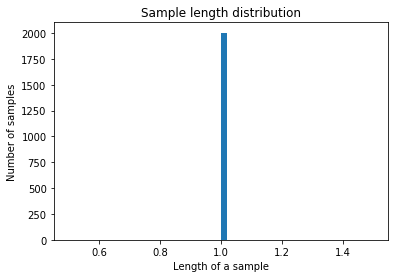

In [5]:
plot_sample_length_distribution(dataset[1][0][1])

In [6]:
dataset[1][0][1]

'Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror "Frailty", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as "The Greatest Game Ever Played." I\'m no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with "Miracle" and "Cinderella Man"), but some how this film was enthralling all the same.<br /><br />The film starts with some creative opening credits (imagine a Disneyfied version of the animated opening credits of HBO\'s "Carnivale" and "Rome"), but lumbers along slowly for its first by-the-numbers hour. Once the action moves to the U.S. Open things pick up very well. Paxton does a nice job and shows a knack for effective directorial flourishes (I loved the rain-soaked montage of the action on day two of the open) that propel the plot further or add some unexpec

In [7]:
np.vectorize?

In [8]:
import numpy as np
import time
W = np.random.normal(0, 1, 100000)
n_rep = 1000

In [9]:
W

array([ 0.47372638,  0.20113714, -0.89196944, ...,  1.32299182,
       -0.40909799,  0.16782796])

In [10]:
len(W)

100000

In [11]:
W[-1]

0.16782796285613624

In [12]:
W.shape

(100000,)

In [13]:
np.ones(W.shape)

array([1., 1., 1., ..., 1., 1., 1.])

In [14]:
for i in range(n_rep):
    one_dot=np.ones(W.shape)
    vect_res=one_dot.T.dot(W)

In [15]:
vect_res

422.471822286362

In [16]:
np.random.normal?

In [17]:
one_dot = np.ones(W.shape)

In [18]:
one_dot.T.dot(W)

422.471822286362

In [19]:
dataset[1][0][1]

'Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror "Frailty", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as "The Greatest Game Ever Played." I\'m no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with "Miracle" and "Cinderella Man"), but some how this film was enthralling all the same.<br /><br />The film starts with some creative opening credits (imagine a Disneyfied version of the animated opening credits of HBO\'s "Carnivale" and "Rome"), but lumbers along slowly for its first by-the-numbers hour. Once the action moves to the U.S. Open things pick up very well. Paxton does a nice job and shows a knack for effective directorial flourishes (I loved the rain-soaked montage of the action on day two of the open) that propel the plot further or add some unexpec

In [20]:
get_num_words_per_sample('Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror "Frailty", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as "The Greatest Game Ever Played." I\'m no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with "Miracle" and "Cinderella Man"), but some how this film was enthralling all the same.<br /><br />The film starts with some creative opening credits (imagine a Disneyfied version of the animated opening credits of HBO\'s "Carnivale" and "Rome"), but lumbers along slowly for its first by-the-numbers hour')

1.0

In [21]:
dataset[0][0]

["POSSIBLE SPOILERS<br /><br />The Spy Who Shagged Me is a muchly overrated and over-hyped sequel. International Man of Mystery came straight out of the blue. It was a lone star that few people had heard of. But it was stunningly original, had sophisticated humour and ample humour, always kept in good taste, and had a brilliant cast. The Spy Who Shagged Me was a lot more commercially advertised and hyped about.<br /><br />OK I'll admit, the first time I saw this film I thought it was very funny, but it's only after watching it two or three times that you see all the flaws. The acting was OK, but Heather Graham cannot act. Her performance didn't seem very convincing and she wasn't near as good as Liz Hurley was in the first one. Those characters who bloomed in the first one, (Scott Evil, Number 2 etc.) are thrown into the background hear and don't get many stand-alone scenes. The film is simply overrun with cameos.<br /><br />In particular, I hated the way they totally disregarded some 

In [22]:
get_num_words_per_sample(dataset[0][0])

174.0

In [23]:
len(dataset)

2

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
CountVectorizer?

In [26]:
kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
vectorizer = CountVectorizer(**kwargs)

In [27]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='replace',
        dtype='int32', encoding='utf-8', input='content', lowercase=True,
        max_df=1.0, max_features=None, min_df=1, ngram_range=(1, 1),
        preprocessor=None, stop_words=None, strip_accents='unicode',
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [28]:
sample_texts = dataset[0][0]
vectorized_texts = vectorizer.fit_transform(sample_texts)

In [29]:
vectorized_texts.data

array([ 1,  1,  1, ...,  7, 36, 10], dtype=int32)

In [30]:
all_ngrams = list(vectorizer.get_feature_names())

In [31]:
all_ngrams[-1]

'østbye'

In [32]:

num_ngrams = min(50, len(all_ngrams))

In [33]:
num_ngrams

50

In [34]:
len(all_ngrams)

74481

In [35]:
"""Module to explore data.
Contains functions to help study, visualize and understand datasets.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


def get_num_classes(labels):
    """Gets the total number of classes.
    # Arguments
        labels: list, label values.
            There should be at lease one sample for values in the
            range (0, num_classes -1)
    # Returns
        int, total number of classes.
    # Raises
        ValueError: if any label value in the range(0, num_classes - 1)
            is missing or if number of classes is <= 1.
    """
    num_classes = max(labels) + 1
    missing_classes = [i for i in range(num_classes) if i not in labels]
    if len(missing_classes):
        raise ValueError('Missing samples with label value(s) '
                         '{missing_classes}. Please make sure you have '
                         'at least one sample for every label value '
                         'in the range(0, {max_class})'.format(
                            missing_classes=missing_classes,
                            max_class=num_classes - 1))

    if num_classes <= 1:
        raise ValueError('Invalid number of labels: {num_classes}.'
                         'Please make sure there are at least two classes '
                         'of samples'.format(num_classes=num_classes))
    return num_classes


def get_num_words_per_sample(sample_texts):
    """Gets the median number of words per sample given corpus.
    # Arguments
        sample_texts: list, sample texts.
    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)


def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    plt.show()


def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.
    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()


def plot_class_distribution(labels):
    """Plots the class distribution.
    # Arguments
        labels: list, label values.
            There should be at lease one sample for values in the
            range (0, num_classes -1)
    """
    num_classes = get_num_classes(labels)
    count_map = Counter(labels)
    counts = [count_map[i] for i in range(num_classes)]
    idx = np.arange(num_classes)
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.title('Class distribution')
    plt.xticks(idx, idx)
    plt.show()

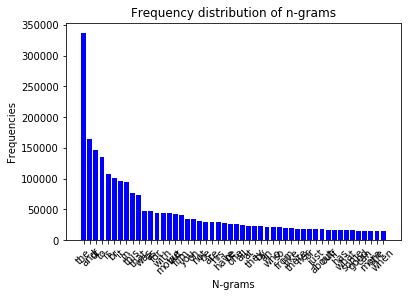

In [36]:
plot_frequency_distribution_of_ngrams(sample_texts)

In [37]:
all_counts = vectorized_texts.sum(axis=0).tolist()[0]

In [38]:
sorted(all_counts, reverse=True)[:50]

[336749,
 164141,
 145864,
 135724,
 107333,
 101871,
 96467,
 93976,
 76007,
 73286,
 48209,
 46935,
 44346,
 44130,
 44047,
 42623,
 40159,
 34267,
 34202,
 30632,
 30156,
 29438,
 29376,
 27731,
 26957,
 26795,
 23985,
 23516,
 22915,
 22548,
 21564,
 21441,
 20615,
 20499,
 20281,
 18865,
 18424,
 18007,
 17774,
 17375,
 17113,
 16809,
 16791,
 16168,
 15749,
 15147,
 14677,
 14252,
 14228,
 14184]

In [39]:
ngrams = list(all_ngrams)[:num_ngrams]
counts = list(all_counts)[:num_ngrams]

In [40]:
all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
ngrams = list(all_ngrams)[:num_ngrams]
counts = list(all_counts)[:num_ngrams]

In [41]:
idx = np.arange(num_ngrams)

In [42]:
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

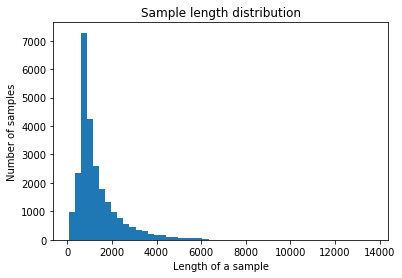

In [43]:
plot_sample_length_distribution(sample_texts)

In [44]:
plt.hist?

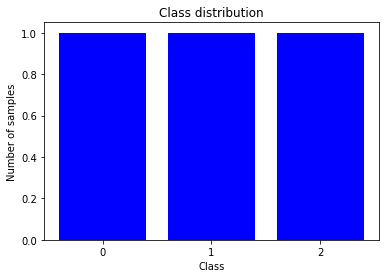

In [46]:
plot_class_distribution([0, 1, 2])

In [51]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
len(sample_texts[0])

2014

In [65]:
x = [len(t) for t in sample_texts[:50]]

In [64]:
len([l for l in sample_texts if len(l) >= 5000])

313

In [67]:
min(x)

255

In [68]:
import ngram

In [69]:
ngram.NGram?

In [73]:
ngram.NGram.compare('Ham','Ham',N=1)

1.0

In [74]:
G = ngram.NGram(['joe','joseph','jon','john','sally'])

In [78]:
G.search('joe')

[('joe', 1.0),
 ('jon', 0.25),
 ('john', 0.2222222222222222),
 ('joseph', 0.18181818181818182)]

In [80]:
index = ngram.NGram(N=3)
list(index.ngrams(index.pad("abc")))

['$$a', '$ab', 'abc', 'bc$', 'c$$']

In [91]:
x = index.ngrams('abcd')

In [92]:
list(x)

['abc', 'bcd']

In [93]:
25000 / 174

143.67816091954023

In [103]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
# data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
data = 'The mouse ran up the clock'.lower().split()
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['the' 'mouse' 'ran' 'up' 'the' 'clock']
[3 1 2 4 3 0]
[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
['the']


/home/tasneem/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [104]:
onehot_encoded

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [107]:
onehot_encoded.flatten()

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.])

In [110]:
a = 'The mouse ran up the clock'.lower()
b = 'The mouse ran down'.lower()

In [111]:
import nltk

In [116]:
all_ngrams = nltk.ngrams(a.split(), 2)

In [118]:
list(all_ngrams)

[('the', 'mouse'),
 ('mouse', 'ran'),
 ('ran', 'up'),
 ('up', 'the'),
 ('the', 'clock')]

In [119]:
tokens = {}

In [124]:
whole_text = a + ' ' + b
all_bigrams = list(nltk.ngrams(whole_text.split(), 2))
all_tokens = []

for token in whole_text.split():
    all_tokens.append(token)
    
for bigram in all_bigrams:
    all_tokens.append(' '.join(bigram))
    
all_tokens = list(set(all_tokens))

In [126]:
set(all_tokens)

{'clock',
 'clock the',
 'down',
 'mouse',
 'mouse ran',
 'ran',
 'ran down',
 'ran up',
 'the',
 'the clock',
 'the mouse',
 'up',
 'up the'}